In [1]:
import MyBicluster as mb

In [174]:
import matplotlib.pyplot as plt

# Shapley values for Stability

In [2]:
from collections import defaultdict
from itertools import combinations

def minGen(cxt,concept):
    mingen=[]
    (A,B)=concept
    if len(B)==0: return list([[]])
    #candidates={k: [] for k in range(len(B))}
    candidates = defaultdict(list)
    k=0
    for m in B:
        candidates[k].append([m])
        print(cxt.attrPrime([m]))
        if cxt.attrPrime([m])==A:
            mingen.append([m])
            print("mingen=",mingen)
            candidates[k].remove([m])
    #print(candidates)
    while len(candidates[k])!=0:
        candidates[k+1]=pairwiseGen(candidates[k])
        print("candidates[k+1]",candidates[k+1])
        k=k+1
        candidates_k=candidates[k][:]
        for X in candidates_k:
            if cxt.attrPrime(X)==A:
                mingen.append(X)
                candidates[k].remove(X)
    return mingen 

In [3]:
def pairwiseGen(candidates):
    newCandidates=[]
    for i in range(len(candidates)):
        for j in range(i+1,len(candidates)):
            if candidates[i][:-1]==candidates[j][:-1]:
                #print(candidates[i][:-1])
                cand=candidates[i][:-1]
                #print(cand)
                cand.append(min(candidates[i][-1],candidates[j][-1]))
                cand.append(max(candidates[i][-1],candidates[j][-1]))
                print(cand)
                cSubsets=[list(C) for C in list(combinations(cand, len(candidates[i])))]
                print(cSubsets)
                print(candidates)
                flag=False
                for C in cSubsets:
                    if C not in candidates:
                        print("bad subset",C)
                        flag=True
                        break
                if flag: continue
                newCandidates.append(cand)
    return newCandidates  

In [4]:
# pairwiseGen([["a","b"],["a","c"],["b","c"],["b","e"]])
pairwiseGen([["a","b","d"],["a","b","e"],["a","d","e"],['b', 'd', 'e']])

['a', 'b', 'd', 'e']
[['a', 'b', 'd'], ['a', 'b', 'e'], ['a', 'd', 'e'], ['b', 'd', 'e']]
[['a', 'b', 'd'], ['a', 'b', 'e'], ['a', 'd', 'e'], ['b', 'd', 'e']]


[['a', 'b', 'd', 'e']]

In [5]:
cxt=mb.Context("minGenTest.txt")

In [6]:
cxt.objects

[[1, 1, 1], [1, 1, 0], [1, 0, 1]]

In [7]:
L=mb.NextClosure(cxt)

NextClosure has been started
NextClosure has finished its job


In [8]:
L

[([0], [0, 1, 2]), ([0, 2], [0, 2]), ([0, 1], [0, 1]), ([0, 1, 2], [0])]

In [9]:
minGen(cxt,([0], [0, 1, 2]))

[0, 1, 2]
[0, 1]
[0, 2]
[0, 1]
[[0], [1]]
[[0], [1], [2]]
[0, 2]
[[0], [2]]
[[0], [1], [2]]
[1, 2]
[[1], [2]]
[[0], [1], [2]]
candidates[k+1] [[0, 1], [0, 2], [1, 2]]
[0, 1, 2]
[[0, 1], [0, 2], [1, 2]]
[[0, 1], [0, 2]]
bad subset [1, 2]
candidates[k+1] []


[[1, 2]]

In [10]:
minGen(cxt,([0, 2], [0, 2]))

[0, 1, 2]
[0, 2]
mingen= [[2]]
candidates[k+1] []


[[2]]

In [11]:
minGen(cxt,([0, 1], [0, 1]))

[0, 1, 2]
[0, 1]
mingen= [[1]]
candidates[k+1] []


[[1]]

In [12]:
minGen(cxt,([0, 1, 2], [0]))

[0, 1, 2]
mingen= [[0]]


[[0]]

In [13]:
cxt2=mb.Context("minGenTest2.txt")

In [14]:
cxt2.objects

[[1, 0, 0], [0, 1, 0], [0, 0, 1]]

In [15]:
L2=mb.NextClosure(cxt2)

NextClosure has been started
NextClosure has finished its job


In [16]:
L2

[([], [0, 1, 2]), ([2], [2]), ([1], [1]), ([0], [0]), ([0, 1, 2], [])]

In [17]:
minGen(cxt2,([], [0, 1, 2]))

[0]
[1]
[2]
[0, 1]
[[0], [1]]
[[0], [1], [2]]
[0, 2]
[[0], [2]]
[[0], [1], [2]]
[1, 2]
[[1], [2]]
[[0], [1], [2]]
candidates[k+1] [[0, 1], [0, 2], [1, 2]]


[[0, 1], [0, 2], [1, 2]]

In [18]:
a=combinations([0, 1, 2], 2)

In [19]:
list(a)

[(0, 1), (0, 2), (1, 2)]

In [20]:
a

In [21]:
list(a)

[]

In [22]:
cxt3=mb.Context("minGenTest3.txt")

In [23]:
cxt3.objects

[[0, 0, 0], [0, 0, 0], [0, 0, 0]]

In [24]:
L3=mb.NextClosure(cxt3)

NextClosure has been started
NextClosure has finished its job


In [25]:
L3

[([], [0, 1, 2]), ([0, 1, 2], [])]

In [26]:
minGen(cxt3,([], [0, 1, 2]))

[]
mingen= [[0]]
[]
mingen= [[0], [1]]
[]
mingen= [[0], [1], [2]]


[[0], [1], [2]]

In [27]:
minGen(cxt3,([0, 1, 2], []))

[[]]

In [28]:
cxt4=mb.Context("minGenTest4.txt")

In [29]:
cxt4.objects

[[0, 1, 1], [1, 0, 1], [1, 1, 0]]

In [30]:
L4=mb.NextClosure(cxt4)

NextClosure has been started
NextClosure has finished its job


In [31]:
L4

[([], [0, 1, 2]),
 ([2], [0, 1]),
 ([1], [0, 2]),
 ([1, 2], [0]),
 ([0], [1, 2]),
 ([0, 2], [1]),
 ([0, 1], [2]),
 ([0, 1, 2], [])]

In [32]:
minGen(cxt4,([], [0, 1, 2]))

[1, 2]
[0, 2]
[0, 1]
[0, 1]
[[0], [1]]
[[0], [1], [2]]
[0, 2]
[[0], [2]]
[[0], [1], [2]]
[1, 2]
[[1], [2]]
[[0], [1], [2]]
candidates[k+1] [[0, 1], [0, 2], [1, 2]]
[0, 1, 2]
[[0, 1], [0, 2], [1, 2]]
[[0, 1], [0, 2], [1, 2]]
candidates[k+1] [[0, 1, 2]]


[[0, 1, 2]]

In [33]:
cxt5=mb.Context("minGenTest5.txt")

In [34]:
cxt5.objects

[[1, 1, 1], [1, 1, 1], [1, 1, 1]]

In [35]:
L5=mb.NextClosure(cxt5)

NextClosure has been started
NextClosure has finished its job


In [36]:
L5

[([0, 1, 2], [0, 1, 2])]

In [37]:
minGen(cxt5,([0, 1, 2], [0, 1, 2]))

[0, 1, 2]
mingen= [[0]]
[0, 1, 2]
mingen= [[0], [1]]
[0, 1, 2]
mingen= [[0], [1], [2]]


[[0], [1], [2]]

In [38]:
ctx6=mb.Context("minGenTest6.txt")

In [39]:
ctx6.objects

[[1, 1, 1], [1, 1, 0], [1, 0, 0]]

In [40]:
ctx6.objects

[[1, 1, 1], [1, 1, 0], [1, 0, 0]]

In [41]:
L6=mb.NextClosure(ctx6)

NextClosure has been started
NextClosure has finished its job


In [42]:
L6

[([0], [0, 1, 2]), ([0, 1], [0, 1]), ([0, 1, 2], [0])]

In [43]:
minGen(ctx6,([0], [0, 1, 2]))

[0, 1, 2]
[0, 1]
[0]
mingen= [[2]]
[0, 1]
[[0], [1]]
[[0], [1]]
candidates[k+1] [[0, 1]]
candidates[k+1] []


[[2]]

In [44]:
minGen(ctx6,([0, 1], [0, 1]))

[0, 1, 2]
[0, 1]
mingen= [[1]]
candidates[k+1] []


[[1]]

In [45]:
minGen(ctx6,([0, 1, 2], [0]))

[0, 1, 2]
mingen= [[0]]


[[0]]

In [46]:
import scipy.special

In [47]:
from itertools import chain, combinations

def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

In [48]:
def ShapValS(m,concept,context):
    
    (A,B)=concept
    cardB=len(B)
    ret=1/cardB
    domain=B[:]
    domain.remove(m)

    power=powerset(domain)
    power=[list(s) for s in power]
    
    
 
    summ=0
    for S in power:
        Sm=[]
        Sm.extend(S)
        Sm.append(m)
        vSm=0
        if context.attrPrime(Sm)==A: vSm=1 
        vS=0        
        if context.attrPrime(S)==A: vS=1 
                
        
        summ=summ+1/scipy.special.binom(cardB-1,len(S))*(vSm-vS)
        print("S=",S)
        print("Sm=",Sm)
        print("vs=",vS)
        print("vsi=",vSm)
        print("summ=",summ)
    
    
    
    
    return ret*summ
    

In [49]:
ShapValS(1,([0, 1], [0, 1]),ctx6)

S= []
Sm= [1]
vs= 0
vsi= 1
summ= 1.0
S= [0]
Sm= [0, 1]
vs= 0
vsi= 1
summ= 2.0


1.0

In [50]:
[ShapValS(m,([0], [0, 1, 2]),ctx6) for m in [0, 1, 2]]

S= []
Sm= [0]
vs= 0
vsi= 0
summ= 0.0
S= [1]
Sm= [1, 0]
vs= 0
vsi= 0
summ= 0.0
S= [2]
Sm= [2, 0]
vs= 1
vsi= 1
summ= 0.0
S= [1, 2]
Sm= [1, 2, 0]
vs= 1
vsi= 1
summ= 0.0
S= []
Sm= [1]
vs= 0
vsi= 0
summ= 0.0
S= [0]
Sm= [0, 1]
vs= 0
vsi= 0
summ= 0.0
S= [2]
Sm= [2, 1]
vs= 1
vsi= 1
summ= 0.0
S= [0, 2]
Sm= [0, 2, 1]
vs= 1
vsi= 1
summ= 0.0
S= []
Sm= [2]
vs= 0
vsi= 1
summ= 1.0
S= [0]
Sm= [0, 2]
vs= 0
vsi= 1
summ= 1.5
S= [1]
Sm= [1, 2]
vs= 0
vsi= 1
summ= 2.0
S= [0, 1]
Sm= [0, 1, 2]
vs= 0
vsi= 1
summ= 3.0


[0.0, 0.0, 1.0]

In [51]:
scipy.special.binom(4,-1)

0.0

In [52]:
scipy.special.factorial(3)

array(6.)

In [53]:
[x if x in [2,4] else 0 for x in range(5)]

[0, 0, 2, 0, 4]

In [54]:
import MyBicluster as mb
from importlib import reload 

reload(mb)

pc=mb.Context("fruits.txt")
L=mb.NextClosure(pc)

NextClosure has been started
NextClosure has finished its job


In [55]:
[ShapValS(m,([],[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),pc) for m in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]

S= []
Sm= [0]
vs= 0
vsi= 1
summ= 1.0
S= [1]
Sm= [1, 0]
vs= 0
vsi= 1
summ= 1.1111111111111112
S= [2]
Sm= [2, 0]
vs= 0
vsi= 1
summ= 1.2222222222222223
S= [3]
Sm= [3, 0]
vs= 0
vsi= 1
summ= 1.3333333333333335
S= [4]
Sm= [4, 0]
vs= 1
vsi= 1
summ= 1.3333333333333335
S= [5]
Sm= [5, 0]
vs= 0
vsi= 1
summ= 1.4444444444444446
S= [6]
Sm= [6, 0]
vs= 0
vsi= 1
summ= 1.5555555555555558
S= [7]
Sm= [7, 0]
vs= 0
vsi= 1
summ= 1.666666666666667
S= [8]
Sm= [8, 0]
vs= 0
vsi= 1
summ= 1.7777777777777781
S= [9]
Sm= [9, 0]
vs= 0
vsi= 1
summ= 1.8888888888888893
S= [1, 2]
Sm= [1, 2, 0]
vs= 1
vsi= 1
summ= 1.8888888888888893
S= [1, 3]
Sm= [1, 3, 0]
vs= 1
vsi= 1
summ= 1.8888888888888893
S= [1, 4]
Sm= [1, 4, 0]
vs= 1
vsi= 1
summ= 1.8888888888888893
S= [1, 5]
Sm= [1, 5, 0]
vs= 0
vsi= 1
summ= 1.916666666666667
S= [1, 6]
Sm= [1, 6, 0]
vs= 0
vsi= 1
summ= 1.9444444444444446
S= [1, 7]
Sm= [1, 7, 0]
vs= 0
vsi= 1
summ= 1.9722222222222223
S= [1, 8]
Sm= [1, 8, 0]
vs= 0
vsi= 1
summ= 2.0
S= [1, 9]
Sm= [1, 9, 0]
vs= 1
vsi= 1
summ=

summ= 2.5674603174603154
S= [1, 2, 3, 7]
Sm= [1, 2, 3, 7, 0]
vs= 1
vsi= 1
summ= 2.5674603174603154
S= [1, 2, 3, 8]
Sm= [1, 2, 3, 8, 0]
vs= 1
vsi= 1
summ= 2.5674603174603154
S= [1, 2, 3, 9]
Sm= [1, 2, 3, 9, 0]
vs= 1
vsi= 1
summ= 2.5674603174603154
S= [1, 2, 4, 5]
Sm= [1, 2, 4, 5, 0]
vs= 1
vsi= 1
summ= 2.5674603174603154
S= [1, 2, 4, 6]
Sm= [1, 2, 4, 6, 0]
vs= 1
vsi= 1
summ= 2.5674603174603154
S= [1, 2, 4, 7]
Sm= [1, 2, 4, 7, 0]
vs= 1
vsi= 1
summ= 2.5674603174603154
S= [1, 2, 4, 8]
Sm= [1, 2, 4, 8, 0]
vs= 1
vsi= 1
summ= 2.5674603174603154
S= [1, 2, 4, 9]
Sm= [1, 2, 4, 9, 0]
vs= 1
vsi= 1
summ= 2.5674603174603154
S= [1, 2, 5, 6]
Sm= [1, 2, 5, 6, 0]
vs= 1
vsi= 1
summ= 2.5674603174603154
S= [1, 2, 5, 7]
Sm= [1, 2, 5, 7, 0]
vs= 1
vsi= 1
summ= 2.5674603174603154
S= [1, 2, 5, 8]
Sm= [1, 2, 5, 8, 0]
vs= 1
vsi= 1
summ= 2.5674603174603154
S= [1, 2, 5, 9]
Sm= [1, 2, 5, 9, 0]
vs= 1
vsi= 1
summ= 2.5674603174603154
S= [1, 2, 6, 7]
Sm= [1, 2, 6, 7, 0]
vs= 1
vsi= 1
summ= 2.5674603174603154
S= [1, 2, 6, 

vsi= 1
summ= 2.599206349206347
S= [2, 3, 4, 7, 8]
Sm= [2, 3, 4, 7, 8, 0]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [2, 3, 4, 7, 9]
Sm= [2, 3, 4, 7, 9, 0]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [2, 3, 4, 8, 9]
Sm= [2, 3, 4, 8, 9, 0]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [2, 3, 5, 6, 7]
Sm= [2, 3, 5, 6, 7, 0]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [2, 3, 5, 6, 8]
Sm= [2, 3, 5, 6, 8, 0]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [2, 3, 5, 6, 9]
Sm= [2, 3, 5, 6, 9, 0]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [2, 3, 5, 7, 8]
Sm= [2, 3, 5, 7, 8, 0]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [2, 3, 5, 7, 9]
Sm= [2, 3, 5, 7, 9, 0]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [2, 3, 5, 8, 9]
Sm= [2, 3, 5, 8, 9, 0]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [2, 3, 6, 7, 8]
Sm= [2, 3, 6, 7, 8, 0]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [2, 3, 6, 7, 9]
Sm= [2, 3, 6, 7, 9, 0]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [2, 3, 6, 8, 9]
Sm= [2, 3, 6, 8, 9, 0]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [2, 3, 7, 8, 9]
Sm

vsi= 1
summ= 2.599206349206347
S= [1, 4, 5, 6, 7, 9]
Sm= [1, 4, 5, 6, 7, 9, 0]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [1, 4, 5, 6, 8, 9]
Sm= [1, 4, 5, 6, 8, 9, 0]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [1, 4, 5, 7, 8, 9]
Sm= [1, 4, 5, 7, 8, 9, 0]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [1, 4, 6, 7, 8, 9]
Sm= [1, 4, 6, 7, 8, 9, 0]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [1, 5, 6, 7, 8, 9]
Sm= [1, 5, 6, 7, 8, 9, 0]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [2, 3, 4, 5, 6, 7]
Sm= [2, 3, 4, 5, 6, 7, 0]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [2, 3, 4, 5, 6, 8]
Sm= [2, 3, 4, 5, 6, 8, 0]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [2, 3, 4, 5, 6, 9]
Sm= [2, 3, 4, 5, 6, 9, 0]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [2, 3, 4, 5, 7, 8]
Sm= [2, 3, 4, 5, 7, 8, 0]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [2, 3, 4, 5, 7, 9]
Sm= [2, 3, 4, 5, 7, 9, 0]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [2, 3, 4, 5, 8, 9]
Sm= [2, 3, 4, 5, 8, 9, 0]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [2, 3, 4, 6, 7, 8]
Sm= [2, 3, 4

vsi= 1
summ= 0.5833333333333334
S= [0, 7, 8]
Sm= [0, 7, 8, 1]
vs= 1
vsi= 1
summ= 0.5833333333333334
S= [0, 7, 9]
Sm= [0, 7, 9, 1]
vs= 1
vsi= 1
summ= 0.5833333333333334
S= [0, 8, 9]
Sm= [0, 8, 9, 1]
vs= 1
vsi= 1
summ= 0.5833333333333334
S= [2, 3, 4]
Sm= [2, 3, 4, 1]
vs= 1
vsi= 1
summ= 0.5833333333333334
S= [2, 3, 5]
Sm= [2, 3, 5, 1]
vs= 1
vsi= 1
summ= 0.5833333333333334
S= [2, 3, 6]
Sm= [2, 3, 6, 1]
vs= 1
vsi= 1
summ= 0.5833333333333334
S= [2, 3, 7]
Sm= [2, 3, 7, 1]
vs= 1
vsi= 1
summ= 0.5833333333333334
S= [2, 3, 8]
Sm= [2, 3, 8, 1]
vs= 1
vsi= 1
summ= 0.5833333333333334
S= [2, 3, 9]
Sm= [2, 3, 9, 1]
vs= 1
vsi= 1
summ= 0.5833333333333334
S= [2, 4, 5]
Sm= [2, 4, 5, 1]
vs= 1
vsi= 1
summ= 0.5833333333333334
S= [2, 4, 6]
Sm= [2, 4, 6, 1]
vs= 1
vsi= 1
summ= 0.5833333333333334
S= [2, 4, 7]
Sm= [2, 4, 7, 1]
vs= 1
vsi= 1
summ= 0.5833333333333334
S= [2, 4, 8]
Sm= [2, 4, 8, 1]
vs= 1
vsi= 1
summ= 0.5833333333333334
S= [2, 4, 9]
Sm= [2, 4, 9, 1]
vs= 1
vsi= 1
summ= 0.5833333333333334
S= [2, 5, 6]
Sm=

Sm= [2, 4, 5, 6, 1]
vs= 1
vsi= 1
summ= 0.6785714285714283
S= [2, 4, 5, 7]
Sm= [2, 4, 5, 7, 1]
vs= 1
vsi= 1
summ= 0.6785714285714283
S= [2, 4, 5, 8]
Sm= [2, 4, 5, 8, 1]
vs= 1
vsi= 1
summ= 0.6785714285714283
S= [2, 4, 5, 9]
Sm= [2, 4, 5, 9, 1]
vs= 1
vsi= 1
summ= 0.6785714285714283
S= [2, 4, 6, 7]
Sm= [2, 4, 6, 7, 1]
vs= 1
vsi= 1
summ= 0.6785714285714283
S= [2, 4, 6, 8]
Sm= [2, 4, 6, 8, 1]
vs= 1
vsi= 1
summ= 0.6785714285714283
S= [2, 4, 6, 9]
Sm= [2, 4, 6, 9, 1]
vs= 1
vsi= 1
summ= 0.6785714285714283
S= [2, 4, 7, 8]
Sm= [2, 4, 7, 8, 1]
vs= 1
vsi= 1
summ= 0.6785714285714283
S= [2, 4, 7, 9]
Sm= [2, 4, 7, 9, 1]
vs= 1
vsi= 1
summ= 0.6785714285714283
S= [2, 4, 8, 9]
Sm= [2, 4, 8, 9, 1]
vs= 1
vsi= 1
summ= 0.6785714285714283
S= [2, 5, 6, 7]
Sm= [2, 5, 6, 7, 1]
vs= 1
vsi= 1
summ= 0.6785714285714283
S= [2, 5, 6, 8]
Sm= [2, 5, 6, 8, 1]
vs= 1
vsi= 1
summ= 0.6785714285714283
S= [2, 5, 6, 9]
Sm= [2, 5, 6, 9, 1]
vs= 1
vsi= 1
summ= 0.6785714285714283
S= [2, 5, 7, 8]
Sm= [2, 5, 7, 8, 1]
vs= 1
vsi= 1
summ=

vs= 1
vsi= 1
summ= 0.6944444444444441
S= [0, 5, 6, 7, 8]
Sm= [0, 5, 6, 7, 8, 1]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [0, 5, 6, 7, 9]
Sm= [0, 5, 6, 7, 9, 1]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [0, 5, 6, 8, 9]
Sm= [0, 5, 6, 8, 9, 1]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [0, 5, 7, 8, 9]
Sm= [0, 5, 7, 8, 9, 1]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [0, 6, 7, 8, 9]
Sm= [0, 6, 7, 8, 9, 1]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [2, 3, 4, 5, 6]
Sm= [2, 3, 4, 5, 6, 1]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [2, 3, 4, 5, 7]
Sm= [2, 3, 4, 5, 7, 1]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [2, 3, 4, 5, 8]
Sm= [2, 3, 4, 5, 8, 1]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [2, 3, 4, 5, 9]
Sm= [2, 3, 4, 5, 9, 1]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [2, 3, 4, 6, 7]
Sm= [2, 3, 4, 6, 7, 1]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [2, 3, 4, 6, 8]
Sm= [2, 3, 4, 6, 8, 1]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [2, 3, 4, 6, 9]
Sm= [2, 3, 4, 6, 9, 1]
vs= 1
vsi= 1
summ= 0.6944444444444441
S=

vs= 1
vsi= 1
summ= 0.6944444444444441
S= [0, 2, 3, 4, 5, 8, 9]
Sm= [0, 2, 3, 4, 5, 8, 9, 1]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [0, 2, 3, 4, 6, 7, 8]
Sm= [0, 2, 3, 4, 6, 7, 8, 1]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [0, 2, 3, 4, 6, 7, 9]
Sm= [0, 2, 3, 4, 6, 7, 9, 1]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [0, 2, 3, 4, 6, 8, 9]
Sm= [0, 2, 3, 4, 6, 8, 9, 1]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [0, 2, 3, 4, 7, 8, 9]
Sm= [0, 2, 3, 4, 7, 8, 9, 1]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [0, 2, 3, 5, 6, 7, 8]
Sm= [0, 2, 3, 5, 6, 7, 8, 1]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [0, 2, 3, 5, 6, 7, 9]
Sm= [0, 2, 3, 5, 6, 7, 9, 1]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [0, 2, 3, 5, 6, 8, 9]
Sm= [0, 2, 3, 5, 6, 8, 9, 1]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [0, 2, 3, 5, 7, 8, 9]
Sm= [0, 2, 3, 5, 7, 8, 9, 1]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [0, 2, 3, 6, 7, 8, 9]
Sm= [0, 2, 3, 6, 7, 8, 9, 1]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [0, 2, 4, 5, 6, 7, 8]
Sm= [0, 2, 4, 5, 

vs= 1
vsi= 1
summ= 0.8730158730158728
S= [3, 8, 9]
Sm= [3, 8, 9, 2]
vs= 1
vsi= 1
summ= 0.8730158730158728
S= [4, 5, 6]
Sm= [4, 5, 6, 2]
vs= 1
vsi= 1
summ= 0.8730158730158728
S= [4, 5, 7]
Sm= [4, 5, 7, 2]
vs= 1
vsi= 1
summ= 0.8730158730158728
S= [4, 5, 8]
Sm= [4, 5, 8, 2]
vs= 1
vsi= 1
summ= 0.8730158730158728
S= [4, 5, 9]
Sm= [4, 5, 9, 2]
vs= 1
vsi= 1
summ= 0.8730158730158728
S= [4, 6, 7]
Sm= [4, 6, 7, 2]
vs= 1
vsi= 1
summ= 0.8730158730158728
S= [4, 6, 8]
Sm= [4, 6, 8, 2]
vs= 1
vsi= 1
summ= 0.8730158730158728
S= [4, 6, 9]
Sm= [4, 6, 9, 2]
vs= 1
vsi= 1
summ= 0.8730158730158728
S= [4, 7, 8]
Sm= [4, 7, 8, 2]
vs= 1
vsi= 1
summ= 0.8730158730158728
S= [4, 7, 9]
Sm= [4, 7, 9, 2]
vs= 1
vsi= 1
summ= 0.8730158730158728
S= [4, 8, 9]
Sm= [4, 8, 9, 2]
vs= 1
vsi= 1
summ= 0.8730158730158728
S= [5, 6, 7]
Sm= [5, 6, 7, 2]
vs= 1
vsi= 1
summ= 0.8730158730158728
S= [5, 6, 8]
Sm= [5, 6, 8, 2]
vs= 0
vsi= 1
summ= 0.8849206349206347
S= [5, 6, 9]
Sm= [5, 6, 9, 2]
vs= 0
vsi= 1
summ= 0.8968253968253965
S= [5, 7, 

Sm= [0, 1, 3, 4, 7, 2]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 1, 3, 4, 8]
Sm= [0, 1, 3, 4, 8, 2]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 1, 3, 4, 9]
Sm= [0, 1, 3, 4, 9, 2]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 1, 3, 5, 6]
Sm= [0, 1, 3, 5, 6, 2]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 1, 3, 5, 7]
Sm= [0, 1, 3, 5, 7, 2]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 1, 3, 5, 8]
Sm= [0, 1, 3, 5, 8, 2]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 1, 3, 5, 9]
Sm= [0, 1, 3, 5, 9, 2]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 1, 3, 6, 7]
Sm= [0, 1, 3, 6, 7, 2]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 1, 3, 6, 8]
Sm= [0, 1, 3, 6, 8, 2]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 1, 3, 6, 9]
Sm= [0, 1, 3, 6, 9, 2]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 1, 3, 7, 8]
Sm= [0, 1, 3, 7, 8, 2]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 1, 3, 7, 9]
Sm= [0, 1, 3, 7, 9, 2]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 1, 3, 8, 9]
Sm= [0, 1, 3, 8, 9, 2]
vs= 1
vsi= 1
summ

Sm= [0, 1, 4, 6, 7, 8, 2]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 1, 4, 6, 7, 9]
Sm= [0, 1, 4, 6, 7, 9, 2]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 1, 4, 6, 8, 9]
Sm= [0, 1, 4, 6, 8, 9, 2]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 1, 4, 7, 8, 9]
Sm= [0, 1, 4, 7, 8, 9, 2]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 1, 5, 6, 7, 8]
Sm= [0, 1, 5, 6, 7, 8, 2]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 1, 5, 6, 7, 9]
Sm= [0, 1, 5, 6, 7, 9, 2]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 1, 5, 6, 8, 9]
Sm= [0, 1, 5, 6, 8, 9, 2]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 1, 5, 7, 8, 9]
Sm= [0, 1, 5, 7, 8, 9, 2]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 1, 6, 7, 8, 9]
Sm= [0, 1, 6, 7, 8, 9, 2]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 3, 4, 5, 6, 7]
Sm= [0, 3, 4, 5, 6, 7, 2]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 3, 4, 5, 6, 8]
Sm= [0, 3, 4, 5, 6, 8, 2]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 3, 4, 5, 6, 9]
Sm= [0, 3, 4, 5, 6, 9, 2]
vs= 1
vsi= 1
summ= 0.9325396

Sm= [0, 1, 2, 3]
vs= 1
vsi= 1
summ= 0.7777777777777779
S= [0, 1, 4]
Sm= [0, 1, 4, 3]
vs= 1
vsi= 1
summ= 0.7777777777777779
S= [0, 1, 5]
Sm= [0, 1, 5, 3]
vs= 1
vsi= 1
summ= 0.7777777777777779
S= [0, 1, 6]
Sm= [0, 1, 6, 3]
vs= 1
vsi= 1
summ= 0.7777777777777779
S= [0, 1, 7]
Sm= [0, 1, 7, 3]
vs= 1
vsi= 1
summ= 0.7777777777777779
S= [0, 1, 8]
Sm= [0, 1, 8, 3]
vs= 1
vsi= 1
summ= 0.7777777777777779
S= [0, 1, 9]
Sm= [0, 1, 9, 3]
vs= 1
vsi= 1
summ= 0.7777777777777779
S= [0, 2, 4]
Sm= [0, 2, 4, 3]
vs= 1
vsi= 1
summ= 0.7777777777777779
S= [0, 2, 5]
Sm= [0, 2, 5, 3]
vs= 1
vsi= 1
summ= 0.7777777777777779
S= [0, 2, 6]
Sm= [0, 2, 6, 3]
vs= 1
vsi= 1
summ= 0.7777777777777779
S= [0, 2, 7]
Sm= [0, 2, 7, 3]
vs= 1
vsi= 1
summ= 0.7777777777777779
S= [0, 2, 8]
Sm= [0, 2, 8, 3]
vs= 1
vsi= 1
summ= 0.7777777777777779
S= [0, 2, 9]
Sm= [0, 2, 9, 3]
vs= 1
vsi= 1
summ= 0.7777777777777779
S= [0, 4, 5]
Sm= [0, 4, 5, 3]
vs= 1
vsi= 1
summ= 0.7777777777777779
S= [0, 4, 6]
Sm= [0, 4, 6, 3]
vs= 1
vsi= 1
summ= 0.7777777777

Sm= [1, 2, 6, 8, 3]
vs= 1
vsi= 1
summ= 0.9087301587301584
S= [1, 2, 6, 9]
Sm= [1, 2, 6, 9, 3]
vs= 1
vsi= 1
summ= 0.9087301587301584
S= [1, 2, 7, 8]
Sm= [1, 2, 7, 8, 3]
vs= 1
vsi= 1
summ= 0.9087301587301584
S= [1, 2, 7, 9]
Sm= [1, 2, 7, 9, 3]
vs= 1
vsi= 1
summ= 0.9087301587301584
S= [1, 2, 8, 9]
Sm= [1, 2, 8, 9, 3]
vs= 1
vsi= 1
summ= 0.9087301587301584
S= [1, 4, 5, 6]
Sm= [1, 4, 5, 6, 3]
vs= 1
vsi= 1
summ= 0.9087301587301584
S= [1, 4, 5, 7]
Sm= [1, 4, 5, 7, 3]
vs= 1
vsi= 1
summ= 0.9087301587301584
S= [1, 4, 5, 8]
Sm= [1, 4, 5, 8, 3]
vs= 1
vsi= 1
summ= 0.9087301587301584
S= [1, 4, 5, 9]
Sm= [1, 4, 5, 9, 3]
vs= 1
vsi= 1
summ= 0.9087301587301584
S= [1, 4, 6, 7]
Sm= [1, 4, 6, 7, 3]
vs= 1
vsi= 1
summ= 0.9087301587301584
S= [1, 4, 6, 8]
Sm= [1, 4, 6, 8, 3]
vs= 1
vsi= 1
summ= 0.9087301587301584
S= [1, 4, 6, 9]
Sm= [1, 4, 6, 9, 3]
vs= 1
vsi= 1
summ= 0.9087301587301584
S= [1, 4, 7, 8]
Sm= [1, 4, 7, 8, 3]
vs= 1
vsi= 1
summ= 0.9087301587301584
S= [1, 4, 7, 9]
Sm= [1, 4, 7, 9, 3]
vs= 1
vsi= 1
summ=

S= [1, 2, 4, 6, 8, 9]
Sm= [1, 2, 4, 6, 8, 9, 3]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [1, 2, 4, 7, 8, 9]
Sm= [1, 2, 4, 7, 8, 9, 3]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [1, 2, 5, 6, 7, 8]
Sm= [1, 2, 5, 6, 7, 8, 3]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [1, 2, 5, 6, 7, 9]
Sm= [1, 2, 5, 6, 7, 9, 3]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [1, 2, 5, 6, 8, 9]
Sm= [1, 2, 5, 6, 8, 9, 3]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [1, 2, 5, 7, 8, 9]
Sm= [1, 2, 5, 7, 8, 9, 3]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [1, 2, 6, 7, 8, 9]
Sm= [1, 2, 6, 7, 8, 9, 3]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [1, 4, 5, 6, 7, 8]
Sm= [1, 4, 5, 6, 7, 8, 3]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [1, 4, 5, 6, 7, 9]
Sm= [1, 4, 5, 6, 7, 9, 3]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [1, 4, 5, 6, 8, 9]
Sm= [1, 4, 5, 6, 8, 9, 3]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [1, 4, 5, 7, 8, 9]
Sm= [1, 4, 5, 7, 8, 9, 3]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [1, 4, 6, 7, 8, 9]
Sm= [1, 4, 6, 7, 8, 9, 3]
vs= 1


S= [1, 3, 9]
Sm= [1, 3, 9, 4]
vs= 1
vsi= 1
summ= 2.3888888888888875
S= [1, 5, 6]
Sm= [1, 5, 6, 4]
vs= 0
vsi= 1
summ= 2.4007936507936494
S= [1, 5, 7]
Sm= [1, 5, 7, 4]
vs= 0
vsi= 1
summ= 2.4126984126984112
S= [1, 5, 8]
Sm= [1, 5, 8, 4]
vs= 0
vsi= 1
summ= 2.424603174603173
S= [1, 5, 9]
Sm= [1, 5, 9, 4]
vs= 1
vsi= 1
summ= 2.424603174603173
S= [1, 6, 7]
Sm= [1, 6, 7, 4]
vs= 1
vsi= 1
summ= 2.424603174603173
S= [1, 6, 8]
Sm= [1, 6, 8, 4]
vs= 0
vsi= 1
summ= 2.436507936507935
S= [1, 6, 9]
Sm= [1, 6, 9, 4]
vs= 1
vsi= 1
summ= 2.436507936507935
S= [1, 7, 8]
Sm= [1, 7, 8, 4]
vs= 0
vsi= 1
summ= 2.448412698412697
S= [1, 7, 9]
Sm= [1, 7, 9, 4]
vs= 1
vsi= 1
summ= 2.448412698412697
S= [1, 8, 9]
Sm= [1, 8, 9, 4]
vs= 1
vsi= 1
summ= 2.448412698412697
S= [2, 3, 5]
Sm= [2, 3, 5, 4]
vs= 1
vsi= 1
summ= 2.448412698412697
S= [2, 3, 6]
Sm= [2, 3, 6, 4]
vs= 1
vsi= 1
summ= 2.448412698412697
S= [2, 3, 7]
Sm= [2, 3, 7, 4]
vs= 1
vsi= 1
summ= 2.448412698412697
S= [2, 3, 8]
Sm= [2, 3, 8, 4]
vs= 1
vsi= 1
summ= 2.44841269

S= [2, 5, 7, 8]
Sm= [2, 5, 7, 8, 4]
vs= 1
vsi= 1
summ= 2.5833333333333313
S= [2, 5, 7, 9]
Sm= [2, 5, 7, 9, 4]
vs= 0
vsi= 1
summ= 2.591269841269839
S= [2, 5, 8, 9]
Sm= [2, 5, 8, 9, 4]
vs= 1
vsi= 1
summ= 2.591269841269839
S= [2, 6, 7, 8]
Sm= [2, 6, 7, 8, 4]
vs= 1
vsi= 1
summ= 2.591269841269839
S= [2, 6, 7, 9]
Sm= [2, 6, 7, 9, 4]
vs= 1
vsi= 1
summ= 2.591269841269839
S= [2, 6, 8, 9]
Sm= [2, 6, 8, 9, 4]
vs= 1
vsi= 1
summ= 2.591269841269839
S= [2, 7, 8, 9]
Sm= [2, 7, 8, 9, 4]
vs= 1
vsi= 1
summ= 2.591269841269839
S= [3, 5, 6, 7]
Sm= [3, 5, 6, 7, 4]
vs= 1
vsi= 1
summ= 2.591269841269839
S= [3, 5, 6, 8]
Sm= [3, 5, 6, 8, 4]
vs= 1
vsi= 1
summ= 2.591269841269839
S= [3, 5, 6, 9]
Sm= [3, 5, 6, 9, 4]
vs= 0
vsi= 1
summ= 2.599206349206347
S= [3, 5, 7, 8]
Sm= [3, 5, 7, 8, 4]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [3, 5, 7, 9]
Sm= [3, 5, 7, 9, 4]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [3, 5, 8, 9]
Sm= [3, 5, 8, 9, 4]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [3, 6, 7, 8]
Sm= [3, 6, 7, 8, 4]
vs= 1
vsi= 1
s

summ= 2.599206349206347
S= [0, 1, 2, 3, 5, 8]
Sm= [0, 1, 2, 3, 5, 8, 4]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [0, 1, 2, 3, 5, 9]
Sm= [0, 1, 2, 3, 5, 9, 4]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [0, 1, 2, 3, 6, 7]
Sm= [0, 1, 2, 3, 6, 7, 4]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [0, 1, 2, 3, 6, 8]
Sm= [0, 1, 2, 3, 6, 8, 4]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [0, 1, 2, 3, 6, 9]
Sm= [0, 1, 2, 3, 6, 9, 4]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [0, 1, 2, 3, 7, 8]
Sm= [0, 1, 2, 3, 7, 8, 4]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [0, 1, 2, 3, 7, 9]
Sm= [0, 1, 2, 3, 7, 9, 4]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [0, 1, 2, 3, 8, 9]
Sm= [0, 1, 2, 3, 8, 9, 4]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [0, 1, 2, 5, 6, 7]
Sm= [0, 1, 2, 5, 6, 7, 4]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [0, 1, 2, 5, 6, 8]
Sm= [0, 1, 2, 5, 6, 8, 4]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [0, 1, 2, 5, 6, 9]
Sm= [0, 1, 2, 5, 6, 9, 4]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [0, 1, 2, 5, 7, 8]
Sm= [0, 1, 2, 5, 7,

summ= 0.0
S= [1, 7]
Sm= [1, 7, 5]
vs= 0
vsi= 0
summ= 0.0
S= [1, 8]
Sm= [1, 8, 5]
vs= 0
vsi= 0
summ= 0.0
S= [1, 9]
Sm= [1, 9, 5]
vs= 1
vsi= 1
summ= 0.0
S= [2, 3]
Sm= [2, 3, 5]
vs= 1
vsi= 1
summ= 0.0
S= [2, 4]
Sm= [2, 4, 5]
vs= 1
vsi= 1
summ= 0.0
S= [2, 6]
Sm= [2, 6, 5]
vs= 1
vsi= 1
summ= 0.0
S= [2, 7]
Sm= [2, 7, 5]
vs= 0
vsi= 0
summ= 0.0
S= [2, 8]
Sm= [2, 8, 5]
vs= 1
vsi= 1
summ= 0.0
S= [2, 9]
Sm= [2, 9, 5]
vs= 0
vsi= 0
summ= 0.0
S= [3, 4]
Sm= [3, 4, 5]
vs= 1
vsi= 1
summ= 0.0
S= [3, 6]
Sm= [3, 6, 5]
vs= 0
vsi= 0
summ= 0.0
S= [3, 7]
Sm= [3, 7, 5]
vs= 1
vsi= 1
summ= 0.0
S= [3, 8]
Sm= [3, 8, 5]
vs= 1
vsi= 1
summ= 0.0
S= [3, 9]
Sm= [3, 9, 5]
vs= 0
vsi= 0
summ= 0.0
S= [4, 6]
Sm= [4, 6, 5]
vs= 1
vsi= 1
summ= 0.0
S= [4, 7]
Sm= [4, 7, 5]
vs= 1
vsi= 1
summ= 0.0
S= [4, 8]
Sm= [4, 8, 5]
vs= 1
vsi= 1
summ= 0.0
S= [4, 9]
Sm= [4, 9, 5]
vs= 1
vsi= 1
summ= 0.0
S= [6, 7]
Sm= [6, 7, 5]
vs= 1
vsi= 1
summ= 0.0
S= [6, 8]
Sm= [6, 8, 5]
vs= 0
vsi= 0
summ= 0.0
S= [6, 9]
Sm= [6, 9, 5]
vs= 0
vsi= 0
summ= 0.0
S= 

summ= 0.0
S= [0, 4, 6, 7, 9]
Sm= [0, 4, 6, 7, 9, 5]
vs= 1
vsi= 1
summ= 0.0
S= [0, 4, 6, 8, 9]
Sm= [0, 4, 6, 8, 9, 5]
vs= 1
vsi= 1
summ= 0.0
S= [0, 4, 7, 8, 9]
Sm= [0, 4, 7, 8, 9, 5]
vs= 1
vsi= 1
summ= 0.0
S= [0, 6, 7, 8, 9]
Sm= [0, 6, 7, 8, 9, 5]
vs= 1
vsi= 1
summ= 0.0
S= [1, 2, 3, 4, 6]
Sm= [1, 2, 3, 4, 6, 5]
vs= 1
vsi= 1
summ= 0.0
S= [1, 2, 3, 4, 7]
Sm= [1, 2, 3, 4, 7, 5]
vs= 1
vsi= 1
summ= 0.0
S= [1, 2, 3, 4, 8]
Sm= [1, 2, 3, 4, 8, 5]
vs= 1
vsi= 1
summ= 0.0
S= [1, 2, 3, 4, 9]
Sm= [1, 2, 3, 4, 9, 5]
vs= 1
vsi= 1
summ= 0.0
S= [1, 2, 3, 6, 7]
Sm= [1, 2, 3, 6, 7, 5]
vs= 1
vsi= 1
summ= 0.0
S= [1, 2, 3, 6, 8]
Sm= [1, 2, 3, 6, 8, 5]
vs= 1
vsi= 1
summ= 0.0
S= [1, 2, 3, 6, 9]
Sm= [1, 2, 3, 6, 9, 5]
vs= 1
vsi= 1
summ= 0.0
S= [1, 2, 3, 7, 8]
Sm= [1, 2, 3, 7, 8, 5]
vs= 1
vsi= 1
summ= 0.0
S= [1, 2, 3, 7, 9]
Sm= [1, 2, 3, 7, 9, 5]
vs= 1
vsi= 1
summ= 0.0
S= [1, 2, 3, 8, 9]
Sm= [1, 2, 3, 8, 9, 5]
vs= 1
vsi= 1
summ= 0.0
S= [1, 2, 4, 6, 7]
Sm= [1, 2, 4, 6, 7, 5]
vs= 1
vsi= 1
summ= 0.0
S= [1, 2, 4, 6,

vsi= 1
summ= 0.0
S= [0, 1, 2, 3, 6, 7, 8]
Sm= [0, 1, 2, 3, 6, 7, 8, 5]
vs= 1
vsi= 1
summ= 0.0
S= [0, 1, 2, 3, 6, 7, 9]
Sm= [0, 1, 2, 3, 6, 7, 9, 5]
vs= 1
vsi= 1
summ= 0.0
S= [0, 1, 2, 3, 6, 8, 9]
Sm= [0, 1, 2, 3, 6, 8, 9, 5]
vs= 1
vsi= 1
summ= 0.0
S= [0, 1, 2, 3, 7, 8, 9]
Sm= [0, 1, 2, 3, 7, 8, 9, 5]
vs= 1
vsi= 1
summ= 0.0
S= [0, 1, 2, 4, 6, 7, 8]
Sm= [0, 1, 2, 4, 6, 7, 8, 5]
vs= 1
vsi= 1
summ= 0.0
S= [0, 1, 2, 4, 6, 7, 9]
Sm= [0, 1, 2, 4, 6, 7, 9, 5]
vs= 1
vsi= 1
summ= 0.0
S= [0, 1, 2, 4, 6, 8, 9]
Sm= [0, 1, 2, 4, 6, 8, 9, 5]
vs= 1
vsi= 1
summ= 0.0
S= [0, 1, 2, 4, 7, 8, 9]
Sm= [0, 1, 2, 4, 7, 8, 9, 5]
vs= 1
vsi= 1
summ= 0.0
S= [0, 1, 2, 6, 7, 8, 9]
Sm= [0, 1, 2, 6, 7, 8, 9, 5]
vs= 1
vsi= 1
summ= 0.0
S= [0, 1, 3, 4, 6, 7, 8]
Sm= [0, 1, 3, 4, 6, 7, 8, 5]
vs= 1
vsi= 1
summ= 0.0
S= [0, 1, 3, 4, 6, 7, 9]
Sm= [0, 1, 3, 4, 6, 7, 9, 5]
vs= 1
vsi= 1
summ= 0.0
S= [0, 1, 3, 4, 6, 8, 9]
Sm= [0, 1, 3, 4, 6, 8, 9, 5]
vs= 1
vsi= 1
summ= 0.0
S= [0, 1, 3, 4, 7, 8, 9]
Sm= [0, 1, 3, 4, 7, 8, 9, 5]
vs= 1

vsi= 1
summ= 0.47619047619047633
S= [3, 4, 5]
Sm= [3, 4, 5, 6]
vs= 1
vsi= 1
summ= 0.47619047619047633
S= [3, 4, 7]
Sm= [3, 4, 7, 6]
vs= 1
vsi= 1
summ= 0.47619047619047633
S= [3, 4, 8]
Sm= [3, 4, 8, 6]
vs= 1
vsi= 1
summ= 0.47619047619047633
S= [3, 4, 9]
Sm= [3, 4, 9, 6]
vs= 1
vsi= 1
summ= 0.47619047619047633
S= [3, 5, 7]
Sm= [3, 5, 7, 6]
vs= 1
vsi= 1
summ= 0.47619047619047633
S= [3, 5, 8]
Sm= [3, 5, 8, 6]
vs= 1
vsi= 1
summ= 0.47619047619047633
S= [3, 5, 9]
Sm= [3, 5, 9, 6]
vs= 0
vsi= 0
summ= 0.47619047619047633
S= [3, 7, 8]
Sm= [3, 7, 8, 6]
vs= 1
vsi= 1
summ= 0.47619047619047633
S= [3, 7, 9]
Sm= [3, 7, 9, 6]
vs= 1
vsi= 1
summ= 0.47619047619047633
S= [3, 8, 9]
Sm= [3, 8, 9, 6]
vs= 1
vsi= 1
summ= 0.47619047619047633
S= [4, 5, 7]
Sm= [4, 5, 7, 6]
vs= 1
vsi= 1
summ= 0.47619047619047633
S= [4, 5, 8]
Sm= [4, 5, 8, 6]
vs= 1
vsi= 1
summ= 0.47619047619047633
S= [4, 5, 9]
Sm= [4, 5, 9, 6]
vs= 1
vsi= 1
summ= 0.47619047619047633
S= [4, 7, 8]
Sm= [4, 7, 8, 6]
vs= 1
vsi= 1
summ= 0.47619047619047633
S

vsi= 1
summ= 0.5158730158730159
S= [1, 5, 7, 8, 9]
Sm= [1, 5, 7, 8, 9, 6]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [2, 3, 4, 5, 7]
Sm= [2, 3, 4, 5, 7, 6]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [2, 3, 4, 5, 8]
Sm= [2, 3, 4, 5, 8, 6]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [2, 3, 4, 5, 9]
Sm= [2, 3, 4, 5, 9, 6]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [2, 3, 4, 7, 8]
Sm= [2, 3, 4, 7, 8, 6]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [2, 3, 4, 7, 9]
Sm= [2, 3, 4, 7, 9, 6]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [2, 3, 4, 8, 9]
Sm= [2, 3, 4, 8, 9, 6]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [2, 3, 5, 7, 8]
Sm= [2, 3, 5, 7, 8, 6]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [2, 3, 5, 7, 9]
Sm= [2, 3, 5, 7, 9, 6]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [2, 3, 5, 8, 9]
Sm= [2, 3, 5, 8, 9, 6]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [2, 3, 7, 8, 9]
Sm= [2, 3, 7, 8, 9, 6]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [2, 4, 5, 7, 8]
Sm= [2, 4, 5, 7, 8, 6]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [2, 4

vs= 1
vsi= 1
summ= 0.5158730158730159
S= [1, 2, 3, 4, 5, 7, 8, 9]
Sm= [1, 2, 3, 4, 5, 7, 8, 9, 6]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 1, 2, 3, 4, 5, 7, 8, 9]
Sm= [0, 1, 2, 3, 4, 5, 7, 8, 9, 6]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= []
Sm= [7]
vs= 0
vsi= 0
summ= 0.0
S= [0]
Sm= [0, 7]
vs= 1
vsi= 1
summ= 0.0
S= [1]
Sm= [1, 7]
vs= 0
vsi= 0
summ= 0.0
S= [2]
Sm= [2, 7]
vs= 0
vsi= 0
summ= 0.0
S= [3]
Sm= [3, 7]
vs= 0
vsi= 1
summ= 0.1111111111111111
S= [4]
Sm= [4, 7]
vs= 1
vsi= 1
summ= 0.1111111111111111
S= [5]
Sm= [5, 7]
vs= 0
vsi= 0
summ= 0.1111111111111111
S= [6]
Sm= [6, 7]
vs= 0
vsi= 1
summ= 0.2222222222222222
S= [8]
Sm= [8, 7]
vs= 0
vsi= 0
summ= 0.2222222222222222
S= [9]
Sm= [9, 7]
vs= 0
vsi= 0
summ= 0.2222222222222222
S= [0, 1]
Sm= [0, 1, 7]
vs= 1
vsi= 1
summ= 0.2222222222222222
S= [0, 2]
Sm= [0, 2, 7]
vs= 1
vsi= 1
summ= 0.2222222222222222
S= [0, 3]
Sm= [0, 3, 7]
vs= 1
vsi= 1
summ= 0.2222222222222222
S= [0, 4]
Sm= [0, 4, 7]
vs= 1
vsi= 1
summ= 0.2222222222222222
S= [0, 5]
Sm= [0

vs= 1
vsi= 1
summ= 0.5000000000000001
S= [0, 1, 6, 8]
Sm= [0, 1, 6, 8, 7]
vs= 1
vsi= 1
summ= 0.5000000000000001
S= [0, 1, 6, 9]
Sm= [0, 1, 6, 9, 7]
vs= 1
vsi= 1
summ= 0.5000000000000001
S= [0, 1, 8, 9]
Sm= [0, 1, 8, 9, 7]
vs= 1
vsi= 1
summ= 0.5000000000000001
S= [0, 2, 3, 4]
Sm= [0, 2, 3, 4, 7]
vs= 1
vsi= 1
summ= 0.5000000000000001
S= [0, 2, 3, 5]
Sm= [0, 2, 3, 5, 7]
vs= 1
vsi= 1
summ= 0.5000000000000001
S= [0, 2, 3, 6]
Sm= [0, 2, 3, 6, 7]
vs= 1
vsi= 1
summ= 0.5000000000000001
S= [0, 2, 3, 8]
Sm= [0, 2, 3, 8, 7]
vs= 1
vsi= 1
summ= 0.5000000000000001
S= [0, 2, 3, 9]
Sm= [0, 2, 3, 9, 7]
vs= 1
vsi= 1
summ= 0.5000000000000001
S= [0, 2, 4, 5]
Sm= [0, 2, 4, 5, 7]
vs= 1
vsi= 1
summ= 0.5000000000000001
S= [0, 2, 4, 6]
Sm= [0, 2, 4, 6, 7]
vs= 1
vsi= 1
summ= 0.5000000000000001
S= [0, 2, 4, 8]
Sm= [0, 2, 4, 8, 7]
vs= 1
vsi= 1
summ= 0.5000000000000001
S= [0, 2, 4, 9]
Sm= [0, 2, 4, 9, 7]
vs= 1
vsi= 1
summ= 0.5000000000000001
S= [0, 2, 5, 6]
Sm= [0, 2, 5, 6, 7]
vs= 1
vsi= 1
summ= 0.5000000000000001


vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 2, 3, 6, 8]
Sm= [0, 2, 3, 6, 8, 7]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 2, 3, 6, 9]
Sm= [0, 2, 3, 6, 9, 7]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 2, 3, 8, 9]
Sm= [0, 2, 3, 8, 9, 7]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 2, 4, 5, 6]
Sm= [0, 2, 4, 5, 6, 7]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 2, 4, 5, 8]
Sm= [0, 2, 4, 5, 8, 7]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 2, 4, 5, 9]
Sm= [0, 2, 4, 5, 9, 7]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 2, 4, 6, 8]
Sm= [0, 2, 4, 6, 8, 7]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 2, 4, 6, 9]
Sm= [0, 2, 4, 6, 9, 7]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 2, 4, 8, 9]
Sm= [0, 2, 4, 8, 9, 7]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 2, 5, 6, 8]
Sm= [0, 2, 5, 6, 8, 7]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 2, 5, 6, 9]
Sm= [0, 2, 5, 6, 9, 7]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 2, 5, 8, 9]
Sm= [0, 2, 5, 8, 9, 7]
vs= 1
vsi= 1
summ= 0.5158730158730159
S=

vs= 1
vsi= 1
summ= 0.5158730158730159
S= [1, 2, 4, 5, 6, 8]
Sm= [1, 2, 4, 5, 6, 8, 7]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [1, 2, 4, 5, 6, 9]
Sm= [1, 2, 4, 5, 6, 9, 7]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [1, 2, 4, 5, 8, 9]
Sm= [1, 2, 4, 5, 8, 9, 7]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [1, 2, 4, 6, 8, 9]
Sm= [1, 2, 4, 6, 8, 9, 7]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [1, 2, 5, 6, 8, 9]
Sm= [1, 2, 5, 6, 8, 9, 7]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [1, 3, 4, 5, 6, 8]
Sm= [1, 3, 4, 5, 6, 8, 7]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [1, 3, 4, 5, 6, 9]
Sm= [1, 3, 4, 5, 6, 9, 7]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [1, 3, 4, 5, 8, 9]
Sm= [1, 3, 4, 5, 8, 9, 7]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [1, 3, 4, 6, 8, 9]
Sm= [1, 3, 4, 6, 8, 9, 7]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [1, 3, 5, 6, 8, 9]
Sm= [1, 3, 5, 6, 8, 9, 7]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [1, 4, 5, 6, 8, 9]
Sm= [1, 4, 5, 6, 8, 9, 7]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [2, 3, 4, 5, 

Sm= [1, 4, 5, 8]
vs= 1
vsi= 1
summ= 0.5833333333333334
S= [1, 4, 6]
Sm= [1, 4, 6, 8]
vs= 1
vsi= 1
summ= 0.5833333333333334
S= [1, 4, 7]
Sm= [1, 4, 7, 8]
vs= 1
vsi= 1
summ= 0.5833333333333334
S= [1, 4, 9]
Sm= [1, 4, 9, 8]
vs= 1
vsi= 1
summ= 0.5833333333333334
S= [1, 5, 6]
Sm= [1, 5, 6, 8]
vs= 0
vsi= 0
summ= 0.5833333333333334
S= [1, 5, 7]
Sm= [1, 5, 7, 8]
vs= 0
vsi= 0
summ= 0.5833333333333334
S= [1, 5, 9]
Sm= [1, 5, 9, 8]
vs= 1
vsi= 1
summ= 0.5833333333333334
S= [1, 6, 7]
Sm= [1, 6, 7, 8]
vs= 1
vsi= 1
summ= 0.5833333333333334
S= [1, 6, 9]
Sm= [1, 6, 9, 8]
vs= 1
vsi= 1
summ= 0.5833333333333334
S= [1, 7, 9]
Sm= [1, 7, 9, 8]
vs= 1
vsi= 1
summ= 0.5833333333333334
S= [2, 3, 4]
Sm= [2, 3, 4, 8]
vs= 1
vsi= 1
summ= 0.5833333333333334
S= [2, 3, 5]
Sm= [2, 3, 5, 8]
vs= 1
vsi= 1
summ= 0.5833333333333334
S= [2, 3, 6]
Sm= [2, 3, 6, 8]
vs= 1
vsi= 1
summ= 0.5833333333333334
S= [2, 3, 7]
Sm= [2, 3, 7, 8]
vs= 1
vsi= 1
summ= 0.5833333333333334
S= [2, 3, 9]
Sm= [2, 3, 9, 8]
vs= 1
vsi= 1
summ= 0.5833333333

Sm= [2, 4, 6, 9, 8]
vs= 1
vsi= 1
summ= 0.6785714285714283
S= [2, 4, 7, 9]
Sm= [2, 4, 7, 9, 8]
vs= 1
vsi= 1
summ= 0.6785714285714283
S= [2, 5, 6, 7]
Sm= [2, 5, 6, 7, 8]
vs= 1
vsi= 1
summ= 0.6785714285714283
S= [2, 5, 6, 9]
Sm= [2, 5, 6, 9, 8]
vs= 1
vsi= 1
summ= 0.6785714285714283
S= [2, 5, 7, 9]
Sm= [2, 5, 7, 9, 8]
vs= 0
vsi= 1
summ= 0.6865079365079362
S= [2, 6, 7, 9]
Sm= [2, 6, 7, 9, 8]
vs= 1
vsi= 1
summ= 0.6865079365079362
S= [3, 4, 5, 6]
Sm= [3, 4, 5, 6, 8]
vs= 1
vsi= 1
summ= 0.6865079365079362
S= [3, 4, 5, 7]
Sm= [3, 4, 5, 7, 8]
vs= 1
vsi= 1
summ= 0.6865079365079362
S= [3, 4, 5, 9]
Sm= [3, 4, 5, 9, 8]
vs= 1
vsi= 1
summ= 0.6865079365079362
S= [3, 4, 6, 7]
Sm= [3, 4, 6, 7, 8]
vs= 1
vsi= 1
summ= 0.6865079365079362
S= [3, 4, 6, 9]
Sm= [3, 4, 6, 9, 8]
vs= 1
vsi= 1
summ= 0.6865079365079362
S= [3, 4, 7, 9]
Sm= [3, 4, 7, 9, 8]
vs= 1
vsi= 1
summ= 0.6865079365079362
S= [3, 5, 6, 7]
Sm= [3, 5, 6, 7, 8]
vs= 1
vsi= 1
summ= 0.6865079365079362
S= [3, 5, 6, 9]
Sm= [3, 5, 6, 9, 8]
vs= 0
vsi= 1
summ=

Sm= [0, 1, 2, 3, 4, 9, 8]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [0, 1, 2, 3, 5, 6]
Sm= [0, 1, 2, 3, 5, 6, 8]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [0, 1, 2, 3, 5, 7]
Sm= [0, 1, 2, 3, 5, 7, 8]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [0, 1, 2, 3, 5, 9]
Sm= [0, 1, 2, 3, 5, 9, 8]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [0, 1, 2, 3, 6, 7]
Sm= [0, 1, 2, 3, 6, 7, 8]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [0, 1, 2, 3, 6, 9]
Sm= [0, 1, 2, 3, 6, 9, 8]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [0, 1, 2, 3, 7, 9]
Sm= [0, 1, 2, 3, 7, 9, 8]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [0, 1, 2, 4, 5, 6]
Sm= [0, 1, 2, 4, 5, 6, 8]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [0, 1, 2, 4, 5, 7]
Sm= [0, 1, 2, 4, 5, 7, 8]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [0, 1, 2, 4, 5, 9]
Sm= [0, 1, 2, 4, 5, 9, 8]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [0, 1, 2, 4, 6, 7]
Sm= [0, 1, 2, 4, 6, 7, 8]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [0, 1, 2, 4, 6, 9]
Sm= [0, 1, 2, 4, 6, 9, 8]
vs= 1
vsi= 1
summ= 0.6944444

Sm= [0, 1, 3, 5, 6, 7, 9, 8]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [0, 1, 4, 5, 6, 7, 9]
Sm= [0, 1, 4, 5, 6, 7, 9, 8]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [0, 2, 3, 4, 5, 6, 7]
Sm= [0, 2, 3, 4, 5, 6, 7, 8]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [0, 2, 3, 4, 5, 6, 9]
Sm= [0, 2, 3, 4, 5, 6, 9, 8]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [0, 2, 3, 4, 5, 7, 9]
Sm= [0, 2, 3, 4, 5, 7, 9, 8]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [0, 2, 3, 4, 6, 7, 9]
Sm= [0, 2, 3, 4, 6, 7, 9, 8]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [0, 2, 3, 5, 6, 7, 9]
Sm= [0, 2, 3, 5, 6, 7, 9, 8]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [0, 2, 4, 5, 6, 7, 9]
Sm= [0, 2, 4, 5, 6, 7, 9, 8]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [0, 3, 4, 5, 6, 7, 9]
Sm= [0, 3, 4, 5, 6, 7, 9, 8]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [1, 2, 3, 4, 5, 6, 7]
Sm= [1, 2, 3, 4, 5, 6, 7, 8]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [1, 2, 3, 4, 5, 6, 9]
Sm= [1, 2, 3, 4, 5, 6, 9, 8]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [1, 2, 3, 

S= [4, 6, 7]
Sm= [4, 6, 7, 9]
vs= 1
vsi= 1
summ= 0.47619047619047633
S= [4, 6, 8]
Sm= [4, 6, 8, 9]
vs= 1
vsi= 1
summ= 0.47619047619047633
S= [4, 7, 8]
Sm= [4, 7, 8, 9]
vs= 1
vsi= 1
summ= 0.47619047619047633
S= [5, 6, 7]
Sm= [5, 6, 7, 9]
vs= 1
vsi= 1
summ= 0.47619047619047633
S= [5, 6, 8]
Sm= [5, 6, 8, 9]
vs= 0
vsi= 1
summ= 0.48809523809523825
S= [5, 7, 8]
Sm= [5, 7, 8, 9]
vs= 0
vsi= 1
summ= 0.5000000000000001
S= [6, 7, 8]
Sm= [6, 7, 8, 9]
vs= 1
vsi= 1
summ= 0.5000000000000001
S= [0, 1, 2, 3]
Sm= [0, 1, 2, 3, 9]
vs= 1
vsi= 1
summ= 0.5000000000000001
S= [0, 1, 2, 4]
Sm= [0, 1, 2, 4, 9]
vs= 1
vsi= 1
summ= 0.5000000000000001
S= [0, 1, 2, 5]
Sm= [0, 1, 2, 5, 9]
vs= 1
vsi= 1
summ= 0.5000000000000001
S= [0, 1, 2, 6]
Sm= [0, 1, 2, 6, 9]
vs= 1
vsi= 1
summ= 0.5000000000000001
S= [0, 1, 2, 7]
Sm= [0, 1, 2, 7, 9]
vs= 1
vsi= 1
summ= 0.5000000000000001
S= [0, 1, 2, 8]
Sm= [0, 1, 2, 8, 9]
vs= 1
vsi= 1
summ= 0.5000000000000001
S= [0, 1, 3, 4]
Sm= [0, 1, 3, 4, 9]
vs= 1
vsi= 1
summ= 0.5000000000000001
S

S= [0, 1, 3, 4, 7]
Sm= [0, 1, 3, 4, 7, 9]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 1, 3, 4, 8]
Sm= [0, 1, 3, 4, 8, 9]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 1, 3, 5, 6]
Sm= [0, 1, 3, 5, 6, 9]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 1, 3, 5, 7]
Sm= [0, 1, 3, 5, 7, 9]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 1, 3, 5, 8]
Sm= [0, 1, 3, 5, 8, 9]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 1, 3, 6, 7]
Sm= [0, 1, 3, 6, 7, 9]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 1, 3, 6, 8]
Sm= [0, 1, 3, 6, 8, 9]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 1, 3, 7, 8]
Sm= [0, 1, 3, 7, 8, 9]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 1, 4, 5, 6]
Sm= [0, 1, 4, 5, 6, 9]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 1, 4, 5, 7]
Sm= [0, 1, 4, 5, 7, 9]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 1, 4, 5, 8]
Sm= [0, 1, 4, 5, 8, 9]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 1, 4, 6, 7]
Sm= [0, 1, 4, 6, 7, 9]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 1, 4, 6, 8]
Sm= [0, 1, 4, 6, 8, 9

S= [0, 2, 3, 5, 6, 7]
Sm= [0, 2, 3, 5, 6, 7, 9]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 2, 3, 5, 6, 8]
Sm= [0, 2, 3, 5, 6, 8, 9]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 2, 3, 5, 7, 8]
Sm= [0, 2, 3, 5, 7, 8, 9]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 2, 3, 6, 7, 8]
Sm= [0, 2, 3, 6, 7, 8, 9]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 2, 4, 5, 6, 7]
Sm= [0, 2, 4, 5, 6, 7, 9]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 2, 4, 5, 6, 8]
Sm= [0, 2, 4, 5, 6, 8, 9]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 2, 4, 5, 7, 8]
Sm= [0, 2, 4, 5, 7, 8, 9]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 2, 4, 6, 7, 8]
Sm= [0, 2, 4, 6, 7, 8, 9]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 2, 5, 6, 7, 8]
Sm= [0, 2, 5, 6, 7, 8, 9]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 3, 4, 5, 6, 7]
Sm= [0, 3, 4, 5, 6, 7, 9]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 3, 4, 5, 6, 8]
Sm= [0, 3, 4, 5, 6, 8, 9]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 3, 4, 5, 7, 8]
Sm= [0, 3, 4, 5, 7, 8, 9]
vs= 1


[0.2599206349206347,
 0.0694444444444444,
 0.09325396825396821,
 0.09325396825396821,
 0.2599206349206347,
 0.0,
 0.0515873015873016,
 0.0515873015873016,
 0.0694444444444444,
 0.0515873015873016]

In [56]:
def ShapValSVector(concept,context):
    print(concept)
    ret=[]
    for m in concept[1]:
        ret.append(ShapValS(m,concept,context))
    return ret

In [57]:
ShapValSVector(([],[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),pc)

([], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
S= []
Sm= [0]
vs= 0
vsi= 1
summ= 1.0
S= [1]
Sm= [1, 0]
vs= 0
vsi= 1
summ= 1.1111111111111112
S= [2]
Sm= [2, 0]
vs= 0
vsi= 1
summ= 1.2222222222222223
S= [3]
Sm= [3, 0]
vs= 0
vsi= 1
summ= 1.3333333333333335
S= [4]
Sm= [4, 0]
vs= 1
vsi= 1
summ= 1.3333333333333335
S= [5]
Sm= [5, 0]
vs= 0
vsi= 1
summ= 1.4444444444444446
S= [6]
Sm= [6, 0]
vs= 0
vsi= 1
summ= 1.5555555555555558
S= [7]
Sm= [7, 0]
vs= 0
vsi= 1
summ= 1.666666666666667
S= [8]
Sm= [8, 0]
vs= 0
vsi= 1
summ= 1.7777777777777781
S= [9]
Sm= [9, 0]
vs= 0
vsi= 1
summ= 1.8888888888888893
S= [1, 2]
Sm= [1, 2, 0]
vs= 1
vsi= 1
summ= 1.8888888888888893
S= [1, 3]
Sm= [1, 3, 0]
vs= 1
vsi= 1
summ= 1.8888888888888893
S= [1, 4]
Sm= [1, 4, 0]
vs= 1
vsi= 1
summ= 1.8888888888888893
S= [1, 5]
Sm= [1, 5, 0]
vs= 0
vsi= 1
summ= 1.916666666666667
S= [1, 6]
Sm= [1, 6, 0]
vs= 0
vsi= 1
summ= 1.9444444444444446
S= [1, 7]
Sm= [1, 7, 0]
vs= 0
vsi= 1
summ= 1.9722222222222223
S= [1, 8]
Sm= [1, 8, 0]
vs= 0
vsi= 1
summ= 2.0
S= [1

vs= 1
vsi= 1
summ= 2.5833333333333313
S= [2, 4, 8, 9]
Sm= [2, 4, 8, 9, 0]
vs= 1
vsi= 1
summ= 2.5833333333333313
S= [2, 5, 6, 7]
Sm= [2, 5, 6, 7, 0]
vs= 1
vsi= 1
summ= 2.5833333333333313
S= [2, 5, 6, 8]
Sm= [2, 5, 6, 8, 0]
vs= 1
vsi= 1
summ= 2.5833333333333313
S= [2, 5, 6, 9]
Sm= [2, 5, 6, 9, 0]
vs= 1
vsi= 1
summ= 2.5833333333333313
S= [2, 5, 7, 8]
Sm= [2, 5, 7, 8, 0]
vs= 1
vsi= 1
summ= 2.5833333333333313
S= [2, 5, 7, 9]
Sm= [2, 5, 7, 9, 0]
vs= 0
vsi= 1
summ= 2.591269841269839
S= [2, 5, 8, 9]
Sm= [2, 5, 8, 9, 0]
vs= 1
vsi= 1
summ= 2.591269841269839
S= [2, 6, 7, 8]
Sm= [2, 6, 7, 8, 0]
vs= 1
vsi= 1
summ= 2.591269841269839
S= [2, 6, 7, 9]
Sm= [2, 6, 7, 9, 0]
vs= 1
vsi= 1
summ= 2.591269841269839
S= [2, 6, 8, 9]
Sm= [2, 6, 8, 9, 0]
vs= 1
vsi= 1
summ= 2.591269841269839
S= [2, 7, 8, 9]
Sm= [2, 7, 8, 9, 0]
vs= 1
vsi= 1
summ= 2.591269841269839
S= [3, 4, 5, 6]
Sm= [3, 4, 5, 6, 0]
vs= 1
vsi= 1
summ= 2.591269841269839
S= [3, 4, 5, 7]
Sm= [3, 4, 5, 7, 0]
vs= 1
vsi= 1
summ= 2.591269841269839
S= [3, 4

Sm= [2, 5, 7, 8, 9, 0]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [2, 6, 7, 8, 9]
Sm= [2, 6, 7, 8, 9, 0]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [3, 4, 5, 6, 7]
Sm= [3, 4, 5, 6, 7, 0]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [3, 4, 5, 6, 8]
Sm= [3, 4, 5, 6, 8, 0]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [3, 4, 5, 6, 9]
Sm= [3, 4, 5, 6, 9, 0]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [3, 4, 5, 7, 8]
Sm= [3, 4, 5, 7, 8, 0]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [3, 4, 5, 7, 9]
Sm= [3, 4, 5, 7, 9, 0]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [3, 4, 5, 8, 9]
Sm= [3, 4, 5, 8, 9, 0]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [3, 4, 6, 7, 8]
Sm= [3, 4, 6, 7, 8, 0]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [3, 4, 6, 7, 9]
Sm= [3, 4, 6, 7, 9, 0]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [3, 4, 6, 8, 9]
Sm= [3, 4, 6, 8, 9, 0]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [3, 4, 7, 8, 9]
Sm= [3, 4, 7, 8, 9, 0]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [3, 5, 6, 7, 8]
Sm= [3, 5, 6, 7, 8, 0]
vs= 1
vsi= 1
summ= 2.59920634

Sm= [1, 3, 4, 5, 6, 7, 8, 9, 0]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [2, 3, 4, 5, 6, 7, 8, 9]
Sm= [2, 3, 4, 5, 6, 7, 8, 9, 0]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [1, 2, 3, 4, 5, 6, 7, 8, 9]
Sm= [1, 2, 3, 4, 5, 6, 7, 8, 9, 0]
vs= 1
vsi= 1
summ= 2.599206349206347
S= []
Sm= [1]
vs= 0
vsi= 0
summ= 0.0
S= [0]
Sm= [0, 1]
vs= 1
vsi= 1
summ= 0.0
S= [2]
Sm= [2, 1]
vs= 0
vsi= 1
summ= 0.1111111111111111
S= [3]
Sm= [3, 1]
vs= 0
vsi= 1
summ= 0.2222222222222222
S= [4]
Sm= [4, 1]
vs= 1
vsi= 1
summ= 0.2222222222222222
S= [5]
Sm= [5, 1]
vs= 0
vsi= 0
summ= 0.2222222222222222
S= [6]
Sm= [6, 1]
vs= 0
vsi= 0
summ= 0.2222222222222222
S= [7]
Sm= [7, 1]
vs= 0
vsi= 0
summ= 0.2222222222222222
S= [8]
Sm= [8, 1]
vs= 0
vsi= 0
summ= 0.2222222222222222
S= [9]
Sm= [9, 1]
vs= 0
vsi= 1
summ= 0.3333333333333333
S= [0, 2]
Sm= [0, 2, 1]
vs= 1
vsi= 1
summ= 0.3333333333333333
S= [0, 3]
Sm= [0, 3, 1]
vs= 1
vsi= 1
summ= 0.3333333333333333
S= [0, 4]
Sm= [0, 4, 1]
vs= 1
vsi= 1
summ= 0.3333333333333333
S= [0, 5]
Sm= [0, 5

S= [0, 2, 6, 9]
Sm= [0, 2, 6, 9, 1]
vs= 1
vsi= 1
summ= 0.6785714285714283
S= [0, 2, 7, 8]
Sm= [0, 2, 7, 8, 1]
vs= 1
vsi= 1
summ= 0.6785714285714283
S= [0, 2, 7, 9]
Sm= [0, 2, 7, 9, 1]
vs= 1
vsi= 1
summ= 0.6785714285714283
S= [0, 2, 8, 9]
Sm= [0, 2, 8, 9, 1]
vs= 1
vsi= 1
summ= 0.6785714285714283
S= [0, 3, 4, 5]
Sm= [0, 3, 4, 5, 1]
vs= 1
vsi= 1
summ= 0.6785714285714283
S= [0, 3, 4, 6]
Sm= [0, 3, 4, 6, 1]
vs= 1
vsi= 1
summ= 0.6785714285714283
S= [0, 3, 4, 7]
Sm= [0, 3, 4, 7, 1]
vs= 1
vsi= 1
summ= 0.6785714285714283
S= [0, 3, 4, 8]
Sm= [0, 3, 4, 8, 1]
vs= 1
vsi= 1
summ= 0.6785714285714283
S= [0, 3, 4, 9]
Sm= [0, 3, 4, 9, 1]
vs= 1
vsi= 1
summ= 0.6785714285714283
S= [0, 3, 5, 6]
Sm= [0, 3, 5, 6, 1]
vs= 1
vsi= 1
summ= 0.6785714285714283
S= [0, 3, 5, 7]
Sm= [0, 3, 5, 7, 1]
vs= 1
vsi= 1
summ= 0.6785714285714283
S= [0, 3, 5, 8]
Sm= [0, 3, 5, 8, 1]
vs= 1
vsi= 1
summ= 0.6785714285714283
S= [0, 3, 5, 9]
Sm= [0, 3, 5, 9, 1]
vs= 1
vsi= 1
summ= 0.6785714285714283
S= [0, 3, 6, 7]
Sm= [0, 3, 6, 7, 1]
vs

S= [0, 3, 4, 6, 9]
Sm= [0, 3, 4, 6, 9, 1]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [0, 3, 4, 7, 8]
Sm= [0, 3, 4, 7, 8, 1]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [0, 3, 4, 7, 9]
Sm= [0, 3, 4, 7, 9, 1]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [0, 3, 4, 8, 9]
Sm= [0, 3, 4, 8, 9, 1]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [0, 3, 5, 6, 7]
Sm= [0, 3, 5, 6, 7, 1]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [0, 3, 5, 6, 8]
Sm= [0, 3, 5, 6, 8, 1]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [0, 3, 5, 6, 9]
Sm= [0, 3, 5, 6, 9, 1]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [0, 3, 5, 7, 8]
Sm= [0, 3, 5, 7, 8, 1]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [0, 3, 5, 7, 9]
Sm= [0, 3, 5, 7, 9, 1]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [0, 3, 5, 8, 9]
Sm= [0, 3, 5, 8, 9, 1]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [0, 3, 6, 7, 8]
Sm= [0, 3, 6, 7, 8, 1]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [0, 3, 6, 7, 9]
Sm= [0, 3, 6, 7, 9, 1]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [0, 3, 6, 8, 9]
Sm= [0, 3, 6, 8, 9, 1

summ= 0.6944444444444441
S= [2, 3, 4, 7, 8, 9]
Sm= [2, 3, 4, 7, 8, 9, 1]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [2, 3, 5, 6, 7, 8]
Sm= [2, 3, 5, 6, 7, 8, 1]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [2, 3, 5, 6, 7, 9]
Sm= [2, 3, 5, 6, 7, 9, 1]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [2, 3, 5, 6, 8, 9]
Sm= [2, 3, 5, 6, 8, 9, 1]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [2, 3, 5, 7, 8, 9]
Sm= [2, 3, 5, 7, 8, 9, 1]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [2, 3, 6, 7, 8, 9]
Sm= [2, 3, 6, 7, 8, 9, 1]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [2, 4, 5, 6, 7, 8]
Sm= [2, 4, 5, 6, 7, 8, 1]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [2, 4, 5, 6, 7, 9]
Sm= [2, 4, 5, 6, 7, 9, 1]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [2, 4, 5, 6, 8, 9]
Sm= [2, 4, 5, 6, 8, 9, 1]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [2, 4, 5, 7, 8, 9]
Sm= [2, 4, 5, 7, 8, 9, 1]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [2, 4, 6, 7, 8, 9]
Sm= [2, 4, 6, 7, 8, 9, 1]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [2, 5, 6, 7, 8, 9]
Sm= [2,

summ= 0.7777777777777779
S= [1, 5, 6]
Sm= [1, 5, 6, 2]
vs= 0
vsi= 1
summ= 0.7896825396825398
S= [1, 5, 7]
Sm= [1, 5, 7, 2]
vs= 0
vsi= 1
summ= 0.8015873015873016
S= [1, 5, 8]
Sm= [1, 5, 8, 2]
vs= 0
vsi= 1
summ= 0.8134920634920635
S= [1, 5, 9]
Sm= [1, 5, 9, 2]
vs= 1
vsi= 1
summ= 0.8134920634920635
S= [1, 6, 7]
Sm= [1, 6, 7, 2]
vs= 1
vsi= 1
summ= 0.8134920634920635
S= [1, 6, 8]
Sm= [1, 6, 8, 2]
vs= 0
vsi= 1
summ= 0.8253968253968254
S= [1, 6, 9]
Sm= [1, 6, 9, 2]
vs= 1
vsi= 1
summ= 0.8253968253968254
S= [1, 7, 8]
Sm= [1, 7, 8, 2]
vs= 0
vsi= 1
summ= 0.8373015873015872
S= [1, 7, 9]
Sm= [1, 7, 9, 2]
vs= 1
vsi= 1
summ= 0.8373015873015872
S= [1, 8, 9]
Sm= [1, 8, 9, 2]
vs= 1
vsi= 1
summ= 0.8373015873015872
S= [3, 4, 5]
Sm= [3, 4, 5, 2]
vs= 1
vsi= 1
summ= 0.8373015873015872
S= [3, 4, 6]
Sm= [3, 4, 6, 2]
vs= 1
vsi= 1
summ= 0.8373015873015872
S= [3, 4, 7]
Sm= [3, 4, 7, 2]
vs= 1
vsi= 1
summ= 0.8373015873015872
S= [3, 4, 8]
Sm= [3, 4, 8, 2]
vs= 1
vsi= 1
summ= 0.8373015873015872
S= [3, 4, 9]
Sm= [3, 4,

vsi= 1
summ= 0.9325396825396821
S= [3, 5, 7, 9]
Sm= [3, 5, 7, 9, 2]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [3, 5, 8, 9]
Sm= [3, 5, 8, 9, 2]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [3, 6, 7, 8]
Sm= [3, 6, 7, 8, 2]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [3, 6, 7, 9]
Sm= [3, 6, 7, 9, 2]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [3, 6, 8, 9]
Sm= [3, 6, 8, 9, 2]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [3, 7, 8, 9]
Sm= [3, 7, 8, 9, 2]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [4, 5, 6, 7]
Sm= [4, 5, 6, 7, 2]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [4, 5, 6, 8]
Sm= [4, 5, 6, 8, 2]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [4, 5, 6, 9]
Sm= [4, 5, 6, 9, 2]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [4, 5, 7, 8]
Sm= [4, 5, 7, 8, 2]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [4, 5, 7, 9]
Sm= [4, 5, 7, 9, 2]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [4, 5, 8, 9]
Sm= [4, 5, 8, 9, 2]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [4, 6, 7, 8]
Sm= [4, 6, 7, 8, 2]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [4,

vsi= 1
summ= 0.9325396825396821
S= [0, 1, 3, 4, 5, 9]
Sm= [0, 1, 3, 4, 5, 9, 2]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 1, 3, 4, 6, 7]
Sm= [0, 1, 3, 4, 6, 7, 2]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 1, 3, 4, 6, 8]
Sm= [0, 1, 3, 4, 6, 8, 2]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 1, 3, 4, 6, 9]
Sm= [0, 1, 3, 4, 6, 9, 2]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 1, 3, 4, 7, 8]
Sm= [0, 1, 3, 4, 7, 8, 2]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 1, 3, 4, 7, 9]
Sm= [0, 1, 3, 4, 7, 9, 2]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 1, 3, 4, 8, 9]
Sm= [0, 1, 3, 4, 8, 9, 2]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 1, 3, 5, 6, 7]
Sm= [0, 1, 3, 5, 6, 7, 2]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 1, 3, 5, 6, 8]
Sm= [0, 1, 3, 5, 6, 8, 2]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 1, 3, 5, 6, 9]
Sm= [0, 1, 3, 5, 6, 9, 2]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 1, 3, 5, 7, 8]
Sm= [0, 1, 3, 5, 7, 8, 2]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 1, 3, 5, 7, 9]


vs= 0
vsi= 1
summ= 0.5277777777777778
S= [1, 8]
Sm= [1, 8, 3]
vs= 0
vsi= 1
summ= 0.5555555555555556
S= [1, 9]
Sm= [1, 9, 3]
vs= 1
vsi= 1
summ= 0.5555555555555556
S= [2, 4]
Sm= [2, 4, 3]
vs= 1
vsi= 1
summ= 0.5555555555555556
S= [2, 5]
Sm= [2, 5, 3]
vs= 0
vsi= 1
summ= 0.5833333333333334
S= [2, 6]
Sm= [2, 6, 3]
vs= 1
vsi= 1
summ= 0.5833333333333334
S= [2, 7]
Sm= [2, 7, 3]
vs= 0
vsi= 1
summ= 0.6111111111111112
S= [2, 8]
Sm= [2, 8, 3]
vs= 1
vsi= 1
summ= 0.6111111111111112
S= [2, 9]
Sm= [2, 9, 3]
vs= 0
vsi= 1
summ= 0.638888888888889
S= [4, 5]
Sm= [4, 5, 3]
vs= 1
vsi= 1
summ= 0.638888888888889
S= [4, 6]
Sm= [4, 6, 3]
vs= 1
vsi= 1
summ= 0.638888888888889
S= [4, 7]
Sm= [4, 7, 3]
vs= 1
vsi= 1
summ= 0.638888888888889
S= [4, 8]
Sm= [4, 8, 3]
vs= 1
vsi= 1
summ= 0.638888888888889
S= [4, 9]
Sm= [4, 9, 3]
vs= 1
vsi= 1
summ= 0.638888888888889
S= [5, 6]
Sm= [5, 6, 3]
vs= 0
vsi= 0
summ= 0.638888888888889
S= [5, 7]
Sm= [5, 7, 3]
vs= 0
vsi= 1
summ= 0.6666666666666667
S= [5, 8]
Sm= [5, 8, 3]
vs= 0
vsi= 1
su

vs= 1
vsi= 1
summ= 0.9087301587301584
S= [0, 4, 7, 8]
Sm= [0, 4, 7, 8, 3]
vs= 1
vsi= 1
summ= 0.9087301587301584
S= [0, 4, 7, 9]
Sm= [0, 4, 7, 9, 3]
vs= 1
vsi= 1
summ= 0.9087301587301584
S= [0, 4, 8, 9]
Sm= [0, 4, 8, 9, 3]
vs= 1
vsi= 1
summ= 0.9087301587301584
S= [0, 5, 6, 7]
Sm= [0, 5, 6, 7, 3]
vs= 1
vsi= 1
summ= 0.9087301587301584
S= [0, 5, 6, 8]
Sm= [0, 5, 6, 8, 3]
vs= 1
vsi= 1
summ= 0.9087301587301584
S= [0, 5, 6, 9]
Sm= [0, 5, 6, 9, 3]
vs= 1
vsi= 1
summ= 0.9087301587301584
S= [0, 5, 7, 8]
Sm= [0, 5, 7, 8, 3]
vs= 1
vsi= 1
summ= 0.9087301587301584
S= [0, 5, 7, 9]
Sm= [0, 5, 7, 9, 3]
vs= 1
vsi= 1
summ= 0.9087301587301584
S= [0, 5, 8, 9]
Sm= [0, 5, 8, 9, 3]
vs= 1
vsi= 1
summ= 0.9087301587301584
S= [0, 6, 7, 8]
Sm= [0, 6, 7, 8, 3]
vs= 1
vsi= 1
summ= 0.9087301587301584
S= [0, 6, 7, 9]
Sm= [0, 6, 7, 9, 3]
vs= 1
vsi= 1
summ= 0.9087301587301584
S= [0, 6, 8, 9]
Sm= [0, 6, 8, 9, 3]
vs= 1
vsi= 1
summ= 0.9087301587301584
S= [0, 7, 8, 9]
Sm= [0, 7, 8, 9, 3]
vs= 1
vsi= 1
summ= 0.9087301587301584


Sm= [0, 5, 6, 7, 9, 3]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 5, 6, 8, 9]
Sm= [0, 5, 6, 8, 9, 3]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 5, 7, 8, 9]
Sm= [0, 5, 7, 8, 9, 3]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 6, 7, 8, 9]
Sm= [0, 6, 7, 8, 9, 3]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [1, 2, 4, 5, 6]
Sm= [1, 2, 4, 5, 6, 3]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [1, 2, 4, 5, 7]
Sm= [1, 2, 4, 5, 7, 3]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [1, 2, 4, 5, 8]
Sm= [1, 2, 4, 5, 8, 3]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [1, 2, 4, 5, 9]
Sm= [1, 2, 4, 5, 9, 3]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [1, 2, 4, 6, 7]
Sm= [1, 2, 4, 6, 7, 3]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [1, 2, 4, 6, 8]
Sm= [1, 2, 4, 6, 8, 3]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [1, 2, 4, 6, 9]
Sm= [1, 2, 4, 6, 9, 3]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [1, 2, 4, 7, 8]
Sm= [1, 2, 4, 7, 8, 3]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [1, 2, 4, 7, 9]
Sm= [1, 2, 4, 7, 9, 3]
vs= 1
vsi= 1
summ

Sm= [0, 1, 2, 4, 6, 7, 8, 3]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 1, 2, 4, 6, 7, 9]
Sm= [0, 1, 2, 4, 6, 7, 9, 3]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 1, 2, 4, 6, 8, 9]
Sm= [0, 1, 2, 4, 6, 8, 9, 3]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 1, 2, 4, 7, 8, 9]
Sm= [0, 1, 2, 4, 7, 8, 9, 3]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 1, 2, 5, 6, 7, 8]
Sm= [0, 1, 2, 5, 6, 7, 8, 3]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 1, 2, 5, 6, 7, 9]
Sm= [0, 1, 2, 5, 6, 7, 9, 3]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 1, 2, 5, 6, 8, 9]
Sm= [0, 1, 2, 5, 6, 8, 9, 3]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 1, 2, 5, 7, 8, 9]
Sm= [0, 1, 2, 5, 7, 8, 9, 3]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 1, 2, 6, 7, 8, 9]
Sm= [0, 1, 2, 6, 7, 8, 9, 3]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 1, 4, 5, 6, 7, 8]
Sm= [0, 1, 4, 5, 6, 7, 8, 3]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 1, 4, 5, 6, 7, 9]
Sm= [0, 1, 4, 5, 6, 7, 9, 3]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 1, 4, 

S= [3, 5, 6]
Sm= [3, 5, 6, 4]
vs= 0
vsi= 1
summ= 2.4960317460317443
S= [3, 5, 7]
Sm= [3, 5, 7, 4]
vs= 1
vsi= 1
summ= 2.4960317460317443
S= [3, 5, 8]
Sm= [3, 5, 8, 4]
vs= 1
vsi= 1
summ= 2.4960317460317443
S= [3, 5, 9]
Sm= [3, 5, 9, 4]
vs= 0
vsi= 1
summ= 2.507936507936506
S= [3, 6, 7]
Sm= [3, 6, 7, 4]
vs= 1
vsi= 1
summ= 2.507936507936506
S= [3, 6, 8]
Sm= [3, 6, 8, 4]
vs= 1
vsi= 1
summ= 2.507936507936506
S= [3, 6, 9]
Sm= [3, 6, 9, 4]
vs= 0
vsi= 1
summ= 2.519841269841268
S= [3, 7, 8]
Sm= [3, 7, 8, 4]
vs= 1
vsi= 1
summ= 2.519841269841268
S= [3, 7, 9]
Sm= [3, 7, 9, 4]
vs= 1
vsi= 1
summ= 2.519841269841268
S= [3, 8, 9]
Sm= [3, 8, 9, 4]
vs= 1
vsi= 1
summ= 2.519841269841268
S= [5, 6, 7]
Sm= [5, 6, 7, 4]
vs= 1
vsi= 1
summ= 2.519841269841268
S= [5, 6, 8]
Sm= [5, 6, 8, 4]
vs= 0
vsi= 1
summ= 2.53174603174603
S= [5, 6, 9]
Sm= [5, 6, 9, 4]
vs= 0
vsi= 1
summ= 2.5436507936507917
S= [5, 7, 8]
Sm= [5, 7, 8, 4]
vs= 0
vsi= 1
summ= 2.5555555555555536
S= [5, 7, 9]
Sm= [5, 7, 9, 4]
vs= 0
vsi= 1
summ= 2.5674603

S= [0, 1, 2, 3, 9]
Sm= [0, 1, 2, 3, 9, 4]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [0, 1, 2, 5, 6]
Sm= [0, 1, 2, 5, 6, 4]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [0, 1, 2, 5, 7]
Sm= [0, 1, 2, 5, 7, 4]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [0, 1, 2, 5, 8]
Sm= [0, 1, 2, 5, 8, 4]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [0, 1, 2, 5, 9]
Sm= [0, 1, 2, 5, 9, 4]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [0, 1, 2, 6, 7]
Sm= [0, 1, 2, 6, 7, 4]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [0, 1, 2, 6, 8]
Sm= [0, 1, 2, 6, 8, 4]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [0, 1, 2, 6, 9]
Sm= [0, 1, 2, 6, 9, 4]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [0, 1, 2, 7, 8]
Sm= [0, 1, 2, 7, 8, 4]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [0, 1, 2, 7, 9]
Sm= [0, 1, 2, 7, 9, 4]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [0, 1, 2, 8, 9]
Sm= [0, 1, 2, 8, 9, 4]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [0, 1, 3, 5, 6]
Sm= [0, 1, 3, 5, 6, 4]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [0, 1, 3, 5, 7]
Sm= [0, 1, 3, 5, 7, 4]
vs= 1
vsi=

summ= 2.599206349206347
S= [0, 1, 3, 6, 8, 9]
Sm= [0, 1, 3, 6, 8, 9, 4]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [0, 1, 3, 7, 8, 9]
Sm= [0, 1, 3, 7, 8, 9, 4]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [0, 1, 5, 6, 7, 8]
Sm= [0, 1, 5, 6, 7, 8, 4]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [0, 1, 5, 6, 7, 9]
Sm= [0, 1, 5, 6, 7, 9, 4]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [0, 1, 5, 6, 8, 9]
Sm= [0, 1, 5, 6, 8, 9, 4]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [0, 1, 5, 7, 8, 9]
Sm= [0, 1, 5, 7, 8, 9, 4]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [0, 1, 6, 7, 8, 9]
Sm= [0, 1, 6, 7, 8, 9, 4]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [0, 2, 3, 5, 6, 7]
Sm= [0, 2, 3, 5, 6, 7, 4]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [0, 2, 3, 5, 6, 8]
Sm= [0, 2, 3, 5, 6, 8, 4]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [0, 2, 3, 5, 6, 9]
Sm= [0, 2, 3, 5, 6, 9, 4]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [0, 2, 3, 5, 7, 8]
Sm= [0, 2, 3, 5, 7, 8, 4]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [0, 2, 3, 5, 7, 9]
Sm= [0, 2, 3, 5, 7,

summ= 0.0
S= [0, 1, 4]
Sm= [0, 1, 4, 5]
vs= 1
vsi= 1
summ= 0.0
S= [0, 1, 6]
Sm= [0, 1, 6, 5]
vs= 1
vsi= 1
summ= 0.0
S= [0, 1, 7]
Sm= [0, 1, 7, 5]
vs= 1
vsi= 1
summ= 0.0
S= [0, 1, 8]
Sm= [0, 1, 8, 5]
vs= 1
vsi= 1
summ= 0.0
S= [0, 1, 9]
Sm= [0, 1, 9, 5]
vs= 1
vsi= 1
summ= 0.0
S= [0, 2, 3]
Sm= [0, 2, 3, 5]
vs= 1
vsi= 1
summ= 0.0
S= [0, 2, 4]
Sm= [0, 2, 4, 5]
vs= 1
vsi= 1
summ= 0.0
S= [0, 2, 6]
Sm= [0, 2, 6, 5]
vs= 1
vsi= 1
summ= 0.0
S= [0, 2, 7]
Sm= [0, 2, 7, 5]
vs= 1
vsi= 1
summ= 0.0
S= [0, 2, 8]
Sm= [0, 2, 8, 5]
vs= 1
vsi= 1
summ= 0.0
S= [0, 2, 9]
Sm= [0, 2, 9, 5]
vs= 1
vsi= 1
summ= 0.0
S= [0, 3, 4]
Sm= [0, 3, 4, 5]
vs= 1
vsi= 1
summ= 0.0
S= [0, 3, 6]
Sm= [0, 3, 6, 5]
vs= 1
vsi= 1
summ= 0.0
S= [0, 3, 7]
Sm= [0, 3, 7, 5]
vs= 1
vsi= 1
summ= 0.0
S= [0, 3, 8]
Sm= [0, 3, 8, 5]
vs= 1
vsi= 1
summ= 0.0
S= [0, 3, 9]
Sm= [0, 3, 9, 5]
vs= 1
vsi= 1
summ= 0.0
S= [0, 4, 6]
Sm= [0, 4, 6, 5]
vs= 1
vsi= 1
summ= 0.0
S= [0, 4, 7]
Sm= [0, 4, 7, 5]
vs= 1
vsi= 1
summ= 0.0
S= [0, 4, 8]
Sm= [0, 4, 8, 5]
vs= 1


vsi= 1
summ= 0.0
S= [1, 2, 7, 8]
Sm= [1, 2, 7, 8, 5]
vs= 1
vsi= 1
summ= 0.0
S= [1, 2, 7, 9]
Sm= [1, 2, 7, 9, 5]
vs= 1
vsi= 1
summ= 0.0
S= [1, 2, 8, 9]
Sm= [1, 2, 8, 9, 5]
vs= 1
vsi= 1
summ= 0.0
S= [1, 3, 4, 6]
Sm= [1, 3, 4, 6, 5]
vs= 1
vsi= 1
summ= 0.0
S= [1, 3, 4, 7]
Sm= [1, 3, 4, 7, 5]
vs= 1
vsi= 1
summ= 0.0
S= [1, 3, 4, 8]
Sm= [1, 3, 4, 8, 5]
vs= 1
vsi= 1
summ= 0.0
S= [1, 3, 4, 9]
Sm= [1, 3, 4, 9, 5]
vs= 1
vsi= 1
summ= 0.0
S= [1, 3, 6, 7]
Sm= [1, 3, 6, 7, 5]
vs= 1
vsi= 1
summ= 0.0
S= [1, 3, 6, 8]
Sm= [1, 3, 6, 8, 5]
vs= 1
vsi= 1
summ= 0.0
S= [1, 3, 6, 9]
Sm= [1, 3, 6, 9, 5]
vs= 1
vsi= 1
summ= 0.0
S= [1, 3, 7, 8]
Sm= [1, 3, 7, 8, 5]
vs= 1
vsi= 1
summ= 0.0
S= [1, 3, 7, 9]
Sm= [1, 3, 7, 9, 5]
vs= 1
vsi= 1
summ= 0.0
S= [1, 3, 8, 9]
Sm= [1, 3, 8, 9, 5]
vs= 1
vsi= 1
summ= 0.0
S= [1, 4, 6, 7]
Sm= [1, 4, 6, 7, 5]
vs= 1
vsi= 1
summ= 0.0
S= [1, 4, 6, 8]
Sm= [1, 4, 6, 8, 5]
vs= 1
vsi= 1
summ= 0.0
S= [1, 4, 6, 9]
Sm= [1, 4, 6, 9, 5]
vs= 1
vsi= 1
summ= 0.0
S= [1, 4, 7, 8]
Sm= [1, 4, 7, 8, 5]
vs=

vsi= 1
summ= 0.0
S= [1, 3, 4, 6, 9]
Sm= [1, 3, 4, 6, 9, 5]
vs= 1
vsi= 1
summ= 0.0
S= [1, 3, 4, 7, 8]
Sm= [1, 3, 4, 7, 8, 5]
vs= 1
vsi= 1
summ= 0.0
S= [1, 3, 4, 7, 9]
Sm= [1, 3, 4, 7, 9, 5]
vs= 1
vsi= 1
summ= 0.0
S= [1, 3, 4, 8, 9]
Sm= [1, 3, 4, 8, 9, 5]
vs= 1
vsi= 1
summ= 0.0
S= [1, 3, 6, 7, 8]
Sm= [1, 3, 6, 7, 8, 5]
vs= 1
vsi= 1
summ= 0.0
S= [1, 3, 6, 7, 9]
Sm= [1, 3, 6, 7, 9, 5]
vs= 1
vsi= 1
summ= 0.0
S= [1, 3, 6, 8, 9]
Sm= [1, 3, 6, 8, 9, 5]
vs= 1
vsi= 1
summ= 0.0
S= [1, 3, 7, 8, 9]
Sm= [1, 3, 7, 8, 9, 5]
vs= 1
vsi= 1
summ= 0.0
S= [1, 4, 6, 7, 8]
Sm= [1, 4, 6, 7, 8, 5]
vs= 1
vsi= 1
summ= 0.0
S= [1, 4, 6, 7, 9]
Sm= [1, 4, 6, 7, 9, 5]
vs= 1
vsi= 1
summ= 0.0
S= [1, 4, 6, 8, 9]
Sm= [1, 4, 6, 8, 9, 5]
vs= 1
vsi= 1
summ= 0.0
S= [1, 4, 7, 8, 9]
Sm= [1, 4, 7, 8, 9, 5]
vs= 1
vsi= 1
summ= 0.0
S= [1, 6, 7, 8, 9]
Sm= [1, 6, 7, 8, 9, 5]
vs= 1
vsi= 1
summ= 0.0
S= [2, 3, 4, 6, 7]
Sm= [2, 3, 4, 6, 7, 5]
vs= 1
vsi= 1
summ= 0.0
S= [2, 3, 4, 6, 8]
Sm= [2, 3, 4, 6, 8, 5]
vs= 1
vsi= 1
summ= 0.0
S= [2, 3

vs= 1
vsi= 1
summ= 0.0
S= [1, 2, 3, 6, 7, 8, 9]
Sm= [1, 2, 3, 6, 7, 8, 9, 5]
vs= 1
vsi= 1
summ= 0.0
S= [1, 2, 4, 6, 7, 8, 9]
Sm= [1, 2, 4, 6, 7, 8, 9, 5]
vs= 1
vsi= 1
summ= 0.0
S= [1, 3, 4, 6, 7, 8, 9]
Sm= [1, 3, 4, 6, 7, 8, 9, 5]
vs= 1
vsi= 1
summ= 0.0
S= [2, 3, 4, 6, 7, 8, 9]
Sm= [2, 3, 4, 6, 7, 8, 9, 5]
vs= 1
vsi= 1
summ= 0.0
S= [0, 1, 2, 3, 4, 6, 7, 8]
Sm= [0, 1, 2, 3, 4, 6, 7, 8, 5]
vs= 1
vsi= 1
summ= 0.0
S= [0, 1, 2, 3, 4, 6, 7, 9]
Sm= [0, 1, 2, 3, 4, 6, 7, 9, 5]
vs= 1
vsi= 1
summ= 0.0
S= [0, 1, 2, 3, 4, 6, 8, 9]
Sm= [0, 1, 2, 3, 4, 6, 8, 9, 5]
vs= 1
vsi= 1
summ= 0.0
S= [0, 1, 2, 3, 4, 7, 8, 9]
Sm= [0, 1, 2, 3, 4, 7, 8, 9, 5]
vs= 1
vsi= 1
summ= 0.0
S= [0, 1, 2, 3, 6, 7, 8, 9]
Sm= [0, 1, 2, 3, 6, 7, 8, 9, 5]
vs= 1
vsi= 1
summ= 0.0
S= [0, 1, 2, 4, 6, 7, 8, 9]
Sm= [0, 1, 2, 4, 6, 7, 8, 9, 5]
vs= 1
vsi= 1
summ= 0.0
S= [0, 1, 3, 4, 6, 7, 8, 9]
Sm= [0, 1, 3, 4, 6, 7, 8, 9, 5]
vs= 1
vsi= 1
summ= 0.0
S= [0, 2, 3, 4, 6, 7, 8, 9]
Sm= [0, 2, 3, 4, 6, 7, 8, 9, 5]
vs= 1
vsi= 1
summ= 0.0
S= [1

vs= 1
vsi= 1
summ= 0.5000000000000001
S= [0, 1, 3, 4]
Sm= [0, 1, 3, 4, 6]
vs= 1
vsi= 1
summ= 0.5000000000000001
S= [0, 1, 3, 5]
Sm= [0, 1, 3, 5, 6]
vs= 1
vsi= 1
summ= 0.5000000000000001
S= [0, 1, 3, 7]
Sm= [0, 1, 3, 7, 6]
vs= 1
vsi= 1
summ= 0.5000000000000001
S= [0, 1, 3, 8]
Sm= [0, 1, 3, 8, 6]
vs= 1
vsi= 1
summ= 0.5000000000000001
S= [0, 1, 3, 9]
Sm= [0, 1, 3, 9, 6]
vs= 1
vsi= 1
summ= 0.5000000000000001
S= [0, 1, 4, 5]
Sm= [0, 1, 4, 5, 6]
vs= 1
vsi= 1
summ= 0.5000000000000001
S= [0, 1, 4, 7]
Sm= [0, 1, 4, 7, 6]
vs= 1
vsi= 1
summ= 0.5000000000000001
S= [0, 1, 4, 8]
Sm= [0, 1, 4, 8, 6]
vs= 1
vsi= 1
summ= 0.5000000000000001
S= [0, 1, 4, 9]
Sm= [0, 1, 4, 9, 6]
vs= 1
vsi= 1
summ= 0.5000000000000001
S= [0, 1, 5, 7]
Sm= [0, 1, 5, 7, 6]
vs= 1
vsi= 1
summ= 0.5000000000000001
S= [0, 1, 5, 8]
Sm= [0, 1, 5, 8, 6]
vs= 1
vsi= 1
summ= 0.5000000000000001
S= [0, 1, 5, 9]
Sm= [0, 1, 5, 9, 6]
vs= 1
vsi= 1
summ= 0.5000000000000001
S= [0, 1, 7, 8]
Sm= [0, 1, 7, 8, 6]
vs= 1
vsi= 1
summ= 0.5000000000000001


Sm= [0, 1, 4, 7, 9, 6]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 1, 4, 8, 9]
Sm= [0, 1, 4, 8, 9, 6]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 1, 5, 7, 8]
Sm= [0, 1, 5, 7, 8, 6]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 1, 5, 7, 9]
Sm= [0, 1, 5, 7, 9, 6]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 1, 5, 8, 9]
Sm= [0, 1, 5, 8, 9, 6]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 1, 7, 8, 9]
Sm= [0, 1, 7, 8, 9, 6]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 2, 3, 4, 5]
Sm= [0, 2, 3, 4, 5, 6]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 2, 3, 4, 7]
Sm= [0, 2, 3, 4, 7, 6]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 2, 3, 4, 8]
Sm= [0, 2, 3, 4, 8, 6]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 2, 3, 4, 9]
Sm= [0, 2, 3, 4, 9, 6]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 2, 3, 5, 7]
Sm= [0, 2, 3, 5, 7, 6]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 2, 3, 5, 8]
Sm= [0, 2, 3, 5, 8, 6]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 2, 3, 5, 9]
Sm= [0, 2, 3, 5, 9, 6]
vs= 1
vsi= 1
summ

Sm= [0, 3, 4, 7, 8, 9, 6]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 3, 5, 7, 8, 9]
Sm= [0, 3, 5, 7, 8, 9, 6]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 4, 5, 7, 8, 9]
Sm= [0, 4, 5, 7, 8, 9, 6]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [1, 2, 3, 4, 5, 7]
Sm= [1, 2, 3, 4, 5, 7, 6]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [1, 2, 3, 4, 5, 8]
Sm= [1, 2, 3, 4, 5, 8, 6]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [1, 2, 3, 4, 5, 9]
Sm= [1, 2, 3, 4, 5, 9, 6]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [1, 2, 3, 4, 7, 8]
Sm= [1, 2, 3, 4, 7, 8, 6]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [1, 2, 3, 4, 7, 9]
Sm= [1, 2, 3, 4, 7, 9, 6]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [1, 2, 3, 4, 8, 9]
Sm= [1, 2, 3, 4, 8, 9, 6]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [1, 2, 3, 5, 7, 8]
Sm= [1, 2, 3, 5, 7, 8, 6]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [1, 2, 3, 5, 7, 9]
Sm= [1, 2, 3, 5, 7, 9, 6]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [1, 2, 3, 5, 8, 9]
Sm= [1, 2, 3, 5, 8, 9, 6]
vs= 1
vsi= 1
summ= 0.5158730

S= [0, 8, 9]
Sm= [0, 8, 9, 7]
vs= 1
vsi= 1
summ= 0.41666666666666674
S= [1, 2, 3]
Sm= [1, 2, 3, 7]
vs= 1
vsi= 1
summ= 0.41666666666666674
S= [1, 2, 4]
Sm= [1, 2, 4, 7]
vs= 1
vsi= 1
summ= 0.41666666666666674
S= [1, 2, 5]
Sm= [1, 2, 5, 7]
vs= 1
vsi= 1
summ= 0.41666666666666674
S= [1, 2, 6]
Sm= [1, 2, 6, 7]
vs= 1
vsi= 1
summ= 0.41666666666666674
S= [1, 2, 8]
Sm= [1, 2, 8, 7]
vs= 1
vsi= 1
summ= 0.41666666666666674
S= [1, 2, 9]
Sm= [1, 2, 9, 7]
vs= 1
vsi= 1
summ= 0.41666666666666674
S= [1, 3, 4]
Sm= [1, 3, 4, 7]
vs= 1
vsi= 1
summ= 0.41666666666666674
S= [1, 3, 5]
Sm= [1, 3, 5, 7]
vs= 1
vsi= 1
summ= 0.41666666666666674
S= [1, 3, 6]
Sm= [1, 3, 6, 7]
vs= 1
vsi= 1
summ= 0.41666666666666674
S= [1, 3, 8]
Sm= [1, 3, 8, 7]
vs= 1
vsi= 1
summ= 0.41666666666666674
S= [1, 3, 9]
Sm= [1, 3, 9, 7]
vs= 1
vsi= 1
summ= 0.41666666666666674
S= [1, 4, 5]
Sm= [1, 4, 5, 7]
vs= 1
vsi= 1
summ= 0.41666666666666674
S= [1, 4, 6]
Sm= [1, 4, 6, 7]
vs= 1
vsi= 1
summ= 0.41666666666666674
S= [1, 4, 8]
Sm= [1, 4, 8, 7]
vs= 

S= [2, 3, 4, 8]
Sm= [2, 3, 4, 8, 7]
vs= 1
vsi= 1
summ= 0.507936507936508
S= [2, 3, 4, 9]
Sm= [2, 3, 4, 9, 7]
vs= 1
vsi= 1
summ= 0.507936507936508
S= [2, 3, 5, 6]
Sm= [2, 3, 5, 6, 7]
vs= 1
vsi= 1
summ= 0.507936507936508
S= [2, 3, 5, 8]
Sm= [2, 3, 5, 8, 7]
vs= 1
vsi= 1
summ= 0.507936507936508
S= [2, 3, 5, 9]
Sm= [2, 3, 5, 9, 7]
vs= 1
vsi= 1
summ= 0.507936507936508
S= [2, 3, 6, 8]
Sm= [2, 3, 6, 8, 7]
vs= 1
vsi= 1
summ= 0.507936507936508
S= [2, 3, 6, 9]
Sm= [2, 3, 6, 9, 7]
vs= 1
vsi= 1
summ= 0.507936507936508
S= [2, 3, 8, 9]
Sm= [2, 3, 8, 9, 7]
vs= 1
vsi= 1
summ= 0.507936507936508
S= [2, 4, 5, 6]
Sm= [2, 4, 5, 6, 7]
vs= 1
vsi= 1
summ= 0.507936507936508
S= [2, 4, 5, 8]
Sm= [2, 4, 5, 8, 7]
vs= 1
vsi= 1
summ= 0.507936507936508
S= [2, 4, 5, 9]
Sm= [2, 4, 5, 9, 7]
vs= 1
vsi= 1
summ= 0.507936507936508
S= [2, 4, 6, 8]
Sm= [2, 4, 6, 8, 7]
vs= 1
vsi= 1
summ= 0.507936507936508
S= [2, 4, 6, 9]
Sm= [2, 4, 6, 9, 7]
vs= 1
vsi= 1
summ= 0.507936507936508
S= [2, 4, 8, 9]
Sm= [2, 4, 8, 9, 7]
vs= 1
vsi= 1
su

S= [2, 4, 5, 8, 9]
Sm= [2, 4, 5, 8, 9, 7]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [2, 4, 6, 8, 9]
Sm= [2, 4, 6, 8, 9, 7]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [2, 5, 6, 8, 9]
Sm= [2, 5, 6, 8, 9, 7]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [3, 4, 5, 6, 8]
Sm= [3, 4, 5, 6, 8, 7]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [3, 4, 5, 6, 9]
Sm= [3, 4, 5, 6, 9, 7]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [3, 4, 5, 8, 9]
Sm= [3, 4, 5, 8, 9, 7]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [3, 4, 6, 8, 9]
Sm= [3, 4, 6, 8, 9, 7]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [3, 5, 6, 8, 9]
Sm= [3, 5, 6, 8, 9, 7]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [4, 5, 6, 8, 9]
Sm= [4, 5, 6, 8, 9, 7]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 1, 2, 3, 4, 5]
Sm= [0, 1, 2, 3, 4, 5, 7]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 1, 2, 3, 4, 6]
Sm= [0, 1, 2, 3, 4, 6, 7]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 1, 2, 3, 4, 8]
Sm= [0, 1, 2, 3, 4, 8, 7]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 1, 2, 3, 4, 9]


summ= 0.3333333333333333
S= [0, 2]
Sm= [0, 2, 8]
vs= 1
vsi= 1
summ= 0.3333333333333333
S= [0, 3]
Sm= [0, 3, 8]
vs= 1
vsi= 1
summ= 0.3333333333333333
S= [0, 4]
Sm= [0, 4, 8]
vs= 1
vsi= 1
summ= 0.3333333333333333
S= [0, 5]
Sm= [0, 5, 8]
vs= 1
vsi= 1
summ= 0.3333333333333333
S= [0, 6]
Sm= [0, 6, 8]
vs= 1
vsi= 1
summ= 0.3333333333333333
S= [0, 7]
Sm= [0, 7, 8]
vs= 1
vsi= 1
summ= 0.3333333333333333
S= [0, 9]
Sm= [0, 9, 8]
vs= 1
vsi= 1
summ= 0.3333333333333333
S= [1, 2]
Sm= [1, 2, 8]
vs= 1
vsi= 1
summ= 0.3333333333333333
S= [1, 3]
Sm= [1, 3, 8]
vs= 1
vsi= 1
summ= 0.3333333333333333
S= [1, 4]
Sm= [1, 4, 8]
vs= 1
vsi= 1
summ= 0.3333333333333333
S= [1, 5]
Sm= [1, 5, 8]
vs= 0
vsi= 0
summ= 0.3333333333333333
S= [1, 6]
Sm= [1, 6, 8]
vs= 0
vsi= 0
summ= 0.3333333333333333
S= [1, 7]
Sm= [1, 7, 8]
vs= 0
vsi= 0
summ= 0.3333333333333333
S= [1, 9]
Sm= [1, 9, 8]
vs= 1
vsi= 1
summ= 0.3333333333333333
S= [2, 3]
Sm= [2, 3, 8]
vs= 1
vsi= 1
summ= 0.3333333333333333
S= [2, 4]
Sm= [2, 4, 8]
vs= 1
vsi= 1
summ= 0.

summ= 0.6785714285714283
S= [0, 2, 5, 7]
Sm= [0, 2, 5, 7, 8]
vs= 1
vsi= 1
summ= 0.6785714285714283
S= [0, 2, 5, 9]
Sm= [0, 2, 5, 9, 8]
vs= 1
vsi= 1
summ= 0.6785714285714283
S= [0, 2, 6, 7]
Sm= [0, 2, 6, 7, 8]
vs= 1
vsi= 1
summ= 0.6785714285714283
S= [0, 2, 6, 9]
Sm= [0, 2, 6, 9, 8]
vs= 1
vsi= 1
summ= 0.6785714285714283
S= [0, 2, 7, 9]
Sm= [0, 2, 7, 9, 8]
vs= 1
vsi= 1
summ= 0.6785714285714283
S= [0, 3, 4, 5]
Sm= [0, 3, 4, 5, 8]
vs= 1
vsi= 1
summ= 0.6785714285714283
S= [0, 3, 4, 6]
Sm= [0, 3, 4, 6, 8]
vs= 1
vsi= 1
summ= 0.6785714285714283
S= [0, 3, 4, 7]
Sm= [0, 3, 4, 7, 8]
vs= 1
vsi= 1
summ= 0.6785714285714283
S= [0, 3, 4, 9]
Sm= [0, 3, 4, 9, 8]
vs= 1
vsi= 1
summ= 0.6785714285714283
S= [0, 3, 5, 6]
Sm= [0, 3, 5, 6, 8]
vs= 1
vsi= 1
summ= 0.6785714285714283
S= [0, 3, 5, 7]
Sm= [0, 3, 5, 7, 8]
vs= 1
vsi= 1
summ= 0.6785714285714283
S= [0, 3, 5, 9]
Sm= [0, 3, 5, 9, 8]
vs= 1
vsi= 1
summ= 0.6785714285714283
S= [0, 3, 6, 7]
Sm= [0, 3, 6, 7, 8]
vs= 1
vsi= 1
summ= 0.6785714285714283
S= [0, 3, 6, 

summ= 0.6944444444444441
S= [0, 3, 4, 5, 6]
Sm= [0, 3, 4, 5, 6, 8]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [0, 3, 4, 5, 7]
Sm= [0, 3, 4, 5, 7, 8]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [0, 3, 4, 5, 9]
Sm= [0, 3, 4, 5, 9, 8]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [0, 3, 4, 6, 7]
Sm= [0, 3, 4, 6, 7, 8]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [0, 3, 4, 6, 9]
Sm= [0, 3, 4, 6, 9, 8]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [0, 3, 4, 7, 9]
Sm= [0, 3, 4, 7, 9, 8]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [0, 3, 5, 6, 7]
Sm= [0, 3, 5, 6, 7, 8]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [0, 3, 5, 6, 9]
Sm= [0, 3, 5, 6, 9, 8]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [0, 3, 5, 7, 9]
Sm= [0, 3, 5, 7, 9, 8]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [0, 3, 6, 7, 9]
Sm= [0, 3, 6, 7, 9, 8]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [0, 4, 5, 6, 7]
Sm= [0, 4, 5, 6, 7, 8]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [0, 4, 5, 6, 9]
Sm= [0, 4, 5, 6, 9, 8]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [0, 4, 5, 7,

summ= 0.6944444444444441
S= [2, 3, 4, 5, 7, 9]
Sm= [2, 3, 4, 5, 7, 9, 8]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [2, 3, 4, 6, 7, 9]
Sm= [2, 3, 4, 6, 7, 9, 8]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [2, 3, 5, 6, 7, 9]
Sm= [2, 3, 5, 6, 7, 9, 8]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [2, 4, 5, 6, 7, 9]
Sm= [2, 4, 5, 6, 7, 9, 8]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [3, 4, 5, 6, 7, 9]
Sm= [3, 4, 5, 6, 7, 9, 8]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [0, 1, 2, 3, 4, 5, 6]
Sm= [0, 1, 2, 3, 4, 5, 6, 8]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [0, 1, 2, 3, 4, 5, 7]
Sm= [0, 1, 2, 3, 4, 5, 7, 8]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [0, 1, 2, 3, 4, 5, 9]
Sm= [0, 1, 2, 3, 4, 5, 9, 8]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [0, 1, 2, 3, 4, 6, 7]
Sm= [0, 1, 2, 3, 4, 6, 7, 8]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [0, 1, 2, 3, 4, 6, 9]
Sm= [0, 1, 2, 3, 4, 6, 9, 8]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [0, 1, 2, 3, 4, 7, 9]
Sm= [0, 1, 2, 3, 4, 7, 9, 8]
vs= 1
vsi= 1
summ= 0.6944444444

vsi= 1
summ= 0.47619047619047633
S= [2, 3, 8]
Sm= [2, 3, 8, 9]
vs= 1
vsi= 1
summ= 0.47619047619047633
S= [2, 4, 5]
Sm= [2, 4, 5, 9]
vs= 1
vsi= 1
summ= 0.47619047619047633
S= [2, 4, 6]
Sm= [2, 4, 6, 9]
vs= 1
vsi= 1
summ= 0.47619047619047633
S= [2, 4, 7]
Sm= [2, 4, 7, 9]
vs= 1
vsi= 1
summ= 0.47619047619047633
S= [2, 4, 8]
Sm= [2, 4, 8, 9]
vs= 1
vsi= 1
summ= 0.47619047619047633
S= [2, 5, 6]
Sm= [2, 5, 6, 9]
vs= 1
vsi= 1
summ= 0.47619047619047633
S= [2, 5, 7]
Sm= [2, 5, 7, 9]
vs= 0
vsi= 0
summ= 0.47619047619047633
S= [2, 5, 8]
Sm= [2, 5, 8, 9]
vs= 1
vsi= 1
summ= 0.47619047619047633
S= [2, 6, 7]
Sm= [2, 6, 7, 9]
vs= 1
vsi= 1
summ= 0.47619047619047633
S= [2, 6, 8]
Sm= [2, 6, 8, 9]
vs= 1
vsi= 1
summ= 0.47619047619047633
S= [2, 7, 8]
Sm= [2, 7, 8, 9]
vs= 1
vsi= 1
summ= 0.47619047619047633
S= [3, 4, 5]
Sm= [3, 4, 5, 9]
vs= 1
vsi= 1
summ= 0.47619047619047633
S= [3, 4, 6]
Sm= [3, 4, 6, 9]
vs= 1
vsi= 1
summ= 0.47619047619047633
S= [3, 4, 7]
Sm= [3, 4, 7, 9]
vs= 1
vsi= 1
summ= 0.47619047619047633
S

vsi= 1
summ= 0.5158730158730159
S= [3, 5, 7, 8]
Sm= [3, 5, 7, 8, 9]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [3, 6, 7, 8]
Sm= [3, 6, 7, 8, 9]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [4, 5, 6, 7]
Sm= [4, 5, 6, 7, 9]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [4, 5, 6, 8]
Sm= [4, 5, 6, 8, 9]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [4, 5, 7, 8]
Sm= [4, 5, 7, 8, 9]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [4, 6, 7, 8]
Sm= [4, 6, 7, 8, 9]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [5, 6, 7, 8]
Sm= [5, 6, 7, 8, 9]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 1, 2, 3, 4]
Sm= [0, 1, 2, 3, 4, 9]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 1, 2, 3, 5]
Sm= [0, 1, 2, 3, 5, 9]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 1, 2, 3, 6]
Sm= [0, 1, 2, 3, 6, 9]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 1, 2, 3, 7]
Sm= [0, 1, 2, 3, 7, 9]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 1, 2, 3, 8]
Sm= [0, 1, 2, 3, 8, 9]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 1, 2, 4, 5]
Sm= [0, 1, 2, 4, 5, 9]
vs= 1
vs

vsi= 1
summ= 0.5158730158730159
S= [0, 1, 2, 5, 6, 8]
Sm= [0, 1, 2, 5, 6, 8, 9]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 1, 2, 5, 7, 8]
Sm= [0, 1, 2, 5, 7, 8, 9]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 1, 2, 6, 7, 8]
Sm= [0, 1, 2, 6, 7, 8, 9]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 1, 3, 4, 5, 6]
Sm= [0, 1, 3, 4, 5, 6, 9]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 1, 3, 4, 5, 7]
Sm= [0, 1, 3, 4, 5, 7, 9]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 1, 3, 4, 5, 8]
Sm= [0, 1, 3, 4, 5, 8, 9]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 1, 3, 4, 6, 7]
Sm= [0, 1, 3, 4, 6, 7, 9]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 1, 3, 4, 6, 8]
Sm= [0, 1, 3, 4, 6, 8, 9]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 1, 3, 4, 7, 8]
Sm= [0, 1, 3, 4, 7, 8, 9]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 1, 3, 5, 6, 7]
Sm= [0, 1, 3, 5, 6, 7, 9]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 1, 3, 5, 6, 8]
Sm= [0, 1, 3, 5, 6, 8, 9]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 1, 3, 5, 7, 8]


[0.2599206349206347,
 0.0694444444444444,
 0.09325396825396821,
 0.09325396825396821,
 0.2599206349206347,
 0.0,
 0.0515873015873016,
 0.0515873015873016,
 0.0694444444444444,
 0.0515873015873016]

In [58]:
[(c,ShapValSVector(c,pc)) for c in L]

([], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
S= []
Sm= [0]
vs= 0
vsi= 1
summ= 1.0
S= [1]
Sm= [1, 0]
vs= 0
vsi= 1
summ= 1.1111111111111112
S= [2]
Sm= [2, 0]
vs= 0
vsi= 1
summ= 1.2222222222222223
S= [3]
Sm= [3, 0]
vs= 0
vsi= 1
summ= 1.3333333333333335
S= [4]
Sm= [4, 0]
vs= 1
vsi= 1
summ= 1.3333333333333335
S= [5]
Sm= [5, 0]
vs= 0
vsi= 1
summ= 1.4444444444444446
S= [6]
Sm= [6, 0]
vs= 0
vsi= 1
summ= 1.5555555555555558
S= [7]
Sm= [7, 0]
vs= 0
vsi= 1
summ= 1.666666666666667
S= [8]
Sm= [8, 0]
vs= 0
vsi= 1
summ= 1.7777777777777781
S= [9]
Sm= [9, 0]
vs= 0
vsi= 1
summ= 1.8888888888888893
S= [1, 2]
Sm= [1, 2, 0]
vs= 1
vsi= 1
summ= 1.8888888888888893
S= [1, 3]
Sm= [1, 3, 0]
vs= 1
vsi= 1
summ= 1.8888888888888893
S= [1, 4]
Sm= [1, 4, 0]
vs= 1
vsi= 1
summ= 1.8888888888888893
S= [1, 5]
Sm= [1, 5, 0]
vs= 0
vsi= 1
summ= 1.916666666666667
S= [1, 6]
Sm= [1, 6, 0]
vs= 0
vsi= 1
summ= 1.9444444444444446
S= [1, 7]
Sm= [1, 7, 0]
vs= 0
vsi= 1
summ= 1.9722222222222223
S= [1, 8]
Sm= [1, 8, 0]
vs= 0
vsi= 1
summ= 2.0
S= [1

vsi= 1
summ= 2.5674603174603154
S= [1, 2, 4, 5]
Sm= [1, 2, 4, 5, 0]
vs= 1
vsi= 1
summ= 2.5674603174603154
S= [1, 2, 4, 6]
Sm= [1, 2, 4, 6, 0]
vs= 1
vsi= 1
summ= 2.5674603174603154
S= [1, 2, 4, 7]
Sm= [1, 2, 4, 7, 0]
vs= 1
vsi= 1
summ= 2.5674603174603154
S= [1, 2, 4, 8]
Sm= [1, 2, 4, 8, 0]
vs= 1
vsi= 1
summ= 2.5674603174603154
S= [1, 2, 4, 9]
Sm= [1, 2, 4, 9, 0]
vs= 1
vsi= 1
summ= 2.5674603174603154
S= [1, 2, 5, 6]
Sm= [1, 2, 5, 6, 0]
vs= 1
vsi= 1
summ= 2.5674603174603154
S= [1, 2, 5, 7]
Sm= [1, 2, 5, 7, 0]
vs= 1
vsi= 1
summ= 2.5674603174603154
S= [1, 2, 5, 8]
Sm= [1, 2, 5, 8, 0]
vs= 1
vsi= 1
summ= 2.5674603174603154
S= [1, 2, 5, 9]
Sm= [1, 2, 5, 9, 0]
vs= 1
vsi= 1
summ= 2.5674603174603154
S= [1, 2, 6, 7]
Sm= [1, 2, 6, 7, 0]
vs= 1
vsi= 1
summ= 2.5674603174603154
S= [1, 2, 6, 8]
Sm= [1, 2, 6, 8, 0]
vs= 1
vsi= 1
summ= 2.5674603174603154
S= [1, 2, 6, 9]
Sm= [1, 2, 6, 9, 0]
vs= 1
vsi= 1
summ= 2.5674603174603154
S= [1, 2, 7, 8]
Sm= [1, 2, 7, 8, 0]
vs= 1
vsi= 1
summ= 2.5674603174603154
S= [1,

vs= 1
vsi= 1
summ= 2.599206349206347
S= [1, 2, 5, 8, 9]
Sm= [1, 2, 5, 8, 9, 0]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [1, 2, 6, 7, 8]
Sm= [1, 2, 6, 7, 8, 0]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [1, 2, 6, 7, 9]
Sm= [1, 2, 6, 7, 9, 0]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [1, 2, 6, 8, 9]
Sm= [1, 2, 6, 8, 9, 0]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [1, 2, 7, 8, 9]
Sm= [1, 2, 7, 8, 9, 0]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [1, 3, 4, 5, 6]
Sm= [1, 3, 4, 5, 6, 0]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [1, 3, 4, 5, 7]
Sm= [1, 3, 4, 5, 7, 0]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [1, 3, 4, 5, 8]
Sm= [1, 3, 4, 5, 8, 0]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [1, 3, 4, 5, 9]
Sm= [1, 3, 4, 5, 9, 0]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [1, 3, 4, 6, 7]
Sm= [1, 3, 4, 6, 7, 0]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [1, 3, 4, 6, 8]
Sm= [1, 3, 4, 6, 8, 0]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [1, 3, 4, 6, 9]
Sm= [1, 3, 4, 6, 9, 0]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [1, 3, 4, 7,

vs= 1
vsi= 1
summ= 2.599206349206347
S= [1, 4, 6, 7, 8, 9]
Sm= [1, 4, 6, 7, 8, 9, 0]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [1, 5, 6, 7, 8, 9]
Sm= [1, 5, 6, 7, 8, 9, 0]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [2, 3, 4, 5, 6, 7]
Sm= [2, 3, 4, 5, 6, 7, 0]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [2, 3, 4, 5, 6, 8]
Sm= [2, 3, 4, 5, 6, 8, 0]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [2, 3, 4, 5, 6, 9]
Sm= [2, 3, 4, 5, 6, 9, 0]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [2, 3, 4, 5, 7, 8]
Sm= [2, 3, 4, 5, 7, 8, 0]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [2, 3, 4, 5, 7, 9]
Sm= [2, 3, 4, 5, 7, 9, 0]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [2, 3, 4, 5, 8, 9]
Sm= [2, 3, 4, 5, 8, 9, 0]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [2, 3, 4, 6, 7, 8]
Sm= [2, 3, 4, 6, 7, 8, 0]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [2, 3, 4, 6, 7, 9]
Sm= [2, 3, 4, 6, 7, 9, 0]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [2, 3, 4, 6, 8, 9]
Sm= [2, 3, 4, 6, 8, 9, 0]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [2, 3, 4, 7, 8, 9]
Sm= [2

Sm= [0, 8, 9, 1]
vs= 1
vsi= 1
summ= 0.5833333333333334
S= [2, 3, 4]
Sm= [2, 3, 4, 1]
vs= 1
vsi= 1
summ= 0.5833333333333334
S= [2, 3, 5]
Sm= [2, 3, 5, 1]
vs= 1
vsi= 1
summ= 0.5833333333333334
S= [2, 3, 6]
Sm= [2, 3, 6, 1]
vs= 1
vsi= 1
summ= 0.5833333333333334
S= [2, 3, 7]
Sm= [2, 3, 7, 1]
vs= 1
vsi= 1
summ= 0.5833333333333334
S= [2, 3, 8]
Sm= [2, 3, 8, 1]
vs= 1
vsi= 1
summ= 0.5833333333333334
S= [2, 3, 9]
Sm= [2, 3, 9, 1]
vs= 1
vsi= 1
summ= 0.5833333333333334
S= [2, 4, 5]
Sm= [2, 4, 5, 1]
vs= 1
vsi= 1
summ= 0.5833333333333334
S= [2, 4, 6]
Sm= [2, 4, 6, 1]
vs= 1
vsi= 1
summ= 0.5833333333333334
S= [2, 4, 7]
Sm= [2, 4, 7, 1]
vs= 1
vsi= 1
summ= 0.5833333333333334
S= [2, 4, 8]
Sm= [2, 4, 8, 1]
vs= 1
vsi= 1
summ= 0.5833333333333334
S= [2, 4, 9]
Sm= [2, 4, 9, 1]
vs= 1
vsi= 1
summ= 0.5833333333333334
S= [2, 5, 6]
Sm= [2, 5, 6, 1]
vs= 1
vsi= 1
summ= 0.5833333333333334
S= [2, 5, 7]
Sm= [2, 5, 7, 1]
vs= 0
vsi= 1
summ= 0.5952380952380952
S= [2, 5, 8]
Sm= [2, 5, 8, 1]
vs= 1
vsi= 1
summ= 0.5952380952

Sm= [3, 4, 5, 8, 1]
vs= 1
vsi= 1
summ= 0.6865079365079362
S= [3, 4, 5, 9]
Sm= [3, 4, 5, 9, 1]
vs= 1
vsi= 1
summ= 0.6865079365079362
S= [3, 4, 6, 7]
Sm= [3, 4, 6, 7, 1]
vs= 1
vsi= 1
summ= 0.6865079365079362
S= [3, 4, 6, 8]
Sm= [3, 4, 6, 8, 1]
vs= 1
vsi= 1
summ= 0.6865079365079362
S= [3, 4, 6, 9]
Sm= [3, 4, 6, 9, 1]
vs= 1
vsi= 1
summ= 0.6865079365079362
S= [3, 4, 7, 8]
Sm= [3, 4, 7, 8, 1]
vs= 1
vsi= 1
summ= 0.6865079365079362
S= [3, 4, 7, 9]
Sm= [3, 4, 7, 9, 1]
vs= 1
vsi= 1
summ= 0.6865079365079362
S= [3, 4, 8, 9]
Sm= [3, 4, 8, 9, 1]
vs= 1
vsi= 1
summ= 0.6865079365079362
S= [3, 5, 6, 7]
Sm= [3, 5, 6, 7, 1]
vs= 1
vsi= 1
summ= 0.6865079365079362
S= [3, 5, 6, 8]
Sm= [3, 5, 6, 8, 1]
vs= 1
vsi= 1
summ= 0.6865079365079362
S= [3, 5, 6, 9]
Sm= [3, 5, 6, 9, 1]
vs= 0
vsi= 1
summ= 0.6944444444444441
S= [3, 5, 7, 8]
Sm= [3, 5, 7, 8, 1]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [3, 5, 7, 9]
Sm= [3, 5, 7, 9, 1]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [3, 5, 8, 9]
Sm= [3, 5, 8, 9, 1]
vs= 1
vsi= 1
summ=

S= [3, 5, 6, 8, 9]
Sm= [3, 5, 6, 8, 9, 1]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [3, 5, 7, 8, 9]
Sm= [3, 5, 7, 8, 9, 1]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [3, 6, 7, 8, 9]
Sm= [3, 6, 7, 8, 9, 1]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [4, 5, 6, 7, 8]
Sm= [4, 5, 6, 7, 8, 1]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [4, 5, 6, 7, 9]
Sm= [4, 5, 6, 7, 9, 1]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [4, 5, 6, 8, 9]
Sm= [4, 5, 6, 8, 9, 1]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [4, 5, 7, 8, 9]
Sm= [4, 5, 7, 8, 9, 1]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [4, 6, 7, 8, 9]
Sm= [4, 6, 7, 8, 9, 1]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [5, 6, 7, 8, 9]
Sm= [5, 6, 7, 8, 9, 1]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [0, 2, 3, 4, 5, 6]
Sm= [0, 2, 3, 4, 5, 6, 1]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [0, 2, 3, 4, 5, 7]
Sm= [0, 2, 3, 4, 5, 7, 1]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [0, 2, 3, 4, 5, 8]
Sm= [0, 2, 3, 4, 5, 8, 1]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [0, 2, 3, 4, 5, 9]


S= [0, 3]
Sm= [0, 3, 2]
vs= 1
vsi= 1
summ= 0.4444444444444444
S= [0, 4]
Sm= [0, 4, 2]
vs= 1
vsi= 1
summ= 0.4444444444444444
S= [0, 5]
Sm= [0, 5, 2]
vs= 1
vsi= 1
summ= 0.4444444444444444
S= [0, 6]
Sm= [0, 6, 2]
vs= 1
vsi= 1
summ= 0.4444444444444444
S= [0, 7]
Sm= [0, 7, 2]
vs= 1
vsi= 1
summ= 0.4444444444444444
S= [0, 8]
Sm= [0, 8, 2]
vs= 1
vsi= 1
summ= 0.4444444444444444
S= [0, 9]
Sm= [0, 9, 2]
vs= 1
vsi= 1
summ= 0.4444444444444444
S= [1, 3]
Sm= [1, 3, 2]
vs= 1
vsi= 1
summ= 0.4444444444444444
S= [1, 4]
Sm= [1, 4, 2]
vs= 1
vsi= 1
summ= 0.4444444444444444
S= [1, 5]
Sm= [1, 5, 2]
vs= 0
vsi= 1
summ= 0.4722222222222222
S= [1, 6]
Sm= [1, 6, 2]
vs= 0
vsi= 1
summ= 0.5
S= [1, 7]
Sm= [1, 7, 2]
vs= 0
vsi= 1
summ= 0.5277777777777778
S= [1, 8]
Sm= [1, 8, 2]
vs= 0
vsi= 1
summ= 0.5555555555555556
S= [1, 9]
Sm= [1, 9, 2]
vs= 1
vsi= 1
summ= 0.5555555555555556
S= [3, 4]
Sm= [3, 4, 2]
vs= 1
vsi= 1
summ= 0.5555555555555556
S= [3, 5]
Sm= [3, 5, 2]
vs= 0
vsi= 1
summ= 0.5833333333333334
S= [3, 6]
Sm= [3, 6, 2]

summ= 0.9087301587301584
S= [0, 3, 6, 8]
Sm= [0, 3, 6, 8, 2]
vs= 1
vsi= 1
summ= 0.9087301587301584
S= [0, 3, 6, 9]
Sm= [0, 3, 6, 9, 2]
vs= 1
vsi= 1
summ= 0.9087301587301584
S= [0, 3, 7, 8]
Sm= [0, 3, 7, 8, 2]
vs= 1
vsi= 1
summ= 0.9087301587301584
S= [0, 3, 7, 9]
Sm= [0, 3, 7, 9, 2]
vs= 1
vsi= 1
summ= 0.9087301587301584
S= [0, 3, 8, 9]
Sm= [0, 3, 8, 9, 2]
vs= 1
vsi= 1
summ= 0.9087301587301584
S= [0, 4, 5, 6]
Sm= [0, 4, 5, 6, 2]
vs= 1
vsi= 1
summ= 0.9087301587301584
S= [0, 4, 5, 7]
Sm= [0, 4, 5, 7, 2]
vs= 1
vsi= 1
summ= 0.9087301587301584
S= [0, 4, 5, 8]
Sm= [0, 4, 5, 8, 2]
vs= 1
vsi= 1
summ= 0.9087301587301584
S= [0, 4, 5, 9]
Sm= [0, 4, 5, 9, 2]
vs= 1
vsi= 1
summ= 0.9087301587301584
S= [0, 4, 6, 7]
Sm= [0, 4, 6, 7, 2]
vs= 1
vsi= 1
summ= 0.9087301587301584
S= [0, 4, 6, 8]
Sm= [0, 4, 6, 8, 2]
vs= 1
vsi= 1
summ= 0.9087301587301584
S= [0, 4, 6, 9]
Sm= [0, 4, 6, 9, 2]
vs= 1
vsi= 1
summ= 0.9087301587301584
S= [0, 4, 7, 8]
Sm= [0, 4, 7, 8, 2]
vs= 1
vsi= 1
summ= 0.9087301587301584
S= [0, 4, 7, 

summ= 0.9325396825396821
S= [0, 4, 5, 6, 7]
Sm= [0, 4, 5, 6, 7, 2]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 4, 5, 6, 8]
Sm= [0, 4, 5, 6, 8, 2]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 4, 5, 6, 9]
Sm= [0, 4, 5, 6, 9, 2]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 4, 5, 7, 8]
Sm= [0, 4, 5, 7, 8, 2]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 4, 5, 7, 9]
Sm= [0, 4, 5, 7, 9, 2]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 4, 5, 8, 9]
Sm= [0, 4, 5, 8, 9, 2]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 4, 6, 7, 8]
Sm= [0, 4, 6, 7, 8, 2]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 4, 6, 7, 9]
Sm= [0, 4, 6, 7, 9, 2]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 4, 6, 8, 9]
Sm= [0, 4, 6, 8, 9, 2]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 4, 7, 8, 9]
Sm= [0, 4, 7, 8, 9, 2]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 5, 6, 7, 8]
Sm= [0, 5, 6, 7, 8, 2]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 5, 6, 7, 9]
Sm= [0, 5, 6, 7, 9, 2]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 5, 6, 8,

vsi= 1
summ= 0.9325396825396821
S= [3, 4, 5, 6, 8, 9]
Sm= [3, 4, 5, 6, 8, 9, 2]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [3, 4, 5, 7, 8, 9]
Sm= [3, 4, 5, 7, 8, 9, 2]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [3, 4, 6, 7, 8, 9]
Sm= [3, 4, 6, 7, 8, 9, 2]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [3, 5, 6, 7, 8, 9]
Sm= [3, 5, 6, 7, 8, 9, 2]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [4, 5, 6, 7, 8, 9]
Sm= [4, 5, 6, 7, 8, 9, 2]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 1, 3, 4, 5, 6, 7]
Sm= [0, 1, 3, 4, 5, 6, 7, 2]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 1, 3, 4, 5, 6, 8]
Sm= [0, 1, 3, 4, 5, 6, 8, 2]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 1, 3, 4, 5, 6, 9]
Sm= [0, 1, 3, 4, 5, 6, 9, 2]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 1, 3, 4, 5, 7, 8]
Sm= [0, 1, 3, 4, 5, 7, 8, 2]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 1, 3, 4, 5, 7, 9]
Sm= [0, 1, 3, 4, 5, 7, 9, 2]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 1, 3, 4, 5, 8, 9]
Sm= [0, 1, 3, 4, 5, 8, 9, 2]
vs= 1
vsi= 1
summ= 0.932

vsi= 1
summ= 0.8373015873015872
S= [2, 4, 9]
Sm= [2, 4, 9, 3]
vs= 1
vsi= 1
summ= 0.8373015873015872
S= [2, 5, 6]
Sm= [2, 5, 6, 3]
vs= 1
vsi= 1
summ= 0.8373015873015872
S= [2, 5, 7]
Sm= [2, 5, 7, 3]
vs= 0
vsi= 1
summ= 0.8492063492063491
S= [2, 5, 8]
Sm= [2, 5, 8, 3]
vs= 1
vsi= 1
summ= 0.8492063492063491
S= [2, 5, 9]
Sm= [2, 5, 9, 3]
vs= 0
vsi= 1
summ= 0.8611111111111109
S= [2, 6, 7]
Sm= [2, 6, 7, 3]
vs= 1
vsi= 1
summ= 0.8611111111111109
S= [2, 6, 8]
Sm= [2, 6, 8, 3]
vs= 1
vsi= 1
summ= 0.8611111111111109
S= [2, 6, 9]
Sm= [2, 6, 9, 3]
vs= 1
vsi= 1
summ= 0.8611111111111109
S= [2, 7, 8]
Sm= [2, 7, 8, 3]
vs= 1
vsi= 1
summ= 0.8611111111111109
S= [2, 7, 9]
Sm= [2, 7, 9, 3]
vs= 0
vsi= 1
summ= 0.8730158730158728
S= [2, 8, 9]
Sm= [2, 8, 9, 3]
vs= 1
vsi= 1
summ= 0.8730158730158728
S= [4, 5, 6]
Sm= [4, 5, 6, 3]
vs= 1
vsi= 1
summ= 0.8730158730158728
S= [4, 5, 7]
Sm= [4, 5, 7, 3]
vs= 1
vsi= 1
summ= 0.8730158730158728
S= [4, 5, 8]
Sm= [4, 5, 8, 3]
vs= 1
vsi= 1
summ= 0.8730158730158728
S= [4, 5, 9]
Sm=

vs= 1
vsi= 1
summ= 0.9325396825396821
S= [4, 6, 8, 9]
Sm= [4, 6, 8, 9, 3]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [4, 7, 8, 9]
Sm= [4, 7, 8, 9, 3]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [5, 6, 7, 8]
Sm= [5, 6, 7, 8, 3]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [5, 6, 7, 9]
Sm= [5, 6, 7, 9, 3]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [5, 6, 8, 9]
Sm= [5, 6, 8, 9, 3]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [5, 7, 8, 9]
Sm= [5, 7, 8, 9, 3]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [6, 7, 8, 9]
Sm= [6, 7, 8, 9, 3]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 1, 2, 4, 5]
Sm= [0, 1, 2, 4, 5, 3]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 1, 2, 4, 6]
Sm= [0, 1, 2, 4, 6, 3]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 1, 2, 4, 7]
Sm= [0, 1, 2, 4, 7, 3]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 1, 2, 4, 8]
Sm= [0, 1, 2, 4, 8, 3]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 1, 2, 4, 9]
Sm= [0, 1, 2, 4, 9, 3]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 1, 2, 5, 6]
Sm= [0, 1, 2, 5, 6, 3]
vs

vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 1, 2, 6, 7, 9]
Sm= [0, 1, 2, 6, 7, 9, 3]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 1, 2, 6, 8, 9]
Sm= [0, 1, 2, 6, 8, 9, 3]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 1, 2, 7, 8, 9]
Sm= [0, 1, 2, 7, 8, 9, 3]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 1, 4, 5, 6, 7]
Sm= [0, 1, 4, 5, 6, 7, 3]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 1, 4, 5, 6, 8]
Sm= [0, 1, 4, 5, 6, 8, 3]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 1, 4, 5, 6, 9]
Sm= [0, 1, 4, 5, 6, 9, 3]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 1, 4, 5, 7, 8]
Sm= [0, 1, 4, 5, 7, 8, 3]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 1, 4, 5, 7, 9]
Sm= [0, 1, 4, 5, 7, 9, 3]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 1, 4, 5, 8, 9]
Sm= [0, 1, 4, 5, 8, 9, 3]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 1, 4, 6, 7, 8]
Sm= [0, 1, 4, 6, 7, 8, 3]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 1, 4, 6, 7, 9]
Sm= [0, 1, 4, 6, 7, 9, 3]
vs= 1
vsi= 1
summ= 0.9325396825396821
S= [0, 1, 4, 6, 

Sm= [5, 6, 4]
vs= 0
vsi= 1
summ= 2.1944444444444438
S= [5, 7]
Sm= [5, 7, 4]
vs= 0
vsi= 1
summ= 2.2222222222222214
S= [5, 8]
Sm= [5, 8, 4]
vs= 0
vsi= 1
summ= 2.249999999999999
S= [5, 9]
Sm= [5, 9, 4]
vs= 0
vsi= 1
summ= 2.277777777777777
S= [6, 7]
Sm= [6, 7, 4]
vs= 1
vsi= 1
summ= 2.277777777777777
S= [6, 8]
Sm= [6, 8, 4]
vs= 0
vsi= 1
summ= 2.3055555555555545
S= [6, 9]
Sm= [6, 9, 4]
vs= 0
vsi= 1
summ= 2.333333333333332
S= [7, 8]
Sm= [7, 8, 4]
vs= 0
vsi= 1
summ= 2.36111111111111
S= [7, 9]
Sm= [7, 9, 4]
vs= 0
vsi= 1
summ= 2.3888888888888875
S= [8, 9]
Sm= [8, 9, 4]
vs= 1
vsi= 1
summ= 2.3888888888888875
S= [0, 1, 2]
Sm= [0, 1, 2, 4]
vs= 1
vsi= 1
summ= 2.3888888888888875
S= [0, 1, 3]
Sm= [0, 1, 3, 4]
vs= 1
vsi= 1
summ= 2.3888888888888875
S= [0, 1, 5]
Sm= [0, 1, 5, 4]
vs= 1
vsi= 1
summ= 2.3888888888888875
S= [0, 1, 6]
Sm= [0, 1, 6, 4]
vs= 1
vsi= 1
summ= 2.3888888888888875
S= [0, 1, 7]
Sm= [0, 1, 7, 4]
vs= 1
vsi= 1
summ= 2.3888888888888875
S= [0, 1, 8]
Sm= [0, 1, 8, 4]
vs= 1
vsi= 1
summ= 2.38888

Sm= [1, 2, 3, 5, 4]
vs= 1
vsi= 1
summ= 2.5674603174603154
S= [1, 2, 3, 6]
Sm= [1, 2, 3, 6, 4]
vs= 1
vsi= 1
summ= 2.5674603174603154
S= [1, 2, 3, 7]
Sm= [1, 2, 3, 7, 4]
vs= 1
vsi= 1
summ= 2.5674603174603154
S= [1, 2, 3, 8]
Sm= [1, 2, 3, 8, 4]
vs= 1
vsi= 1
summ= 2.5674603174603154
S= [1, 2, 3, 9]
Sm= [1, 2, 3, 9, 4]
vs= 1
vsi= 1
summ= 2.5674603174603154
S= [1, 2, 5, 6]
Sm= [1, 2, 5, 6, 4]
vs= 1
vsi= 1
summ= 2.5674603174603154
S= [1, 2, 5, 7]
Sm= [1, 2, 5, 7, 4]
vs= 1
vsi= 1
summ= 2.5674603174603154
S= [1, 2, 5, 8]
Sm= [1, 2, 5, 8, 4]
vs= 1
vsi= 1
summ= 2.5674603174603154
S= [1, 2, 5, 9]
Sm= [1, 2, 5, 9, 4]
vs= 1
vsi= 1
summ= 2.5674603174603154
S= [1, 2, 6, 7]
Sm= [1, 2, 6, 7, 4]
vs= 1
vsi= 1
summ= 2.5674603174603154
S= [1, 2, 6, 8]
Sm= [1, 2, 6, 8, 4]
vs= 1
vsi= 1
summ= 2.5674603174603154
S= [1, 2, 6, 9]
Sm= [1, 2, 6, 9, 4]
vs= 1
vsi= 1
summ= 2.5674603174603154
S= [1, 2, 7, 8]
Sm= [1, 2, 7, 8, 4]
vs= 1
vsi= 1
summ= 2.5674603174603154
S= [1, 2, 7, 9]
Sm= [1, 2, 7, 9, 4]
vs= 1
vsi= 1
summ=

S= [1, 2, 5, 6, 7]
Sm= [1, 2, 5, 6, 7, 4]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [1, 2, 5, 6, 8]
Sm= [1, 2, 5, 6, 8, 4]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [1, 2, 5, 6, 9]
Sm= [1, 2, 5, 6, 9, 4]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [1, 2, 5, 7, 8]
Sm= [1, 2, 5, 7, 8, 4]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [1, 2, 5, 7, 9]
Sm= [1, 2, 5, 7, 9, 4]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [1, 2, 5, 8, 9]
Sm= [1, 2, 5, 8, 9, 4]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [1, 2, 6, 7, 8]
Sm= [1, 2, 6, 7, 8, 4]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [1, 2, 6, 7, 9]
Sm= [1, 2, 6, 7, 9, 4]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [1, 2, 6, 8, 9]
Sm= [1, 2, 6, 8, 9, 4]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [1, 2, 7, 8, 9]
Sm= [1, 2, 7, 8, 9, 4]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [1, 3, 5, 6, 7]
Sm= [1, 3, 5, 6, 7, 4]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [1, 3, 5, 6, 8]
Sm= [1, 3, 5, 6, 8, 4]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [1, 3, 5, 6, 9]
Sm= [1, 3, 5, 6, 9, 4]
vs= 1
vsi=

S= [0, 1, 5, 6, 7, 8, 9]
Sm= [0, 1, 5, 6, 7, 8, 9, 4]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [0, 2, 3, 5, 6, 7, 8]
Sm= [0, 2, 3, 5, 6, 7, 8, 4]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [0, 2, 3, 5, 6, 7, 9]
Sm= [0, 2, 3, 5, 6, 7, 9, 4]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [0, 2, 3, 5, 6, 8, 9]
Sm= [0, 2, 3, 5, 6, 8, 9, 4]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [0, 2, 3, 5, 7, 8, 9]
Sm= [0, 2, 3, 5, 7, 8, 9, 4]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [0, 2, 3, 6, 7, 8, 9]
Sm= [0, 2, 3, 6, 7, 8, 9, 4]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [0, 2, 5, 6, 7, 8, 9]
Sm= [0, 2, 5, 6, 7, 8, 9, 4]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [0, 3, 5, 6, 7, 8, 9]
Sm= [0, 3, 5, 6, 7, 8, 9, 4]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [1, 2, 3, 5, 6, 7, 8]
Sm= [1, 2, 3, 5, 6, 7, 8, 4]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [1, 2, 3, 5, 6, 7, 9]
Sm= [1, 2, 3, 5, 6, 7, 9, 4]
vs= 1
vsi= 1
summ= 2.599206349206347
S= [1, 2, 3, 5, 6, 8, 9]
Sm= [1, 2, 3, 5, 6, 8, 9, 4]
vs= 1
vsi= 1
summ= 2.599206349206347

summ= 0.0
S= [4, 7, 9]
Sm= [4, 7, 9, 5]
vs= 1
vsi= 1
summ= 0.0
S= [4, 8, 9]
Sm= [4, 8, 9, 5]
vs= 1
vsi= 1
summ= 0.0
S= [6, 7, 8]
Sm= [6, 7, 8, 5]
vs= 1
vsi= 1
summ= 0.0
S= [6, 7, 9]
Sm= [6, 7, 9, 5]
vs= 1
vsi= 1
summ= 0.0
S= [6, 8, 9]
Sm= [6, 8, 9, 5]
vs= 1
vsi= 1
summ= 0.0
S= [7, 8, 9]
Sm= [7, 8, 9, 5]
vs= 1
vsi= 1
summ= 0.0
S= [0, 1, 2, 3]
Sm= [0, 1, 2, 3, 5]
vs= 1
vsi= 1
summ= 0.0
S= [0, 1, 2, 4]
Sm= [0, 1, 2, 4, 5]
vs= 1
vsi= 1
summ= 0.0
S= [0, 1, 2, 6]
Sm= [0, 1, 2, 6, 5]
vs= 1
vsi= 1
summ= 0.0
S= [0, 1, 2, 7]
Sm= [0, 1, 2, 7, 5]
vs= 1
vsi= 1
summ= 0.0
S= [0, 1, 2, 8]
Sm= [0, 1, 2, 8, 5]
vs= 1
vsi= 1
summ= 0.0
S= [0, 1, 2, 9]
Sm= [0, 1, 2, 9, 5]
vs= 1
vsi= 1
summ= 0.0
S= [0, 1, 3, 4]
Sm= [0, 1, 3, 4, 5]
vs= 1
vsi= 1
summ= 0.0
S= [0, 1, 3, 6]
Sm= [0, 1, 3, 6, 5]
vs= 1
vsi= 1
summ= 0.0
S= [0, 1, 3, 7]
Sm= [0, 1, 3, 7, 5]
vs= 1
vsi= 1
summ= 0.0
S= [0, 1, 3, 8]
Sm= [0, 1, 3, 8, 5]
vs= 1
vsi= 1
summ= 0.0
S= [0, 1, 3, 9]
Sm= [0, 1, 3, 9, 5]
vs= 1
vsi= 1
summ= 0.0
S= [0, 1, 4, 6]
Sm= [0,

summ= 0.0
S= [0, 1, 3, 4, 9]
Sm= [0, 1, 3, 4, 9, 5]
vs= 1
vsi= 1
summ= 0.0
S= [0, 1, 3, 6, 7]
Sm= [0, 1, 3, 6, 7, 5]
vs= 1
vsi= 1
summ= 0.0
S= [0, 1, 3, 6, 8]
Sm= [0, 1, 3, 6, 8, 5]
vs= 1
vsi= 1
summ= 0.0
S= [0, 1, 3, 6, 9]
Sm= [0, 1, 3, 6, 9, 5]
vs= 1
vsi= 1
summ= 0.0
S= [0, 1, 3, 7, 8]
Sm= [0, 1, 3, 7, 8, 5]
vs= 1
vsi= 1
summ= 0.0
S= [0, 1, 3, 7, 9]
Sm= [0, 1, 3, 7, 9, 5]
vs= 1
vsi= 1
summ= 0.0
S= [0, 1, 3, 8, 9]
Sm= [0, 1, 3, 8, 9, 5]
vs= 1
vsi= 1
summ= 0.0
S= [0, 1, 4, 6, 7]
Sm= [0, 1, 4, 6, 7, 5]
vs= 1
vsi= 1
summ= 0.0
S= [0, 1, 4, 6, 8]
Sm= [0, 1, 4, 6, 8, 5]
vs= 1
vsi= 1
summ= 0.0
S= [0, 1, 4, 6, 9]
Sm= [0, 1, 4, 6, 9, 5]
vs= 1
vsi= 1
summ= 0.0
S= [0, 1, 4, 7, 8]
Sm= [0, 1, 4, 7, 8, 5]
vs= 1
vsi= 1
summ= 0.0
S= [0, 1, 4, 7, 9]
Sm= [0, 1, 4, 7, 9, 5]
vs= 1
vsi= 1
summ= 0.0
S= [0, 1, 4, 8, 9]
Sm= [0, 1, 4, 8, 9, 5]
vs= 1
vsi= 1
summ= 0.0
S= [0, 1, 6, 7, 8]
Sm= [0, 1, 6, 7, 8, 5]
vs= 1
vsi= 1
summ= 0.0
S= [0, 1, 6, 7, 9]
Sm= [0, 1, 6, 7, 9, 5]
vs= 1
vsi= 1
summ= 0.0
S= [0, 1, 6, 8,

vsi= 1
summ= 0.0
S= [0, 2, 3, 6, 7, 9]
Sm= [0, 2, 3, 6, 7, 9, 5]
vs= 1
vsi= 1
summ= 0.0
S= [0, 2, 3, 6, 8, 9]
Sm= [0, 2, 3, 6, 8, 9, 5]
vs= 1
vsi= 1
summ= 0.0
S= [0, 2, 3, 7, 8, 9]
Sm= [0, 2, 3, 7, 8, 9, 5]
vs= 1
vsi= 1
summ= 0.0
S= [0, 2, 4, 6, 7, 8]
Sm= [0, 2, 4, 6, 7, 8, 5]
vs= 1
vsi= 1
summ= 0.0
S= [0, 2, 4, 6, 7, 9]
Sm= [0, 2, 4, 6, 7, 9, 5]
vs= 1
vsi= 1
summ= 0.0
S= [0, 2, 4, 6, 8, 9]
Sm= [0, 2, 4, 6, 8, 9, 5]
vs= 1
vsi= 1
summ= 0.0
S= [0, 2, 4, 7, 8, 9]
Sm= [0, 2, 4, 7, 8, 9, 5]
vs= 1
vsi= 1
summ= 0.0
S= [0, 2, 6, 7, 8, 9]
Sm= [0, 2, 6, 7, 8, 9, 5]
vs= 1
vsi= 1
summ= 0.0
S= [0, 3, 4, 6, 7, 8]
Sm= [0, 3, 4, 6, 7, 8, 5]
vs= 1
vsi= 1
summ= 0.0
S= [0, 3, 4, 6, 7, 9]
Sm= [0, 3, 4, 6, 7, 9, 5]
vs= 1
vsi= 1
summ= 0.0
S= [0, 3, 4, 6, 8, 9]
Sm= [0, 3, 4, 6, 8, 9, 5]
vs= 1
vsi= 1
summ= 0.0
S= [0, 3, 4, 7, 8, 9]
Sm= [0, 3, 4, 7, 8, 9, 5]
vs= 1
vsi= 1
summ= 0.0
S= [0, 3, 6, 7, 8, 9]
Sm= [0, 3, 6, 7, 8, 9, 5]
vs= 1
vsi= 1
summ= 0.0
S= [0, 4, 6, 7, 8, 9]
Sm= [0, 4, 6, 7, 8, 9, 5]
vs= 1
vsi= 1

vsi= 1
summ= 0.41666666666666674
S= [0, 3, 8]
Sm= [0, 3, 8, 6]
vs= 1
vsi= 1
summ= 0.41666666666666674
S= [0, 3, 9]
Sm= [0, 3, 9, 6]
vs= 1
vsi= 1
summ= 0.41666666666666674
S= [0, 4, 5]
Sm= [0, 4, 5, 6]
vs= 1
vsi= 1
summ= 0.41666666666666674
S= [0, 4, 7]
Sm= [0, 4, 7, 6]
vs= 1
vsi= 1
summ= 0.41666666666666674
S= [0, 4, 8]
Sm= [0, 4, 8, 6]
vs= 1
vsi= 1
summ= 0.41666666666666674
S= [0, 4, 9]
Sm= [0, 4, 9, 6]
vs= 1
vsi= 1
summ= 0.41666666666666674
S= [0, 5, 7]
Sm= [0, 5, 7, 6]
vs= 1
vsi= 1
summ= 0.41666666666666674
S= [0, 5, 8]
Sm= [0, 5, 8, 6]
vs= 1
vsi= 1
summ= 0.41666666666666674
S= [0, 5, 9]
Sm= [0, 5, 9, 6]
vs= 1
vsi= 1
summ= 0.41666666666666674
S= [0, 7, 8]
Sm= [0, 7, 8, 6]
vs= 1
vsi= 1
summ= 0.41666666666666674
S= [0, 7, 9]
Sm= [0, 7, 9, 6]
vs= 1
vsi= 1
summ= 0.41666666666666674
S= [0, 8, 9]
Sm= [0, 8, 9, 6]
vs= 1
vsi= 1
summ= 0.41666666666666674
S= [1, 2, 3]
Sm= [1, 2, 3, 6]
vs= 1
vsi= 1
summ= 0.41666666666666674
S= [1, 2, 4]
Sm= [1, 2, 4, 6]
vs= 1
vsi= 1
summ= 0.41666666666666674
S

vs= 1
vsi= 1
summ= 0.5000000000000001
S= [1, 4, 5, 8]
Sm= [1, 4, 5, 8, 6]
vs= 1
vsi= 1
summ= 0.5000000000000001
S= [1, 4, 5, 9]
Sm= [1, 4, 5, 9, 6]
vs= 1
vsi= 1
summ= 0.5000000000000001
S= [1, 4, 7, 8]
Sm= [1, 4, 7, 8, 6]
vs= 1
vsi= 1
summ= 0.5000000000000001
S= [1, 4, 7, 9]
Sm= [1, 4, 7, 9, 6]
vs= 1
vsi= 1
summ= 0.5000000000000001
S= [1, 4, 8, 9]
Sm= [1, 4, 8, 9, 6]
vs= 1
vsi= 1
summ= 0.5000000000000001
S= [1, 5, 7, 8]
Sm= [1, 5, 7, 8, 6]
vs= 0
vsi= 1
summ= 0.507936507936508
S= [1, 5, 7, 9]
Sm= [1, 5, 7, 9, 6]
vs= 1
vsi= 1
summ= 0.507936507936508
S= [1, 5, 8, 9]
Sm= [1, 5, 8, 9, 6]
vs= 1
vsi= 1
summ= 0.507936507936508
S= [1, 7, 8, 9]
Sm= [1, 7, 8, 9, 6]
vs= 1
vsi= 1
summ= 0.507936507936508
S= [2, 3, 4, 5]
Sm= [2, 3, 4, 5, 6]
vs= 1
vsi= 1
summ= 0.507936507936508
S= [2, 3, 4, 7]
Sm= [2, 3, 4, 7, 6]
vs= 1
vsi= 1
summ= 0.507936507936508
S= [2, 3, 4, 8]
Sm= [2, 3, 4, 8, 6]
vs= 1
vsi= 1
summ= 0.507936507936508
S= [2, 3, 4, 9]
Sm= [2, 3, 4, 9, 6]
vs= 1
vsi= 1
summ= 0.507936507936508
S= [2, 3

vs= 1
vsi= 1
summ= 0.5158730158730159
S= [2, 3, 4, 5, 8]
Sm= [2, 3, 4, 5, 8, 6]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [2, 3, 4, 5, 9]
Sm= [2, 3, 4, 5, 9, 6]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [2, 3, 4, 7, 8]
Sm= [2, 3, 4, 7, 8, 6]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [2, 3, 4, 7, 9]
Sm= [2, 3, 4, 7, 9, 6]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [2, 3, 4, 8, 9]
Sm= [2, 3, 4, 8, 9, 6]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [2, 3, 5, 7, 8]
Sm= [2, 3, 5, 7, 8, 6]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [2, 3, 5, 7, 9]
Sm= [2, 3, 5, 7, 9, 6]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [2, 3, 5, 8, 9]
Sm= [2, 3, 5, 8, 9, 6]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [2, 3, 7, 8, 9]
Sm= [2, 3, 7, 8, 9, 6]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [2, 4, 5, 7, 8]
Sm= [2, 4, 5, 7, 8, 6]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [2, 4, 5, 7, 9]
Sm= [2, 4, 5, 7, 9, 6]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [2, 4, 5, 8, 9]
Sm= [2, 4, 5, 8, 9, 6]
vs= 1
vsi= 1
summ= 0.5158730158730159
S=

Sm= [0, 1, 2, 3, 4, 5, 7, 8, 9, 6]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= []
Sm= [7]
vs= 0
vsi= 0
summ= 0.0
S= [0]
Sm= [0, 7]
vs= 1
vsi= 1
summ= 0.0
S= [1]
Sm= [1, 7]
vs= 0
vsi= 0
summ= 0.0
S= [2]
Sm= [2, 7]
vs= 0
vsi= 0
summ= 0.0
S= [3]
Sm= [3, 7]
vs= 0
vsi= 1
summ= 0.1111111111111111
S= [4]
Sm= [4, 7]
vs= 1
vsi= 1
summ= 0.1111111111111111
S= [5]
Sm= [5, 7]
vs= 0
vsi= 0
summ= 0.1111111111111111
S= [6]
Sm= [6, 7]
vs= 0
vsi= 1
summ= 0.2222222222222222
S= [8]
Sm= [8, 7]
vs= 0
vsi= 0
summ= 0.2222222222222222
S= [9]
Sm= [9, 7]
vs= 0
vsi= 0
summ= 0.2222222222222222
S= [0, 1]
Sm= [0, 1, 7]
vs= 1
vsi= 1
summ= 0.2222222222222222
S= [0, 2]
Sm= [0, 2, 7]
vs= 1
vsi= 1
summ= 0.2222222222222222
S= [0, 3]
Sm= [0, 3, 7]
vs= 1
vsi= 1
summ= 0.2222222222222222
S= [0, 4]
Sm= [0, 4, 7]
vs= 1
vsi= 1
summ= 0.2222222222222222
S= [0, 5]
Sm= [0, 5, 7]
vs= 1
vsi= 1
summ= 0.2222222222222222
S= [0, 6]
Sm= [0, 6, 7]
vs= 1
vsi= 1
summ= 0.2222222222222222
S= [0, 8]
Sm= [0, 8, 7]
vs= 1
vsi= 1
summ= 0.22222222222222

Sm= [0, 1, 6, 9, 7]
vs= 1
vsi= 1
summ= 0.5000000000000001
S= [0, 1, 8, 9]
Sm= [0, 1, 8, 9, 7]
vs= 1
vsi= 1
summ= 0.5000000000000001
S= [0, 2, 3, 4]
Sm= [0, 2, 3, 4, 7]
vs= 1
vsi= 1
summ= 0.5000000000000001
S= [0, 2, 3, 5]
Sm= [0, 2, 3, 5, 7]
vs= 1
vsi= 1
summ= 0.5000000000000001
S= [0, 2, 3, 6]
Sm= [0, 2, 3, 6, 7]
vs= 1
vsi= 1
summ= 0.5000000000000001
S= [0, 2, 3, 8]
Sm= [0, 2, 3, 8, 7]
vs= 1
vsi= 1
summ= 0.5000000000000001
S= [0, 2, 3, 9]
Sm= [0, 2, 3, 9, 7]
vs= 1
vsi= 1
summ= 0.5000000000000001
S= [0, 2, 4, 5]
Sm= [0, 2, 4, 5, 7]
vs= 1
vsi= 1
summ= 0.5000000000000001
S= [0, 2, 4, 6]
Sm= [0, 2, 4, 6, 7]
vs= 1
vsi= 1
summ= 0.5000000000000001
S= [0, 2, 4, 8]
Sm= [0, 2, 4, 8, 7]
vs= 1
vsi= 1
summ= 0.5000000000000001
S= [0, 2, 4, 9]
Sm= [0, 2, 4, 9, 7]
vs= 1
vsi= 1
summ= 0.5000000000000001
S= [0, 2, 5, 6]
Sm= [0, 2, 5, 6, 7]
vs= 1
vsi= 1
summ= 0.5000000000000001
S= [0, 2, 5, 8]
Sm= [0, 2, 5, 8, 7]
vs= 1
vsi= 1
summ= 0.5000000000000001
S= [0, 2, 5, 9]
Sm= [0, 2, 5, 9, 7]
vs= 1
vsi= 1
summ=

S= [0, 2, 3, 6, 9]
Sm= [0, 2, 3, 6, 9, 7]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 2, 3, 8, 9]
Sm= [0, 2, 3, 8, 9, 7]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 2, 4, 5, 6]
Sm= [0, 2, 4, 5, 6, 7]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 2, 4, 5, 8]
Sm= [0, 2, 4, 5, 8, 7]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 2, 4, 5, 9]
Sm= [0, 2, 4, 5, 9, 7]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 2, 4, 6, 8]
Sm= [0, 2, 4, 6, 8, 7]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 2, 4, 6, 9]
Sm= [0, 2, 4, 6, 9, 7]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 2, 4, 8, 9]
Sm= [0, 2, 4, 8, 9, 7]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 2, 5, 6, 8]
Sm= [0, 2, 5, 6, 8, 7]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 2, 5, 6, 9]
Sm= [0, 2, 5, 6, 9, 7]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 2, 5, 8, 9]
Sm= [0, 2, 5, 8, 9, 7]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 2, 6, 8, 9]
Sm= [0, 2, 6, 8, 9, 7]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 3, 4, 5, 6]
Sm= [0, 3, 4, 5, 6, 7

S= [1, 2, 4, 5, 6, 9]
Sm= [1, 2, 4, 5, 6, 9, 7]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [1, 2, 4, 5, 8, 9]
Sm= [1, 2, 4, 5, 8, 9, 7]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [1, 2, 4, 6, 8, 9]
Sm= [1, 2, 4, 6, 8, 9, 7]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [1, 2, 5, 6, 8, 9]
Sm= [1, 2, 5, 6, 8, 9, 7]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [1, 3, 4, 5, 6, 8]
Sm= [1, 3, 4, 5, 6, 8, 7]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [1, 3, 4, 5, 6, 9]
Sm= [1, 3, 4, 5, 6, 9, 7]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [1, 3, 4, 5, 8, 9]
Sm= [1, 3, 4, 5, 8, 9, 7]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [1, 3, 4, 6, 8, 9]
Sm= [1, 3, 4, 6, 8, 9, 7]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [1, 3, 5, 6, 8, 9]
Sm= [1, 3, 5, 6, 8, 9, 7]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [1, 4, 5, 6, 8, 9]
Sm= [1, 4, 5, 6, 8, 9, 7]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [2, 3, 4, 5, 6, 8]
Sm= [2, 3, 4, 5, 6, 8, 7]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [2, 3, 4, 5, 6, 9]
Sm= [2, 3, 4, 5, 6, 9, 7]
vs= 1


summ= 0.5833333333333334
S= [1, 4, 7]
Sm= [1, 4, 7, 8]
vs= 1
vsi= 1
summ= 0.5833333333333334
S= [1, 4, 9]
Sm= [1, 4, 9, 8]
vs= 1
vsi= 1
summ= 0.5833333333333334
S= [1, 5, 6]
Sm= [1, 5, 6, 8]
vs= 0
vsi= 0
summ= 0.5833333333333334
S= [1, 5, 7]
Sm= [1, 5, 7, 8]
vs= 0
vsi= 0
summ= 0.5833333333333334
S= [1, 5, 9]
Sm= [1, 5, 9, 8]
vs= 1
vsi= 1
summ= 0.5833333333333334
S= [1, 6, 7]
Sm= [1, 6, 7, 8]
vs= 1
vsi= 1
summ= 0.5833333333333334
S= [1, 6, 9]
Sm= [1, 6, 9, 8]
vs= 1
vsi= 1
summ= 0.5833333333333334
S= [1, 7, 9]
Sm= [1, 7, 9, 8]
vs= 1
vsi= 1
summ= 0.5833333333333334
S= [2, 3, 4]
Sm= [2, 3, 4, 8]
vs= 1
vsi= 1
summ= 0.5833333333333334
S= [2, 3, 5]
Sm= [2, 3, 5, 8]
vs= 1
vsi= 1
summ= 0.5833333333333334
S= [2, 3, 6]
Sm= [2, 3, 6, 8]
vs= 1
vsi= 1
summ= 0.5833333333333334
S= [2, 3, 7]
Sm= [2, 3, 7, 8]
vs= 1
vsi= 1
summ= 0.5833333333333334
S= [2, 3, 9]
Sm= [2, 3, 9, 8]
vs= 1
vsi= 1
summ= 0.5833333333333334
S= [2, 4, 5]
Sm= [2, 4, 5, 8]
vs= 1
vsi= 1
summ= 0.5833333333333334
S= [2, 4, 6]
Sm= [2, 4,

summ= 0.6785714285714283
S= [2, 5, 6, 7]
Sm= [2, 5, 6, 7, 8]
vs= 1
vsi= 1
summ= 0.6785714285714283
S= [2, 5, 6, 9]
Sm= [2, 5, 6, 9, 8]
vs= 1
vsi= 1
summ= 0.6785714285714283
S= [2, 5, 7, 9]
Sm= [2, 5, 7, 9, 8]
vs= 0
vsi= 1
summ= 0.6865079365079362
S= [2, 6, 7, 9]
Sm= [2, 6, 7, 9, 8]
vs= 1
vsi= 1
summ= 0.6865079365079362
S= [3, 4, 5, 6]
Sm= [3, 4, 5, 6, 8]
vs= 1
vsi= 1
summ= 0.6865079365079362
S= [3, 4, 5, 7]
Sm= [3, 4, 5, 7, 8]
vs= 1
vsi= 1
summ= 0.6865079365079362
S= [3, 4, 5, 9]
Sm= [3, 4, 5, 9, 8]
vs= 1
vsi= 1
summ= 0.6865079365079362
S= [3, 4, 6, 7]
Sm= [3, 4, 6, 7, 8]
vs= 1
vsi= 1
summ= 0.6865079365079362
S= [3, 4, 6, 9]
Sm= [3, 4, 6, 9, 8]
vs= 1
vsi= 1
summ= 0.6865079365079362
S= [3, 4, 7, 9]
Sm= [3, 4, 7, 9, 8]
vs= 1
vsi= 1
summ= 0.6865079365079362
S= [3, 5, 6, 7]
Sm= [3, 5, 6, 7, 8]
vs= 1
vsi= 1
summ= 0.6865079365079362
S= [3, 5, 6, 9]
Sm= [3, 5, 6, 9, 8]
vs= 0
vsi= 1
summ= 0.6944444444444441
S= [3, 5, 7, 9]
Sm= [3, 5, 7, 9, 8]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [3, 6, 7, 

vsi= 1
summ= 0.6944444444444441
S= [0, 1, 2, 3, 5, 7]
Sm= [0, 1, 2, 3, 5, 7, 8]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [0, 1, 2, 3, 5, 9]
Sm= [0, 1, 2, 3, 5, 9, 8]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [0, 1, 2, 3, 6, 7]
Sm= [0, 1, 2, 3, 6, 7, 8]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [0, 1, 2, 3, 6, 9]
Sm= [0, 1, 2, 3, 6, 9, 8]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [0, 1, 2, 3, 7, 9]
Sm= [0, 1, 2, 3, 7, 9, 8]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [0, 1, 2, 4, 5, 6]
Sm= [0, 1, 2, 4, 5, 6, 8]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [0, 1, 2, 4, 5, 7]
Sm= [0, 1, 2, 4, 5, 7, 8]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [0, 1, 2, 4, 5, 9]
Sm= [0, 1, 2, 4, 5, 9, 8]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [0, 1, 2, 4, 6, 7]
Sm= [0, 1, 2, 4, 6, 7, 8]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [0, 1, 2, 4, 6, 9]
Sm= [0, 1, 2, 4, 6, 9, 8]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [0, 1, 2, 4, 7, 9]
Sm= [0, 1, 2, 4, 7, 9, 8]
vs= 1
vsi= 1
summ= 0.6944444444444441
S= [0, 1, 2, 5, 6, 7]


vsi= 1
summ= 0.33333333333333337
S= [2, 3]
Sm= [2, 3, 9]
vs= 1
vsi= 1
summ= 0.33333333333333337
S= [2, 4]
Sm= [2, 4, 9]
vs= 1
vsi= 1
summ= 0.33333333333333337
S= [2, 5]
Sm= [2, 5, 9]
vs= 0
vsi= 0
summ= 0.33333333333333337
S= [2, 6]
Sm= [2, 6, 9]
vs= 1
vsi= 1
summ= 0.33333333333333337
S= [2, 7]
Sm= [2, 7, 9]
vs= 0
vsi= 0
summ= 0.33333333333333337
S= [2, 8]
Sm= [2, 8, 9]
vs= 1
vsi= 1
summ= 0.33333333333333337
S= [3, 4]
Sm= [3, 4, 9]
vs= 1
vsi= 1
summ= 0.33333333333333337
S= [3, 5]
Sm= [3, 5, 9]
vs= 0
vsi= 0
summ= 0.33333333333333337
S= [3, 6]
Sm= [3, 6, 9]
vs= 0
vsi= 0
summ= 0.33333333333333337
S= [3, 7]
Sm= [3, 7, 9]
vs= 1
vsi= 1
summ= 0.33333333333333337
S= [3, 8]
Sm= [3, 8, 9]
vs= 1
vsi= 1
summ= 0.33333333333333337
S= [4, 5]
Sm= [4, 5, 9]
vs= 1
vsi= 1
summ= 0.33333333333333337
S= [4, 6]
Sm= [4, 6, 9]
vs= 1
vsi= 1
summ= 0.33333333333333337
S= [4, 7]
Sm= [4, 7, 9]
vs= 1
vsi= 1
summ= 0.33333333333333337
S= [4, 8]
Sm= [4, 8, 9]
vs= 1
vsi= 1
summ= 0.33333333333333337
S= [5, 6]
Sm= [5, 6, 9

vs= 1
vsi= 1
summ= 0.5000000000000001
S= [0, 3, 7, 8]
Sm= [0, 3, 7, 8, 9]
vs= 1
vsi= 1
summ= 0.5000000000000001
S= [0, 4, 5, 6]
Sm= [0, 4, 5, 6, 9]
vs= 1
vsi= 1
summ= 0.5000000000000001
S= [0, 4, 5, 7]
Sm= [0, 4, 5, 7, 9]
vs= 1
vsi= 1
summ= 0.5000000000000001
S= [0, 4, 5, 8]
Sm= [0, 4, 5, 8, 9]
vs= 1
vsi= 1
summ= 0.5000000000000001
S= [0, 4, 6, 7]
Sm= [0, 4, 6, 7, 9]
vs= 1
vsi= 1
summ= 0.5000000000000001
S= [0, 4, 6, 8]
Sm= [0, 4, 6, 8, 9]
vs= 1
vsi= 1
summ= 0.5000000000000001
S= [0, 4, 7, 8]
Sm= [0, 4, 7, 8, 9]
vs= 1
vsi= 1
summ= 0.5000000000000001
S= [0, 5, 6, 7]
Sm= [0, 5, 6, 7, 9]
vs= 1
vsi= 1
summ= 0.5000000000000001
S= [0, 5, 6, 8]
Sm= [0, 5, 6, 8, 9]
vs= 1
vsi= 1
summ= 0.5000000000000001
S= [0, 5, 7, 8]
Sm= [0, 5, 7, 8, 9]
vs= 1
vsi= 1
summ= 0.5000000000000001
S= [0, 6, 7, 8]
Sm= [0, 6, 7, 8, 9]
vs= 1
vsi= 1
summ= 0.5000000000000001
S= [1, 2, 3, 4]
Sm= [1, 2, 3, 4, 9]
vs= 1
vsi= 1
summ= 0.5000000000000001
S= [1, 2, 3, 5]
Sm= [1, 2, 3, 5, 9]
vs= 1
vsi= 1
summ= 0.5000000000000001


vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 5, 6, 7, 8]
Sm= [0, 5, 6, 7, 8, 9]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [1, 2, 3, 4, 5]
Sm= [1, 2, 3, 4, 5, 9]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [1, 2, 3, 4, 6]
Sm= [1, 2, 3, 4, 6, 9]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [1, 2, 3, 4, 7]
Sm= [1, 2, 3, 4, 7, 9]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [1, 2, 3, 4, 8]
Sm= [1, 2, 3, 4, 8, 9]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [1, 2, 3, 5, 6]
Sm= [1, 2, 3, 5, 6, 9]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [1, 2, 3, 5, 7]
Sm= [1, 2, 3, 5, 7, 9]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [1, 2, 3, 5, 8]
Sm= [1, 2, 3, 5, 8, 9]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [1, 2, 3, 6, 7]
Sm= [1, 2, 3, 6, 7, 9]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [1, 2, 3, 6, 8]
Sm= [1, 2, 3, 6, 8, 9]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [1, 2, 3, 7, 8]
Sm= [1, 2, 3, 7, 8, 9]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [1, 2, 4, 5, 6]
Sm= [1, 2, 4, 5, 6, 9]
vs= 1
vsi= 1
summ= 0.5158730158730159
S=

Sm= [0, 1, 2, 3, 5, 7, 8, 9]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 1, 2, 3, 6, 7, 8]
Sm= [0, 1, 2, 3, 6, 7, 8, 9]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 1, 2, 4, 5, 6, 7]
Sm= [0, 1, 2, 4, 5, 6, 7, 9]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 1, 2, 4, 5, 6, 8]
Sm= [0, 1, 2, 4, 5, 6, 8, 9]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 1, 2, 4, 5, 7, 8]
Sm= [0, 1, 2, 4, 5, 7, 8, 9]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 1, 2, 4, 6, 7, 8]
Sm= [0, 1, 2, 4, 6, 7, 8, 9]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 1, 2, 5, 6, 7, 8]
Sm= [0, 1, 2, 5, 6, 7, 8, 9]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 1, 3, 4, 5, 6, 7]
Sm= [0, 1, 3, 4, 5, 6, 7, 9]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 1, 3, 4, 5, 6, 8]
Sm= [0, 1, 3, 4, 5, 6, 8, 9]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 1, 3, 4, 5, 7, 8]
Sm= [0, 1, 3, 4, 5, 7, 8, 9]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 1, 3, 4, 6, 7, 8]
Sm= [0, 1, 3, 4, 6, 7, 8, 9]
vs= 1
vsi= 1
summ= 0.5158730158730159
S= [0, 1, 3, 

vsi= 1
summ= 0.6666666666666666
S= []
Sm= [5]
vs= 0
vsi= 0
summ= 0.0
S= [1]
Sm= [1, 5]
vs= 0
vsi= 0
summ= 0.0
S= [6]
Sm= [6, 5]
vs= 0
vsi= 0
summ= 0.0
S= [8]
Sm= [8, 5]
vs= 0
vsi= 0
summ= 0.0
S= [1, 6]
Sm= [1, 6, 5]
vs= 1
vsi= 1
summ= 0.0
S= [1, 8]
Sm= [1, 8, 5]
vs= 0
vsi= 0
summ= 0.0
S= [6, 8]
Sm= [6, 8, 5]
vs= 1
vsi= 1
summ= 0.0
S= [1, 6, 8]
Sm= [1, 6, 8, 5]
vs= 1
vsi= 1
summ= 0.0
S= []
Sm= [6]
vs= 0
vsi= 0
summ= 0.0
S= [1]
Sm= [1, 6]
vs= 0
vsi= 1
summ= 0.3333333333333333
S= [5]
Sm= [5, 6]
vs= 0
vsi= 0
summ= 0.3333333333333333
S= [8]
Sm= [8, 6]
vs= 0
vsi= 1
summ= 0.6666666666666666
S= [1, 5]
Sm= [1, 5, 6]
vs= 0
vsi= 1
summ= 1.0
S= [1, 8]
Sm= [1, 8, 6]
vs= 0
vsi= 1
summ= 1.3333333333333333
S= [5, 8]
Sm= [5, 8, 6]
vs= 0
vsi= 1
summ= 1.6666666666666665
S= [1, 5, 8]
Sm= [1, 5, 8, 6]
vs= 0
vsi= 1
summ= 2.6666666666666665
S= []
Sm= [8]
vs= 0
vsi= 0
summ= 0.0
S= [1]
Sm= [1, 8]
vs= 0
vsi= 0
summ= 0.0
S= [5]
Sm= [5, 8]
vs= 0
vsi= 0
summ= 0.0
S= [6]
Sm= [6, 8]
vs= 0
vsi= 1
summ= 0.333333333333

[(([], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
  [0.2599206349206347,
   0.0694444444444444,
   0.09325396825396821,
   0.09325396825396821,
   0.2599206349206347,
   0.0,
   0.0515873015873016,
   0.0515873015873016,
   0.0694444444444444,
   0.0515873015873016]),
 (([3], [3, 5, 6, 9]),
  [0.6666666666666666, 0.0, 0.16666666666666666, 0.16666666666666666]),
 (([2], [2, 5, 7, 9]),
  [0.6666666666666666, 0.0, 0.16666666666666666, 0.16666666666666666]),
 (([2, 3], [5, 9]), [0.0, 1.0]),
 (([1], [1, 5, 7, 8]),
  [0.16666666666666666, 0.0, 0.6666666666666666, 0.16666666666666666]),
 (([1, 2], [5, 7]), [0.0, 1.0]),
 (([0], [1, 5, 6, 8]),
  [0.16666666666666666, 0.0, 0.6666666666666666, 0.16666666666666666]),
 (([0, 3], [5, 6]), [0.0, 1.0]),
 (([0, 1], [1, 5, 8]), [0.5, 0.0, 0.5]),
 (([0, 1, 2, 3], [5]), [0.0])]

In [59]:
L

[([], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 ([3], [3, 5, 6, 9]),
 ([2], [2, 5, 7, 9]),
 ([2, 3], [5, 9]),
 ([1], [1, 5, 7, 8]),
 ([1, 2], [5, 7]),
 ([0], [1, 5, 6, 8]),
 ([0, 3], [5, 6]),
 ([0, 1], [1, 5, 8]),
 ([0, 1, 2, 3], [5])]

In [60]:
ShapValSVector(([0, 1], [1, 5, 8]),pc)

([0, 1], [1, 5, 8])
S= []
Sm= [1]
vs= 0
vsi= 1
summ= 1.0
S= [5]
Sm= [5, 1]
vs= 0
vsi= 1
summ= 1.5
S= [8]
Sm= [8, 1]
vs= 1
vsi= 1
summ= 1.5
S= [5, 8]
Sm= [5, 8, 1]
vs= 1
vsi= 1
summ= 1.5
S= []
Sm= [5]
vs= 0
vsi= 0
summ= 0.0
S= [1]
Sm= [1, 5]
vs= 1
vsi= 1
summ= 0.0
S= [8]
Sm= [8, 5]
vs= 1
vsi= 1
summ= 0.0
S= [1, 8]
Sm= [1, 8, 5]
vs= 1
vsi= 1
summ= 0.0
S= []
Sm= [8]
vs= 0
vsi= 1
summ= 1.0
S= [1]
Sm= [1, 8]
vs= 1
vsi= 1
summ= 1.0
S= [5]
Sm= [5, 8]
vs= 0
vsi= 1
summ= 1.5
S= [1, 5]
Sm= [1, 5, 8]
vs= 1
vsi= 1
summ= 1.5


[0.5, 0.0, 0.5]

# Computing contributions to Stability

In [61]:
#import MyBicluster as mb
#from importlib import reload 

#reload(mb)

#pc=mb.Context("fruits.txt")
#L=mb.NextClosure(pc)

In [62]:
L,E=mb.coverGraph(pc,L)

In [63]:
mb.calculateStabilityAttr(pc,mb.coverGraph(pc,L))

attrSubsets for  ([], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) [512, 512, 512, 512, 512, 512, 512, 512, 512, 512]
attrSubsets for  ([3], [3, 5, 6, 9]) [0, 0, 0, 8, 0, 8, 8, 0, 0, 8]
attrSubsets for  ([2], [2, 5, 7, 9]) [0, 0, 8, 0, 0, 8, 0, 8, 0, 8]
attrSubsets for  ([2, 3], [5, 9]) [0, 0, 0, 0, 0, 2, 0, 0, 0, 2]
attrSubsets for  ([1], [1, 5, 7, 8]) [0, 8, 0, 0, 0, 8, 0, 8, 8, 0]
attrSubsets for  ([1, 2], [5, 7]) [0, 0, 0, 0, 0, 2, 0, 2, 0, 0]
attrSubsets for  ([0], [1, 5, 6, 8]) [0, 8, 0, 0, 0, 8, 8, 0, 8, 0]
attrSubsets for  ([0, 3], [5, 6]) [0, 0, 0, 0, 0, 2, 2, 0, 0, 0]
attrSubsets for  ([0, 1], [1, 5, 8]) [0, 4, 0, 0, 0, 4, 0, 0, 4, 0]
attrSubsets for  ([0, 1, 2, 3], [5]) [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
9 [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
3 [0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 1.0]
5 [0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 1.0, 0.0, 0.0]
2 [0.0, 0.0, 1.0, 0.0, 0.0, 0.625, 0.0, 0.75, 0.0, 0.75]
7 [0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 1.0, 0.0, 0.0, 0.0]
1 [0.0, 0.0, 0.0, 1.0, 

({9: 1.0,
  3: 0.5,
  5: 0.5,
  2: 0.625,
  7: 0.5,
  1: 0.625,
  8: 0.75,
  4: 0.375,
  6: 0.375,
  0: 0.955078125},
 {9: [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
  3: [0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 1.0],
  5: [0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 1.0, 0.0, 0.0],
  2: [0.0, 0.0, 1.0, 0.0, 0.0, 0.625, 0.0, 0.75, 0.0, 0.75],
  7: [0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 1.0, 0.0, 0.0, 0.0],
  1: [0.0, 0.0, 0.0, 1.0, 0.0, 0.625, 0.75, 0.0, 0.0, 0.75],
  8: [0.0, 1.0, 0.0, 0.0, 0.0, 0.75, 0.0, 0.0, 1.0, 0.0],
  4: [0.0, 0.5, 0.0, 0.0, 0.0, 0.375, 0.0, 0.75, 0.5, 0.0],
  6: [0.0, 0.5, 0.0, 0.0, 0.0, 0.375, 0.75, 0.0, 0.5, 0.0],
  0: [1.0,
   0.9765625,
   0.984375,
   0.984375,
   1.0,
   0.955078125,
   0.97265625,
   0.97265625,
   0.9765625,
   0.97265625]})

In [64]:
Stab, Contrib = mb.calculateStabilityAttr(pc,mb.coverGraph(pc,L))

attrSubsets for  ([], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) [512, 512, 512, 512, 512, 512, 512, 512, 512, 512]
attrSubsets for  ([3], [3, 5, 6, 9]) [0, 0, 0, 8, 0, 8, 8, 0, 0, 8]
attrSubsets for  ([2], [2, 5, 7, 9]) [0, 0, 8, 0, 0, 8, 0, 8, 0, 8]
attrSubsets for  ([2, 3], [5, 9]) [0, 0, 0, 0, 0, 2, 0, 0, 0, 2]
attrSubsets for  ([1], [1, 5, 7, 8]) [0, 8, 0, 0, 0, 8, 0, 8, 8, 0]
attrSubsets for  ([1, 2], [5, 7]) [0, 0, 0, 0, 0, 2, 0, 2, 0, 0]
attrSubsets for  ([0], [1, 5, 6, 8]) [0, 8, 0, 0, 0, 8, 8, 0, 8, 0]
attrSubsets for  ([0, 3], [5, 6]) [0, 0, 0, 0, 0, 2, 2, 0, 0, 0]
attrSubsets for  ([0, 1], [1, 5, 8]) [0, 4, 0, 0, 0, 4, 0, 0, 4, 0]
attrSubsets for  ([0, 1, 2, 3], [5]) [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
9 [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
3 [0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 1.0]
5 [0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 1.0, 0.0, 0.0]
2 [0.0, 0.0, 1.0, 0.0, 0.0, 0.625, 0.0, 0.75, 0.0, 0.75]
7 [0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 1.0, 0.0, 0.0, 0.0]
1 [0.0, 0.0, 0.0, 1.0, 

In [94]:
pc.objects

[[0, 1, 0, 0, 0, 1, 1, 0, 1, 0],
 [0, 1, 0, 0, 0, 1, 0, 1, 1, 0],
 [0, 0, 1, 0, 0, 1, 0, 1, 0, 1],
 [0, 0, 0, 1, 0, 1, 1, 0, 0, 1]]

In [95]:
for i in range(len(L)):
    print(L[i], Stab[i], Contrib[i])

([], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) 0.9968118667602539 [0.9978713989257812, 0.999481201171875, 0.9983425140380859, 0.997802734375, 0.9993495941162109, 0.9973373413085938, 0.9970502853393555, 0.9975013732910156, 0.9968833923339844, 0.9971771240234375, 0.9993095397949219, 0.99822998046875, 0.998931884765625, 0.9987945556640625, 0.9983940124511719, 0.9999275207519531, 0.9999713897705078, 0.9999923706054688, 0.9970951080322266, 0.9991168975830078, 0.9971694946289062]
([3], [3, 5, 6, 9]) 0.125 [0.0, 0.125, 0.125, 0.0, 0.25, 0.0, 0.25, 0.0, 0.125, 0.125, 0.0, 0.0, 0.0, 0.0, 0.125, 0.0, 0.0, 0.0, 0.125, 0.0, 0.25]
([2], [2, 5, 7, 9]) 0.125 [0.0, 0.125, 0.125, 0.0, 0.25, 0.25, 0.0, 0.0, 0.125, 0.125, 0.0, 0.0, 0.0, 0.0, 0.125, 0.0, 0.0, 0.0, 0.125, 0.0, 0.25]
([2, 3], [5, 9]) 0.396484375 [0.0, 0.0, 0.41796875, 0.0, 0.0, 0.41796875, 0.396484375, 0.3984375, 0.3984375, 0.0, 0.79296875, 0.5, 0.0, 0.40234375, 0.0, 0.0, 0.0, 0.0, 0.40625, 0.0, 0.5]
([1], [1, 5, 7, 8]) 0.5 [0.0, 0.0, 0.5, 0.0, 0.0, 

In [96]:
pLatt=mb.Context("minGenTest4.txt")

In [97]:
pLatt.objects

[[0, 1, 1], [1, 0, 1], [1, 1, 0]]

In [98]:
L2=mb.NextClosure(pLatt)

NextClosure has been started
NextClosure has finished its job


In [99]:
L2,E2=mb.coverGraph(pLatt,L2)

In [100]:
Stab, Contrib = mb.calculateStabilityAttr(pLatt,mb.coverGraph(pLatt,L2))

attrSubsets for  ([], [0, 1, 2]) [4, 4, 4]
attrSubsets for  ([2], [0, 1]) [2, 2, 0]
attrSubsets for  ([1], [0, 2]) [2, 0, 2]
attrSubsets for  ([1, 2], [0]) [1, 0, 0]
attrSubsets for  ([0], [1, 2]) [0, 2, 2]
attrSubsets for  ([0, 2], [1]) [0, 1, 0]
attrSubsets for  ([0, 1], [2]) [0, 0, 1]
attrSubsets for  ([0, 1, 2], []) [0, 0, 0]
7 [0.0, 0.0, 0.0]
3 [1.0, 0.0, 0.0]
5 [0.0, 1.0, 0.0]
1 [0.5, 0.5, 0.0]
6 [0.0, 0.0, 1.0]
2 [0.5, 0.0, 0.5]
4 [0.0, 0.5, 0.5]
0 [0.25, 0.25, 0.25]


In [101]:
for i in range(len(L2)):
    print(L2[i], Stab[i], Contrib[i])

([], [0, 1, 2]) 0.125 [0.25, 0.25, 0.25]
([2], [0, 1]) 0.25 [0.5, 0.5, 0.0]
([1], [0, 2]) 0.25 [0.5, 0.0, 0.5]
([1, 2], [0]) 0.5 [1.0, 0.0, 0.0]
([0], [1, 2]) 0.25 [0.0, 0.5, 0.5]
([0, 2], [1]) 0.5 [0.0, 1.0, 0.0]
([0, 1], [2]) 0.5 [0.0, 0.0, 1.0]
([0, 1, 2], []) 1.0 [0.0, 0.0, 0.0]


In [102]:
Stab

{7: 1.0, 3: 0.5, 5: 0.5, 1: 0.25, 6: 0.5, 2: 0.25, 4: 0.25, 0: 0.125}

In [103]:
[(c,ShapValSVector(c,pLatt)) for c in L2]

([], [0, 1, 2])
([2], [0, 1])
([1], [0, 2])
([1, 2], [0])
([0], [1, 2])
([0, 2], [1])
([0, 1], [2])
([0, 1, 2], [])


[(([], [0, 1, 2]),
  [0.3333333333333333, 0.3333333333333333, 0.3333333333333333]),
 (([2], [0, 1]), [0.5, 0.5]),
 (([1], [0, 2]), [0.5, 0.5]),
 (([1, 2], [0]), [1.0]),
 (([0], [1, 2]), [0.5, 0.5]),
 (([0, 2], [1]), [1.0]),
 (([0, 1], [2]), [1.0]),
 (([0, 1, 2], []), [])]

In [104]:
chainLatt=mb.Context("minGenTest6.txt")

In [105]:
chainLatt.objects

[[1, 1, 1], [1, 1, 0], [1, 0, 0]]

In [106]:
L3=mb.NextClosure(chainLatt)

NextClosure has been started
NextClosure has finished its job


In [107]:
Stab, Contrib = mb.calculateStabilityAttr(chainLatt,mb.coverGraph(chainLatt,L3))

attrSubsets for  ([0], [0, 1, 2]) [4, 4, 4]
attrSubsets for  ([0, 1], [0, 1]) [2, 2, 0]
attrSubsets for  ([0, 1, 2], [0]) [1, 0, 0]
2 [1.0, 0.0, 0.0]
1 [0.5, 1.0, 0.0]
0 [0.5, 0.5, 1.0]


In [108]:
for i in range(len(L3)):
    print(L3[i], Stab[i], Contrib[i])

([0], [0, 1, 2]) 0.5 [0.5, 0.5, 1.0]
([0, 1], [0, 1]) 0.5 [0.5, 1.0, 0.0]
([0, 1, 2], [0]) 1.0 [1.0, 0.0, 0.0]


In [109]:
[(c,ShapValSVector(c,chainLatt)) for c in L3]

([0], [0, 1, 2])
([0, 1], [0, 1])
([0, 1, 2], [0])


[(([0], [0, 1, 2]), [0.0, 0.0, 1.0]),
 (([0, 1], [0, 1]), [0.0, 1.0]),
 (([0, 1, 2], [0]), [0.0])]

In [143]:
nominal=mb.Context("minGenTest2.txt")

In [144]:
nominal.objects

[[1, 0, 0], [0, 1, 0], [0, 0, 1]]

In [145]:
L4=mb.NextClosure(nominal)

NextClosure has been started
NextClosure has finished its job


In [146]:
Stab, Contrib = mb.calculateStabilityAttr(nominal,mb.coverGraph(nominal,L4))

attrSubsets for  ([], [0, 1, 2]) [4, 4, 4]
attrSubsets for  ([2], [2]) [0, 0, 1]
attrSubsets for  ([1], [1]) [0, 1, 0]
attrSubsets for  ([0], [0]) [1, 0, 0]
attrSubsets for  ([0, 1, 2], []) [0, 0, 0]
4 [0.0, 0.0, 0.0]
1 [0.0, 0.0, 1.0]
2 [0.0, 1.0, 0.0]
3 [1.0, 0.0, 0.0]
0 [0.75, 0.75, 0.75]


In [148]:
for i in range(len(L4)):
    print(L4[i], Stab[i], Contrib[i])

([], [0, 1, 2]) 0.5 [0.75, 0.75, 0.75]
([2], [2]) 0.5 [0.0, 0.0, 1.0]
([1], [1]) 0.5 [0.0, 1.0, 0.0]
([0], [0]) 0.5 [1.0, 0.0, 0.0]
([0, 1, 2], []) 1.0 [0.0, 0.0, 0.0]


In [149]:
[(c,ShapValSVector(c,nominal)) for c in L4]

([], [0, 1, 2])
0
4
1
4
2
4
([2], [2])
2
1
([1], [1])
1
1
([0], [0])
0
1
([0, 1, 2], [])


[(([], [0, 1, 2]),
  [0.3333333333333333, 0.3333333333333333, 0.3333333333333333]),
 (([2], [2]), [1.0]),
 (([1], [1]), [1.0]),
 (([0], [0]), [1.0]),
 (([0, 1, 2], []), [])]

In [110]:
from fractions import Fraction
Fraction(625, 1000)

Fraction(5, 8)

# Experiments with Zoo dataset from UCI ML Repository

In [153]:
zoo=mb.Context("zoo_wt.txt")

Loading  100


In [154]:
zoo.nAttr

21

In [155]:
zoo.nObj

101

In [156]:
Lz=mb.NextClosure(zoo)

NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 130
I have just calculate concept number 140
I have just calculate concept number 150
I have just calculate concept number 160
I have just calculate concept number 170
I have just calculate concept number 180
I have just calculate concept number 190
I have just calculate concept number 200
I have just calculate concept number 210
I have just calculate concept number 220
I have just calculate concept number 230
I have just calculate concept number 

In [157]:
Lz,Ez=mb.coverGraph(zoo,Lz)

I have just added edge number 100
I have just added edge number 200
I have just added edge number 300
I have just added edge number 400
I have just added edge number 500
I have just added edge number 600
I have just added edge number 700
I have just added edge number 800
I have just added edge number 900
I have just added edge number 1000


In [158]:
Stab, Contrib = mb.calculateStabilityAttr(zoo,mb.coverGraph(zoo,Lz))

I have just added edge number 100
I have just added edge number 200
I have just added edge number 300
I have just added edge number 400
I have just added edge number 500
I have just added edge number 600
I have just added edge number 700
I have just added edge number 800
I have just added edge number 900
I have just added edge number 1000
attrSubsets for  ([], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]) [1048576, 1048576, 1048576, 1048576, 1048576, 1048576, 1048576, 1048576, 1048576, 1048576, 1048576, 1048576, 1048576, 1048576, 1048576, 1048576, 1048576, 1048576, 1048576, 1048576, 1048576]
attrSubsets for  ([95], [1, 2, 4, 6, 8, 9, 14, 18, 20]) [0, 256, 256, 0, 256, 0, 256, 0, 256, 256, 0, 0, 0, 0, 256, 0, 0, 0, 256, 0, 256]
attrSubsets for  ([87], [1, 2, 4, 5, 8, 9, 14, 18, 20]) [0, 256, 256, 0, 256, 256, 0, 0, 256, 256, 0, 0, 0, 0, 256, 0, 0, 0, 256, 0, 256]
attrSubsets for  ([86], [2, 5, 6, 7, 8, 10, 11, 13, 18, 20]) [0, 0, 512, 0, 0, 512, 512, 512, 5

attrSubsets for  ([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 41, 43, 44, 45, 47, 48, 49, 50, 52, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 73, 74, 75, 76, 78, 79, 80, 82, 83, 84, 86, 87, 89, 90, 91, 92, 93, 94, 95, 96, 98, 100], [8]) [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
attrSubsets for  ([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100], []) [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
356 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

12 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4375, 0.0, 0.0, 0.5, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.875, 0.0, 0.5, 0.0, 0.0]
345 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
54 [0.5, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
67 [0.5, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
53 [0.625, 0.0, 0.375, 0.0, 0.375, 0.0, 0.0, 0.0, 0.0, 0.3125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0]
52 [0.5, 0.0, 0.4375, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.4375, 0.875, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0]
192 [0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0]
51 [0.46875, 0.0, 0.4375, 0.0, 0.4375, 0.0, 0.0, 0.0, 0.0, 0.421875, 0.5, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.84375, 0.0]
355 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

32 [0.0, 0.0, 0.125, 0.0, 0.0, 0.125, 0.0, 0.0, 0.0625, 0.125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0625, 0.0, 0.125]
26 [0.0, 0.25, 0.1875, 0.0, 0.0, 0.3125, 0.0, 0.0, 0.15625, 0.15625, 0.0, 0.0, 0.0, 0.0, 0.1875, 0.0, 0.0, 0.0, 0.15625, 0.0, 0.3125]
2 [0.0, 0.125, 0.125, 0.0, 0.25, 0.25, 0.0, 0.0, 0.125, 0.125, 0.0, 0.0, 0.0, 0.0, 0.125, 0.0, 0.0, 0.0, 0.125, 0.0, 0.25]
317 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.125, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25]
63 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.125, 0.125, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25]
123 [0.0, 0.0, 0.0, 0.0, 0.0, 0.125, 0.125, 0.0, 0.0625, 0.125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.125]
212 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.125, 0.0, 0.0625, 0.125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.125, 0.0, 0.125]
30 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.125, 0.0, 0.0625, 0.0625, 0.0, 0.0, 0.0, 0.0, 0.125, 0.0, 0.0, 0.0, 0.125, 0.0, 0.125]
33 [0.0, 0.0, 0.125, 0.0

224 [0.0, 0.0, 0.125, 0.0, 0.0, 0.0, 0.125, 0.125, 0.0625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.125, 0.0, 0.0]
236 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.125, 0.125, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0]
21 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3125, 0.375, 0.375, 0.0, 0.625, 0.0, 0.0, 0.4375, 0.0, 0.0, 0.0, 0.0, 0.4375, 0.0, 0.0]
222 [0.0, 0.0, 0.21875, 0.0, 0.0, 0.0, 0.21875, 0.125, 0.125, 0.0, 0.0, 0.0, 0.0, 0.21875, 0.0, 0.0, 0.0, 0.0, 0.125, 0.0, 0.0]
17 [0.0, 0.0, 0.34375, 0.0, 0.0, 0.0, 0.171875, 0.1875, 0.1875, 0.0, 0.34375, 0.0, 0.0, 0.21875, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0]
238 [0.0, 0.0, 0.0, 0.0, 0.0, 0.125, 0.125, 0.125, 0.0625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.125, 0.0, 0.0]
223 [0.0, 0.0, 0.0625, 0.0, 0.0, 0.0625, 0.0625, 0.0625, 0.03125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0625, 0.0, 0.0]
230 [0.0, 0.0, 0.0, 0.0, 0.0, 0.125, 0.125, 0.0625, 0.0625, 0.0, 0.0, 0.0, 0.0, 0.125, 0.0, 0.0, 0.0, 0.0, 0.125, 0.0, 0.0]
6 [

In [160]:
for i in range(len(Lz)):
    print(Lz[i], Stab[i], Contrib[i])

([], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]) 0.9968118667602539 [0.9978713989257812, 0.999481201171875, 0.9983425140380859, 0.997802734375, 0.9993495941162109, 0.9973373413085938, 0.9970502853393555, 0.9975013732910156, 0.9968833923339844, 0.9971771240234375, 0.9993095397949219, 0.99822998046875, 0.998931884765625, 0.9987945556640625, 0.9983940124511719, 0.9999275207519531, 0.9999713897705078, 0.9999923706054688, 0.9970951080322266, 0.9991168975830078, 0.9971694946289062]
([95], [1, 2, 4, 6, 8, 9, 14, 18, 20]) 0.125 [0.0, 0.125, 0.125, 0.0, 0.25, 0.0, 0.25, 0.0, 0.125, 0.125, 0.0, 0.0, 0.0, 0.0, 0.125, 0.0, 0.0, 0.0, 0.125, 0.0, 0.25]
([87], [1, 2, 4, 5, 8, 9, 14, 18, 20]) 0.125 [0.0, 0.125, 0.125, 0.0, 0.25, 0.25, 0.0, 0.0, 0.125, 0.125, 0.0, 0.0, 0.0, 0.0, 0.125, 0.0, 0.0, 0.0, 0.125, 0.0, 0.25]
([86], [2, 5, 6, 7, 8, 10, 11, 13, 18, 20]) 0.396484375 [0.0, 0.0, 0.41796875, 0.0, 0.0, 0.41796875, 0.396484375, 0.3984375, 0.3984375, 0.0, 0.79296875, 0.

In [161]:
s=list(Stab.values())

In [162]:
s.sort()

In [163]:
s

[0.03125,
 0.03125,
 0.03125,
 0.03125,
 0.03125,
 0.03125,
 0.046875,
 0.046875,
 0.046875,
 0.046875,
 0.046875,
 0.046875,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.078125,
 0.078125,
 0.09375,
 0.09375,
 0.09375,
 0.09375,
 0.09375,
 0.09375,
 0.09375,
 0.09375,
 0.09375,
 0.09375,
 0.09375,
 0.09375,
 0.09375,
 0.09375,
 0.109375,
 0.109375,
 0.109375,
 0.1171875,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,


In [125]:
def ShapValS(m,concept,context):
    print(m)
    cnt=0
    (A,B)=concept
    cardB=len(B)
    ret=1/cardB
    domain=B[:]
    domain.remove(m)

    power=powerset(domain)
    power=[list(s) for s in power]
    print(len(power))
    
 
    summ=0
    for S in power:
        cnt+=1
        Sm=[]
        Sm.extend(S)
        Sm.append(m)
        vSm=0
        if context.attrPrime(Sm)==A: vSm=1 
        vS=0        
        if context.attrPrime(S)==A: vS=1 
                
        
        summ=summ+1/scipy.special.binom(cardB-1,len(S))*(vSm-vS)
        if cnt%10000==0: print(cnt) 
        #print("S=",S)
        #print("Sm=",Sm)
        #print("vs=",vS)
        #print("vsi=",vSm)
        #print("summ=",summ)
    
    
    
    
    return ret*summ

In [126]:
listConceptShV=[(c,ShapValSVector(c,zoo)) for c in Lz[1:]]

([], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
0
1048576
1
1048576
2
1048576
3
1048576
4
1048576
5
1048576
6
1048576
7
1048576
8
1048576
9
1048576
10
1048576
11
1048576
12
1048576
13
1048576
14
1048576
15
1048576
16
1048576
17
1048576
18
1048576
19
1048576
20
1048576
([95], [1, 2, 4, 6, 8, 9, 14, 18, 20])
1
256
2
256
4
256
6
256
8
256
9
256
14
256
18
256
20
256
([87], [1, 2, 4, 5, 8, 9, 14, 18, 20])
1
256
2
256
4
256
5
256
8
256
9
256
14
256
18
256
20
256
([86], [2, 5, 6, 7, 8, 10, 11, 13, 18, 20])
2
512
5
512
6
512
7
512
8
512
10
512
11
512
13
512
18
512
20
512
([85], [2, 5, 6, 17])
2
8
5
8
6
8
17
8
([77, 86], [2, 5, 6, 10, 13])
2
16
5
16
6
16
10
16
13
16
([76, 86], [5, 6, 7, 8, 10, 13, 18])
5
64
6
64
7
64
8
64
10
64
13
64
18
64
([76, 77, 86], [5, 6, 10, 13])
5
8
6
8
10
8
13
8
([75], [0, 3, 5, 6, 7, 8, 9, 11, 14, 18, 20])
0
1024
3
1024
5
1024
6
1024
7
1024
8
1024
9
1024
11
1024
14
1024
18
1024
20
1024
([75, 96], [0, 3, 7, 8, 9, 14, 18, 20])
0
128
3
12

9
512
11
512
13
512
18
512
20
512
([19, 66, 75], [3, 5, 6, 7, 8, 9, 11, 18, 20])
3
256
5
256
6
256
7
256
8
256
9
256
11
256
18
256
20
256
([19, 66, 74], [3, 5, 6, 7, 8, 9, 11, 13, 20])
3
256
5
256
6
256
7
256
8
256
9
256
11
256
13
256
20
256
([19, 66, 74, 75], [3, 5, 6, 7, 8, 9, 11, 20])
3
128
5
128
6
128
7
128
8
128
9
128
11
128
20
128
([19, 62, 66, 80], [6, 7, 8, 9, 13, 18])
6
32
7
32
8
32
9
32
13
32
18
32
([19, 62, 66, 74, 80], [6, 7, 8, 9, 13])
6
16
7
16
8
16
9
16
13
16
([19, 62, 66, 74, 80, 81, 99], [9, 13])
9
2
13
2
([19, 48, 66, 75], [3, 5, 6, 7, 8, 9, 18, 20])
3
128
5
128
6
128
7
128
8
128
9
128
18
128
20
128
([19, 48, 66, 74, 75], [3, 5, 6, 7, 8, 9, 20])
3
64
5
64
6
64
7
64
8
64
9
64
20
64
([19, 48, 63, 66, 75], [3, 5, 6, 8, 9, 18, 20])
3
64
5
64
6
64
8
64
9
64
18
64
20
64
([19, 48, 63, 66, 74, 75], [3, 5, 6, 8, 9, 20])
3
32
5
32
6
32
8
32
9
32
20
32
([19, 48, 58, 63, 66, 75], [5, 6, 8, 9, 18, 20])
5
32
6
32
8
32
9
32
18
32
20
32
([19, 48, 58, 63, 66, 75, 87], [5, 8, 9, 18, 20

9
64
12
64
18
64
([4, 10, 44, 45, 47, 48, 49, 50, 54, 63, 64, 67, 68, 69, 75, 98], [0, 3, 6, 8, 9, 18])
0
32
3
32
6
32
8
32
9
32
18
32
([4, 10, 44, 45, 47, 48, 49, 50, 52, 54, 64, 67, 68, 69, 91, 98], [6, 7, 8, 9, 12, 18])
6
32
7
32
8
32
9
32
12
32
18
32
([4, 10, 44, 45, 47, 48, 49, 50, 52, 54, 63, 64, 67, 68, 69, 91, 98], [6, 8, 9, 12, 18])
6
16
8
16
9
16
12
16
18
16
([4, 10, 19, 44, 45, 47, 48, 50, 64, 66, 67, 68, 69, 75, 98], [3, 6, 7, 8, 9, 18, 20])
3
64
6
64
7
64
8
64
9
64
18
64
20
64
([4, 10, 19, 44, 45, 47, 48, 50, 63, 64, 66, 67, 68, 69, 75, 98], [3, 6, 8, 9, 18, 20])
3
32
6
32
8
32
9
32
18
32
20
32
([4, 10, 19, 44, 45, 47, 48, 50, 58, 63, 64, 66, 67, 68, 69, 71, 75, 95, 98], [6, 8, 9, 18, 20])
6
16
8
16
9
16
18
16
20
16
([4, 10, 19, 44, 45, 47, 48, 49, 50, 54, 64, 66, 67, 68, 69, 75, 98], [3, 6, 7, 8, 9, 18])
3
32
6
32
7
32
8
32
9
32
18
32
([4, 10, 19, 44, 45, 47, 48, 49, 50, 54, 63, 64, 66, 67, 68, 69, 75, 98], [3, 6, 8, 9, 18])
3
16
6
16
8
16
9
16
18
16
([4, 10, 19, 44, 45, 

3
64
7
64
8
64
9
64
12
64
18
64
([1, 4, 5, 6, 10, 17, 22, 28, 31, 35, 36, 44, 45, 47, 48, 49, 50, 54, 55, 63, 64, 65, 67, 68, 69, 70, 94, 98], [0, 3, 8, 9, 12, 18])
0
32
3
32
8
32
9
32
12
32
18
32
([1, 4, 5, 6, 10, 17, 22, 28, 31, 35, 36, 44, 45, 47, 48, 49, 50, 52, 54, 55, 64, 65, 67, 68, 69, 70, 91, 94, 98], [7, 8, 9, 12, 18])
7
16
8
16
9
16
12
16
18
16
([1, 4, 5, 6, 10, 17, 22, 28, 31, 35, 36, 44, 45, 47, 48, 49, 50, 52, 54, 55, 63, 64, 65, 67, 68, 69, 70, 90, 91, 94, 98], [8, 9, 12, 18])
8
8
9
8
12
8
18
8
([1, 4, 5, 6, 10, 17, 22, 27, 28, 31, 35, 36, 44, 45, 47, 48, 49, 50, 54, 55, 64, 65, 67, 68, 69, 70, 75, 84, 93, 94, 96, 98], [0, 3, 7, 8, 9, 18])
0
32
3
32
7
32
8
32
9
32
18
32
([1, 4, 5, 6, 10, 17, 22, 27, 28, 31, 35, 36, 44, 45, 47, 48, 49, 50, 54, 55, 63, 64, 65, 67, 68, 69, 70, 75, 84, 93, 94, 96, 98], [0, 3, 8, 9, 18])
0
16
3
16
8
16
9
16
18
16
([1, 4, 5, 6, 10, 17, 19, 22, 28, 31, 44, 45, 47, 48, 50, 55, 64, 65, 66, 67, 68, 69, 70, 75, 96, 98], [3, 7, 8, 9, 18, 20])
3
32
7

[(([],
   [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]),
  [0.03253221236967266,
   0.08293356540261347,
   0.019036742411354977,
   0.04139177386081318,
   0.058604076522042914,
   0.01381240878144884,
   0.008670573492554933,
   0.02975186148560699,
   0.01491412354415446,
   0.010126251457520908,
   0.05722773528502037,
   0.051048783517828863,
   0.06698284945189682,
   0.05997735494640257,
   0.04940181937086184,
   0.1008975458665789,
   0.10690214068695995,
   0.1204470323278366,
   0.013812550538556628,
   0.042607001701426915,
   0.018921596978872357]),
 (([95], [1, 2, 4, 6, 8, 9, 14, 18, 20]),
  [0.0,
   0.0,
   0.3333333333333334,
   0.3333333333333334,
   0.0,
   0.0,
   0.0,
   0.0,
   0.3333333333333334]),
 (([87], [1, 2, 4, 5, 8, 9, 14, 18, 20]),
  [0.0,
   0.0,
   0.3333333333333334,
   0.3333333333333334,
   0.0,
   0.0,
   0.0,
   0.0,
   0.3333333333333334]),
 (([86], [2, 5, 6, 7, 8, 10, 11, 13, 18, 20]),
  [0.02182539682539683,
   0.021

In [ ]:
len(Lz)

In [151]:
listConceptShV[0]

(([],
  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]),
 [0.03253221236967266,
  0.08293356540261347,
  0.019036742411354977,
  0.04139177386081318,
  0.058604076522042914,
  0.01381240878144884,
  0.008670573492554933,
  0.02975186148560699,
  0.01491412354415446,
  0.010126251457520908,
  0.05722773528502037,
  0.051048783517828863,
  0.06698284945189682,
  0.05997735494640257,
  0.04940181937086184,
  0.1008975458665789,
  0.10690214068695995,
  0.1204470323278366,
  0.013812550538556628,
  0.042607001701426915,
  0.018921596978872357])

<StemContainer object of 3 artists>

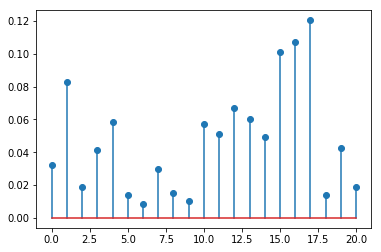

In [177]:
plt.stem(listConceptShV[0][0][1],listConceptShV[0][1])

In [131]:
listConceptShV[1]

(([95], [1, 2, 4, 6, 8, 9, 14, 18, 20]),
 [0.0,
  0.0,
  0.3333333333333334,
  0.3333333333333334,
  0.0,
  0.0,
  0.0,
  0.0,
  0.3333333333333334])

In [164]:
Stab

{356: 1.0,
 83: 0.5,
 199: 0.5,
 272: 0.5,
 274: 0.5,
 263: 0.25,
 277: 0.5,
 81: 0.25,
 163: 0.5,
 185: 0.25,
 271: 0.25,
 273: 0.25,
 250: 0.125,
 304: 0.5,
 329: 0.5,
 35: 0.5,
 79: 0.25,
 245: 0.25,
 73: 0.25,
 247: 0.25,
 22: 0.25,
 234: 0.125,
 7: 0.125,
 248: 0.25,
 76: 0.125,
 162: 0.25,
 244: 0.125,
 4: 0.5,
 71: 0.125,
 161: 0.25,
 246: 0.125,
 20: 0.125,
 221: 0.0625,
 5: 0.0625,
 280: 0.25,
 24: 0.25,
 340: 0.5,
 140: 0.25,
 152: 0.25,
 137: 0.125,
 323: 0.25,
 138: 0.125,
 151: 0.125,
 136: 0.0625,
 34: 0.4375,
 351: 0.5,
 167: 0.25,
 169: 0.25,
 166: 0.125,
 326: 0.25,
 165: 0.125,
 168: 0.125,
 164: 0.0625,
 353: 0.5,
 82: 0.25,
 116: 0.25,
 179: 0.5,
 182: 0.25,
 19: 0.125,
 80: 0.125,
 99: 0.25,
 176: 0.25,
 59: 0.25,
 194: 0.25,
 171: 0.3125,
 301: 0.25,
 325: 0.25,
 78: 0.125,
 160: 0.125,
 154: 0.25,
 50: 0.1875,
 219: 0.125,
 23: 0.125,
 12: 0.4375,
 345: 0.5,
 54: 0.25,
 67: 0.25,
 53: 0.3125,
 52: 0.4375,
 192: 0.25,
 51: 0.421875,
 355: 0.5,
 198: 0.25,
 270: 0.

<StemContainer object of 3 artists>

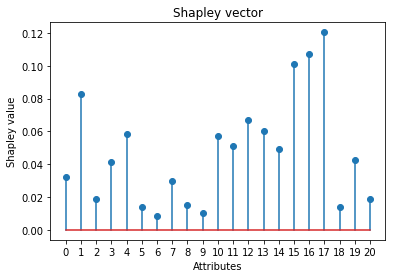

In [229]:
plt.xlabel('Attributes')
plt.ylabel('Shapley value')
plt.title('Shapley vector')
plt.xticks(list(range(21)))

plt.stem(listConceptShV[0][0][1],listConceptShV[0][1])

NameError: name 'listConceptShV' is not defined

<StemContainer object of 3 artists>

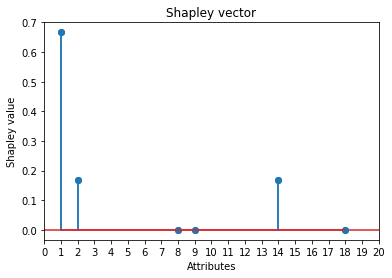

In [235]:
plt.xlabel('Attributes')
plt.ylabel('Shapley value')
plt.title('Shapley vector')
plt.xlim(0,20)
plt.xticks(list(range(21)))

(markerline, stemlines, baseline)=plt.stem(listConceptShV[174][0][1],listConceptShV[174][1])

baseline.set_xdata([0,1])
baseline.set_transform(plt.gca().get_yaxis_transform())

plt.stem(listConceptShV[174][0][1],listConceptShV[174][1])

In [171]:
Stab[356], Contrib[356]

(1.0,
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0])

<StemContainer object of 3 artists>

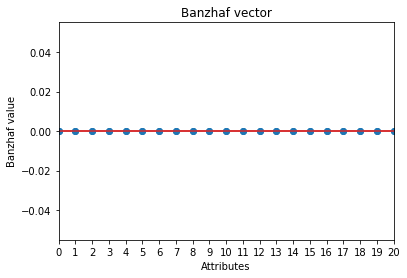

In [242]:
plt.xlabel('Attributes')
plt.ylabel('Banzhaf value')
plt.title('Banzhaf vector')
plt.xlim(0,20)
plt.xticks(list(range(21)))\

(markerline, stemlines, baseline)=plt.stem(Contrib[356])

baseline.set_xdata([0,1])
baseline.set_transform(plt.gca().get_yaxis_transform())

plt.stem(Contrib[356])

In [170]:
Stab[0], Contrib[0]

(0.9968118667602539,
 [0.9978713989257812,
  0.999481201171875,
  0.9983425140380859,
  0.997802734375,
  0.9993495941162109,
  0.9973373413085938,
  0.9970502853393555,
  0.9975013732910156,
  0.9968833923339844,
  0.9971771240234375,
  0.9993095397949219,
  0.99822998046875,
  0.998931884765625,
  0.9987945556640625,
  0.9983940124511719,
  0.9999275207519531,
  0.9999713897705078,
  0.9999923706054688,
  0.9970951080322266,
  0.9991168975830078,
  0.9971694946289062])

<StemContainer object of 3 artists>

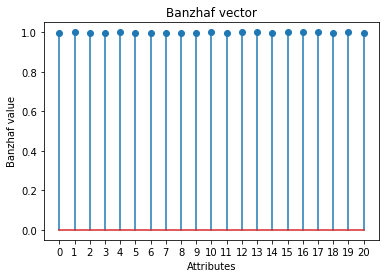

In [230]:
plt.xlabel('Attributes')
plt.ylabel('Banzhaf value')
plt.title('Banzhaf vector')
plt.xticks(list(range(21)))

plt.stem(Contrib[0])

In [169]:
Stab[174], Contrib[174]

(0.625,
 [0.0,
  1.0,
  0.75,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.625,
  0.625,
  0.0,
  0.0,
  0.0,
  0.0,
  0.75,
  0.0,
  0.0,
  0.0,
  0.625,
  0.0,
  0.0])

<StemContainer object of 3 artists>

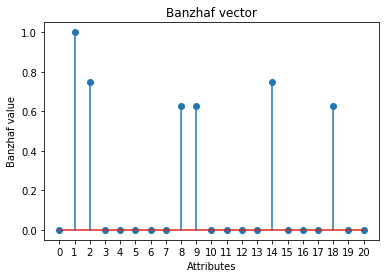

In [233]:
plt.xlabel('Attributes')
plt.ylabel('Banzhaf value')
plt.title('Banzhaf vector')
plt.xticks(list(range(21)))

plt.stem(Contrib[174])

<StemContainer object of 3 artists>

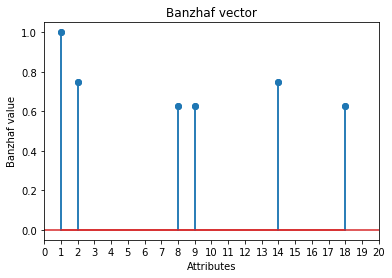

In [238]:
plt.xlabel('Attributes')
plt.ylabel('Banzhaf value')
plt.title('Banzhaf vector')
plt.xlim(0,20)
plt.xticks(list(range(21)))\

(markerline, stemlines, baseline)=plt.stem(listConceptShV[174][0][1], [v for v in Contrib[174] if v!=0])

baseline.set_xdata([0,1])
baseline.set_transform(plt.gca().get_yaxis_transform())

plt.stem(listConceptShV[174][0][1], [v for v in Contrib[174] if v!=0])

In [182]:
len(listConceptShV)

357

In [183]:
len(Lz)

357

In [185]:
Lz[356]

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100],
 [])

In [188]:
listConceptShV[356][1]

[]

In [201]:
listConceptShV[174][0][1]

[1, 2, 8, 9, 14, 18]

In [202]:
Contrib[174]

[0.0,
 1.0,
 0.75,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.625,
 0.625,
 0.0,
 0.0,
 0.0,
 0.0,
 0.75,
 0.0,
 0.0,
 0.0,
 0.625,
 0.0,
 0.0]

In [4]:
l[356]

(([0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   33,
   34,
   35,
   36,
   37,
   38,
   39,
   40,
   41,
   42,
   43,
   44,
   45,
   46,
   47,
   48,
   49,
   50,
   51,
   52,
   53,
   54,
   55,
   56,
   57,
   58,
   59,
   60,
   61,
   62,
   63,
   64,
   65,
   66,
   67,
   68,
   69,
   70,
   71,
   72,
   73,
   74,
   75,
   76,
   77,
   78,
   79,
   80,
   81,
   82,
   83,
   84,
   85,
   86,
   87,
   88,
   89,
   90,
   91,
   92,
   93,
   94,
   95,
   96,
   97,
   98,
   99,
   100],
  []),
 [])

In [5]:
l[174]

(([11,
   16,
   20,
   21,
   23,
   33,
   37,
   41,
   43,
   56,
   57,
   58,
   59,
   71,
   78,
   79,
   83,
   87,
   95,
   100],
  [1, 2, 8, 9, 14, 18]),
 [0.6666666666666667, 0.16666666666666666, 0.0, 0.0, 0.16666666666666666, 0.0])

In [6]:
l[0]

(([],
  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]),
 [0.03253221236967266,
  0.08293356540261347,
  0.019036742411354977,
  0.04139177386081318,
  0.058604076522042914,
  0.01381240878144884,
  0.008670573492554933,
  0.02975186148560699,
  0.01491412354415446,
  0.010126251457520908,
  0.05722773528502037,
  0.051048783517828863,
  0.06698284945189682,
  0.05997735494640257,
  0.04940181937086184,
  0.1008975458665789,
  0.10690214068695995,
  0.1204470323278366,
  0.013812550538556628,
  0.042607001701426915,
  0.018921596978872357])